# ETL Y EDA : EXPLORACION DE DATOS 
***

#### Importación de librerias

In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime  # Importa datetime
pd.set_option('display.max_columns', None)
import regex as re
import pycountry

### 1. Datos

#### 1.1 Fuente: UNITED NATIONS https://www.un.org/development/desa/pd/content/international-migrant-stock 


> **Inventario de Migrantes Internacionales**  
Nombre del archivo: *'Naciones_Unidas_undesa_pd_2020_ims_stock_by_sex_destination_and_origin.xlsx'*  
Las estimaciones del número (o "inventario") de migrantes internacionales desglosados por edad, sexo y país o área de origen se basan en estadísticas nacionales, en la mayoría de los casos obtenidas de censos de población. Además, los registros de población y encuestas representativas a nivel nacional proporcionaron información sobre el número y la composición de los migrantes internacionales.
El conjunto de datos presenta estimaciones de migrantes internacionales por edad, sexo y origen. Las estimaciones se presentan para 1990, 1995, 2000, 2005, 2010, 2015 y 2020 y están disponibles para 232 países y áreas del mundo. Las estimaciones se basan en estadísticas oficiales sobre la población nacida en el extranjero o la población extranjera.



#### 1.2 Fuente: BANCO MUNDIAL https://datos.bancomundial.org/indicador/SM.POP.NETM

> **Migración neta**  
Nombre del archivo: *Banco_Mundial_Migration_Rate_Argentina.xls*  
La migración neta es el total neto de personas que migraron durante el período: la cantidad total de inmigrantes menos la cantidad anual de emigrantes, incluidos los ciudadanos y los no ciudadanos. Los datos son estimaciones de cinco años.

---
Indicadores
***
> **Ingresos per cápita**  
Nombre del archivo: *Banco_Mundial_Ingresos_Per_Capita_segun_encuestas.xls*  
Consumo medio o ingreso per cápita (2011 PPP \$ por día) utilizado para calcular la tasa de crecimiento en el agregado del bienestar de la población total.

> **Acceso a electricidad**  
Nombre del archivo: *Banco_Mundial_Acceso_A_Electricidad.xls*  
Acceso a la electricidad es el porcentaje de población con acceso a la electricidad. Los datos de electrificación se recopilan de la industria, las encuestas.

> **Contaminación del aire**  
Nombre del archivo: *Banco_Mundial_Contaminacion_Aire.xls*  
Contaminación del aire por PM2,5, población expuesta a niveles que exceden el valor indicativo de la Organización Mundial de la Salud (OMS) (% del total).

> **Crecimiento PBI**  
Nombre del archivo: *Banco_Mundial_Crecimiento_del_PBI_%anual.xls*  
Tasa de crecimiento anual porcentual del PIB a precios de mercado en moneda local, a precios constantes. Los agregados están expresados en dólares de los Estados Unidos a precios constantes del año 2010. El PIB es la suma del valor agregado bruto de todos los productores residentes en la economía más todo impuesto a los productos, menos todo subsidio no incluido en el valor de los productos. Se calcula sin hacer deducciones por depreciación de bienes manufacturados o por agotamiento y degradación de recursos naturales.

> **Crecimiento PBI per cápita**  
Nombre del archivo: *Banco_Mundial_Crecimiento_del_PBI_per_capita.xls*  
Tasa de crecimiento porcentual anual del PIB per cápita en moneda local, a precios constantes. El PIB per cápita es el producto interno bruto dividido por la población a mitad de año. El PIB a precio de comprador es la suma del valor agregado bruto de todos los productores residentes en la economía más todo impuesto a los productos, menos todo subsidio no incluido en el valor de los productos. Se calcula sin hacer deducciones por depreciación de bienes manufacturados o por agotamiento y degradación de recursos naturales. Los datos se expresan en dólares de los Estados Unidos a precios constantes del año 2010.

> **Desempleo Hombre**  
Nombre del archivo: *Banco_Mundial_Desempleo_Hombres.xls*  
Desempleo, varones (% de participación masculina en la fuerza laboral) (estimación nacional)  
El desempleo se refiere a la proporción de la fuerza laboral que no tiene trabajo pero está disponible y busca empleo. Las definiciones de fuerza laboral y desempleo varían según el país.

> **Desempleo mujeres**  
Nombre del archivo: *Banco_Mundial_Desempleo_mujeres.xls*  
Desempleo, mujeres (% de la población activa femenina) (estimación modelado OIT)  
El desempleo es la proporción de la población activa que no tiene trabajo pero que busca trabajo y está disponible para realizarlo. Las definiciones de población activa y desempleo difieren según el país.

> **Gasto PBI**  
Nombre del archivo: *Banco_Mundial_Gasto_%_PBI.xls*  
Gasto (% del PIB)  
Los gastos son los pagos de dinero por actividades operativas del Gobierno para la provisión de bienes y servicios. Incluye remuneración de empleados (como sueldos y salarios), interés y subsidios, donaciones, beneficios sociales y otros gastos como renta y dividendos.

> **Importaciones de Mercaderia**  
Nombre del archivo: *Banco_Mundial_Importaciones_de_Mercaderia.xls*  
Importaciones de mercaderías (US$ a precios actuales)  
Las importaciones de mercaderías muestran el valor CIF de los bienes recibidos del resto del mundo que se valoran en dólares estadounidenses corrientes.

> **Personas desempleadas de educación avanzada**  
Nombre del archivo: *Banco_Mundial_Personas_Desempleadas_Con_Educacion_Avanzada.xls*  
Personas desempleadas con educación avanzada (% del desempleo total)  
El porcentaje de la fuerza laboral con un nivel avanzado de educación que se encuentra desempleada. La educación avanzada comprende educación terciaria de ciclo corto, una licenciatura o un nivel de educación equivalente, una maestría o un nivel de educación equivalente, o un doctorado o un nivel de educación equivalente según la Clasificación Internacional Normalizada de la Educación 2011 (CINE 2011).

> **Tasa de cambio**  
Nombre del archivo: *Banco_Mundial_Tasa_De_Cambio_Oficial.xls*  
Tasa de cambio oficial (UMN por US$, promedio para un período)  
El tipo de cambio oficial se refiere al tipo de cambio determinado por las autoridades nacionales o al tipo de cambio determinado en el mercado cambiario autorizado legalmente. Se calcula como un promedio anual basado en los promedios mensuales (unidades de moneda local en relación con el dólar de los Estados Unidos).

> **Pobreza**  
Nombre del archivo: *Banco_Mundial_Tasa_De_Incidencia_De_La_Pobreza.xls*  
Tasa de incidencia de la pobreza, sobre la base de la línea de pobreza nacional (% de la población)  
La tasa de pobreza nacional es el porcentaje de personas que vive debajo de la línea de pobreza nacional. Las estimaciones nacionales se basan en estimaciones de subgrupos ponderados según la población, obtenidas a partir de encuestas de los hogares.

> **Mortalidad**  
Nombre del archivo: *Banco_Mundial_Tasa_de_Mortalidad_en_un_año.xls*  
Tasa de mortalidad en un año (por cada 1.000 personas)  
La tasa bruta de mortalidad es la cantidad de muertes en un año, por cada 1000 habitantes, estimada a mitad de año. Si se resta


# **Inventario de Migrantes Internacionales** (NACIONES UNIDAS)
***

### 1. Ingesta de datos y transformaciones

#### 1.1 Lectura de archivo excel 

In [2]:
df_stock = pd.read_excel("C:\\Users\\ACER\\Documents\\GitHub\\PF_DataScience_Migraciones\\Datasets\\Datasets corredor migratorio (parte 2)\\Naciones_Unidas_undesa_pd_2020_ims_stock_by_sex_destination_and_origin.xlsx",engine='openpyxl',sheet_name='Table 1',skiprows= 10)

In [3]:
df_stock.head(3)

Index Region, development group, country or area of destination   
0      1                                              WORLD         \
1      2                                              WORLD          
2      3                                              WORLD          

   Notes of destination  Location code of destination   
0                   NaN                           900  \
1                   NaN                           900   
2                   NaN                           900   

  Type of data of destination   
0                         NaN  \
1                         NaN   
2                         NaN   

  Region, development group, country or area of origin   
0                                              WORLD    \
1                                 Sub-Saharan Africa     
2                   Northern Africa and Western Asia     

   Location code of origin       1990       1995       2000       2005   
0                      900  152986157  161289976  173230585  191446828  \
1                      947   15334807   16488973   15638014   17274985   
2                     1833   16365218   18069437   19437054   21867791   

        2010       2015       2020    1990.1    1995.1    2000.1    2005.1   
0  220983187  247958644  280598105  77563467  81581501  87719833  97663081  \
1   19942724   24197211   28284538   8136844   8677806   8246575   9227058   
2   25313711   32606047   37563820   8830013   9829261  10736407  12097241   

      2010.1     2015.1     2020.1    1990.2    1995.2    2000.2    2005.2   
0  113940881  128238058  145655844  75422690  79708475  85510752  93783747  \
1   10531120   12578348   14732802   7197963   7811167   7391439   8047927   
2   14249463   18177303   20941050   7535205   8240176   8700647   9770550   

      2010.2     2015.2     2020.2  
0  107042306  119720586  134942261  
1    9411604   11618863   13551736  
2   11064248   14428744   16622770

año: Inventario de migrantes internacionales a mitad de año, ambos sexos combinados. <br>
año.1:Inventario de migrantes internacionales a mitad de año, hombres. <br>
año.2:Inventario de migrantes internacionales a mitad de año, mujeres <br>

#### 1.2 Analisis de columnas, tipos de datos, nulos y duplicados

In [4]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37051 entries, 0 to 37050
Data columns (total 28 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Index                                                      37051 non-null  int64  
 1   Region, development group, country or area of destination  37051 non-null  object 
 2   Notes of destination                                       3574 non-null   float64
 3   Location code of destination                               37051 non-null  int64  
 4   Type of data of destination                                23323 non-null  object 
 5   Region, development group, country or area of origin       37051 non-null  object 
 6   Location code of origin                                    37051 non-null  int64  
 7   1990                                                       37051 non-null  int64  
 8   1995  

No se obervan datos faltantes en las columnas.<br>
**Cambio el nombre de las columnas que son muy largos.** 

In [5]:
df_stock.columns=['Index','Destination','Notes of destination','Location code of destination', 'Type of data of destination', 'Origin','Location code of origin','1990',
                                                              '1995',
                                                              '2000',
                                                              '2005',
                                                              '2010',
                                                              '2015',
                                                              '2020',
                                                              '1990.1',
                                                              '1995.1',
                                                              '2000.1',
                                                              '2005.1',
                                                              '2010.1',
                                                              '2015.1',
                                                              '2020.1',
                                                              '1990.2',
                                                              '1995.2',
                                                              '2000.2',
                                                              '2005.2',
                                                              '2010.2',
                                                              '2015.2',
                                                              '2020.2'] 

Observo que valores unicos tienen las columnas Destination y Origin y veo que ademas de paises tiene regiones, categorias de regiones etc. Creo una función que deje solo los paises. 
Tambien necesito crear un dataset que contenga información de las cantidad de inmigrantes y sus paises de origen y otro con las cantidades y paises de destino de los emigrantes

In [6]:
#df_stock.Destination.unique()

**Cambio de tipo de dato y eliminacion de espacios en blanco para columnas Destination, Local code of destination, Origin y Local code of origin**

In [7]:
df_stock['Destination']=df_stock['Destination'].astype(str)
df_stock['Origin']=df_stock['Origin'].astype(str)
df_stock['Location code of destination']=df_stock['Location code of destination'].astype(str)
df_stock['Location code of origin']=df_stock['Location code of origin'].astype(str)

In [8]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37051 entries, 0 to 37050
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Index                         37051 non-null  int64  
 1   Destination                   37051 non-null  object 
 2   Notes of destination          3574 non-null   float64
 3   Location code of destination  37051 non-null  object 
 4   Type of data of destination   23323 non-null  object 
 5   Origin                        37051 non-null  object 
 6   Location code of origin       37051 non-null  object 
 7   1990                          37051 non-null  int64  
 8   1995                          37051 non-null  int64  
 9   2000                          37051 non-null  int64  
 10  2005                          37051 non-null  int64  
 11  2010                          37051 non-null  int64  
 12  2015                          37051 non-null  int64  
 13  2

**Elimino posibles espacios en blanco**

In [9]:
df_stock['Destination'] = df_stock['Destination'].str.strip()
df_stock['Origin'] = df_stock['Origin'].str.strip()
df_stock['Location code of destination']=df_stock['Location code of destination'].str.strip()
df_stock['Location code of origin']=df_stock['Location code of origin'].str.strip()

**Analizo si hay registros duplicados**

In [10]:
df_stocks_duplicated=  df_stock.duplicated()
df_stocks_duplicated.sum()

0

**Analizo parametros estadisticos de las columnas**

In [11]:
df_stock.describe()

Index  Notes of destination          1990          1995   
count  37051.000000           3574.000000  3.705100e+04  3.705100e+04  \
mean   18526.000000             19.478176  2.959657e+05  3.094353e+05   
std    10695.846748             11.194135  2.596883e+06  2.735540e+06   
min        1.000000              1.000000  0.000000e+00  0.000000e+00   
25%     9263.500000             10.000000  0.000000e+00  0.000000e+00   
50%    18526.000000             18.000000  1.980000e+02  2.480000e+02   
75%    27788.500000             30.000000  8.234500e+03  9.629000e+03   
max    37051.000000             41.000000  1.529862e+08  1.612900e+08   

               2000          2005          2010          2015          2020   
count  3.705100e+04  3.705100e+04  3.705100e+04  3.705100e+04  3.705100e+04  \
mean   3.304824e+05  3.640804e+05  4.230856e+05  4.775787e+05  5.425222e+05   
std    2.975041e+06  3.306144e+06  3.872671e+06  4.360690e+06  4.922727e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  1.000000e+00  4.000000e+00  5.000000e+00   
50%    2.960000e+02  3.670000e+02  4.590000e+02  5.220000e+02  6.080000e+02   
75%    1.058800e+04  1.250050e+04  1.456500e+04  1.594900e+04  1.851700e+04   
max    1.732306e+08  1.914468e+08  2.209832e+08  2.479586e+08  2.805981e+08   

             1990.1        1995.1        2000.1        2005.1        2010.1   
count  3.705100e+04  3.705100e+04  3.705100e+04  3.705100e+04  3.705100e+04  \
mean   1.515676e+05  1.581613e+05  1.692327e+05  1.879234e+05  2.216241e+05   
std    1.334008e+06  1.401084e+06  1.526718e+06  1.710964e+06  2.047924e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    1.020000e+02  1.280000e+02  1.510000e+02  1.900000e+02  2.350000e+02   
75%    4.122500e+03  4.804500e+03  5.232500e+03  6.356500e+03  7.418000e+03   
max    7.756347e+07  8.158150e+07  8.771983e+07  9.766308e+07  1.139409e+08   

             2015.1        2020.1        1990.2        1995.2        2000.2   
count  3.705100e+04  3.705100e+04  3.705100e+04  3.705100e+04  3.705100e+04  \
mean   2.512728e+05  2.865449e+05  1.443981e+05  1.512740e+05  1.612497e+05   
std    2.325715e+06  2.639103e+06  1.267410e+06  1.339206e+06  1.453732e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.000000e+00  2.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    2.670000e+02  3.160000e+02  8.900000e+01  1.140000e+02  1.340000e+02   
75%    8.057000e+03  9.278000e+03  3.949000e+03  4.737500e+03  5.105500e+03   
max    1.282381e+08  1.456558e+08  7.542269e+07  7.970848e+07  8.551075e+07   

             2005.2        2010.2        2015.2        2020.2  
count  3.705100e+04  3.705100e+04  3.705100e+04  3.705100e+04  
mean   1.761570e+05  2.014615e+05  2.263059e+05  2.559773e+05  
std    1.602644e+06  1.840744e+06  2.055423e+06  2.307750e+06  
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00  
50%    1.660000e+02  2.070000e+02  2.390000e+02  2.700000e+02  
75%    6.025000e+03  7.115500e+03  7.797000e+03  8.976000e+03  
max    9.378375e+07  1.070423e+08  1.197206e+08  1.349423e+08

Con la función describe verifico los máximos y mínimmos de cada columna. Observo que los registros maximos son todos del mismo orden de magnitud. 

#### 1.3 Agrego una columna que contenga el código país ISO03, que es el que tienen los datos de Banco Mundial

Creo un diccionario para incorporar el nuevo codigo pais ISO03, utilizando las columnas de la tabla ' codigo_pais' 

In [12]:
# leo el archivo codigo pais que tiene la equivalencia entre codigos pais
codigos=pd.read_csv("C:\\Users\\ACER\\Documents\\GitHub\\PF_DataScience_Migraciones\\ETL_NACIONES_UNIDAS\codigo_pais.csv")

# Convierto las columnas de interes a str y elimino los espacios en blanco
codigos['country-code']=codigos['country-code'].astype(str)
codigos['country-code']=codigos['country-code'].str.strip()

codigos['alpha-3']=codigos['alpha-3'].astype(str)
codigos['alpha-3']=codigos['alpha-3'].str.strip()

# Genero el diccionario para el reemplazo
diccionario = dict(zip(codigos['country-code'], codigos['alpha-3']))

# Convierto las columnas de interes del dataframe a str.
df_stock['Location code of destination'] = df_stock['Location code of destination'].astype(str)
df_stock['Location code of origin'] = df_stock['Location code of origin'].astype(str)

#Genero las columnas con los codigos pais ISO03

df_stock['ISO3_dest'] = df_stock['Location code of destination'].map(diccionario)
df_stock['ISO3_origin'] = df_stock['Location code of origin'].map(diccionario)

Me quedo solo con los datos que tienen codigo pais, que son los que corresponden solo a paises( descarto regiones, mundo etc)

In [13]:
# Conservo las filas donde tanto 'ISO3_origin' como 'ISO3_dest' no son nulos
df_stock_paises = df_stock[df_stock['ISO3_origin'].notnull() & df_stock['ISO3_dest'].notnull()]


Me quedo solo con los valores totales de migracion, elimino los valores parciales para cantidad de hombre y mujeres

In [14]:

df_stock_paises_todos = df_stock_paises[['Index', 'Destination', 'Notes of destination',
       'Location code of destination','ISO3_dest', 'Type of data of destination', 'Origin',
       'Location code of origin','ISO3_origin', '1990', '1995', '2000', '2005', '2010',
       '2015', '2020']]

#### 1.4 Paso las columnas de años a las filas

Genero una funcion que pase los años a las columnas en el dataset.

In [15]:
def estructura_stock (df):
    df_melted = pd.melt(df, id_vars=['Destination', 'Notes of destination', 'Location code of destination','ISO3_dest','Type of data of destination', 'Origin', 'Location code of origin','ISO3_origin'], 
    value_vars=['1990', '1995', '2000', '2005', '2010', '2015', '2020'], 
    var_name='Year', value_name='Migrant stock')
    final = df_melted
    return final

**Obtengo un dataset que tiene la informacion de todos los paises, origen, destino, cantidad de inmigrantes y años en las filas**<br>
Stock_migrantes

In [16]:
Stock_migrantes = estructura_stock(df_stock_paises_todos)

In [17]:
Stock_migrantes[Stock_migrantes['ISO3_origin']=='ARG']

Destination  Notes of destination   
447                                 Egypt                   NaN  \
786                               Namibia                   NaN   
869                          South Africa                   NaN   
1033                           Cabo Verde                   NaN   
1140                               Guinea                   NaN   
...                                   ...                   ...   
82640  Venezuela (Bolivarian Republic of)                   NaN   
82791                              Canada                   NaN   
83011           United States of America*                  33.0   
83164                          Australia*                   NaN   
83422                        New Zealand*                  34.0   

      Location code of destination ISO3_dest Type of data of destination   
447                            818       EGY                         B R  \
786                            516       NAM                         B R   
869                            710       ZAF                         B R   
1033                           132       CPV                         B R   
1140                           324       GIN                       C B R   
...                            ...       ...                         ...   
82640                          862       VEN                         B R   
82791                          124       CAN                           B   
83011                          840       USA                           B   
83164                           36       AUS                           B   
83422                          554       NZL                           B   

          Origin Location code of origin ISO3_origin  Year  Migrant stock  
447    Argentina                      32         ARG  1990            322  
786    Argentina                      32         ARG  1990             74  
869    Argentina                      32         ARG  1990            623  
1033   Argentina                      32         ARG  1990              5  
1140   Argentina                      32         ARG  1990              0  
...          ...                     ...         ...   ...            ...  
82640  Argentina                      32         ARG  2020           9374  
82791  Argentina                      32         ARG  2020          20921  
83011  Argentina                      32         ARG  2020         219448  
83164  Argentina                      32         ARG  2020          17900  
83422  Argentina                      32         ARG  2020           4136  

[539 rows x 10 columns]

### 2. Generación de datasets para analisis entre indicadores y migracion neta

### 2. Creación de funciones:

En esta sección se desarrollan las funciones necesarias para poder, limpiar y reestructrar el dataset inicial para obtener la información necesaria para hacer el analisis.

In [18]:
# Esta funcion toma el dataset original y se queda solo con las filas que tienen paises en las columnas Origin y Destination.
def solo_paises(df):
    lista_paises= ['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)', 'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic', 'Chad', 'Channel Islands', 'Chile', 'China', 'China, Hong Kong SAR', 'China, Macao SAR', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia', 'Côte d’Ivoire', 'Democratic People\'s Republic of Korea', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Falkland Islands (Malvinas)', 'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Guiana', 'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Lao People\'s Democratic Republic', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Martinique', 'Mauritania', 'Mauritius', 'Mayotte', 'Mexico', 'Micronesia (Federated States of)', 'Monaco', 'Mongolia', 'Montenegro', 'Montserrat', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Niue', 'Northern Mariana Islands', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Republic of Korea', 'Republic of Moldova', 'Romania', 'Russian Federation', 'Rwanda', 'Réunion', 'Saint Helena', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Sint Maarten (Dutch part)', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Sudan', 'Spain', 'Sri Lanka', 'State of Palestine', 'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Tajikistan', 'Thailand', 'The former Yugoslav Republic of Macedonia', 'Timor-Leste', 'Togo', 'Tokelau', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United Republic of Tanzania', 'United States Virgin Islands', 'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Wallis and Futuna Islands', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe','Afghanistan*', 'Albania*', 'Algeria*', 'American Samoa*', 'Andorra*', 'Angola*', 'Anguilla*', 'Antigua and Barbuda*', 'Argentina*', 'Armenia*', 'Aruba*', 'Australia*', 'Austria*', 'Azerbaijan*', 'Bahamas*', 'Bahrain*', 'Bangladesh*', 'Barbados*', 'Belarus*', 'Belgium*', 'Belize*', 'Benin*', 'Bermuda*', 'Bhutan*', 'Bolivia (Plurinational State of)*', 'Bonaire, Sint Eustatius and Saba*', 'Bosnia and Herzegovina*', 'Botswana*', 'Brazil*', 'British Virgin Islands*', 'Brunei Darussalam*', 'Bulgaria*', 'Burkina Faso*', 'Burundi*', 'Cabo Verde*', 'Cambodia*', 'Cameroon*', 'Canada*', 'Cayman Islands*', 'Central African Republic*', 'Chad*', 'Channel Islands*', 'Chile*', 'China*', 'China, Hong Kong SAR*', 'China, Macao SAR*', 'Colombia*', 'Comoros*', 'Congo*', 'Cook Islands*', 'Costa Rica*', 'Croatia*', 'Cuba*', 'Curaçao*', 'Cyprus*', 'Czechia*', 'Côte d’Ivoire*', 'Democratic People\'s Republic of Korea*', 'Democratic Republic of the Congo*', 'Denmark*', 'Djibouti*', 'Dominica*', 'Dominican Republic*', 'Ecuador*', 'Egypt*', 'El Salvador*', 'Equatorial Guinea*', 'Eritrea*', 'Estonia*', 'Eswatini*', 'Ethiopia*', 'Falkland Islands (Malvinas)*', 'Faroe Islands*', 'Fiji*', 'Finland*', 'France*', 'French Guiana*', 'French Polynesia*', 'Gabon*', 'Gambia*', 'Georgia*', 'Germany*', 'Ghana*', 'Gibraltar*', 'Greece*', 'Greenland*', 'Grenada*', 'Guadeloupe*', 'Guam*', 'Guatemala*', 'Guinea*', 'Guinea-Bissau*', 'Guyana*', 'Haiti*', 'Holy See*', 'Honduras*', 'Hungary*', 'Iceland*', 'India*', 'Indonesia*', 'Iran (Islamic Republic of)*', 'Iraq*', 'Ireland*', 'Isle of Man*', 'Israel*', 'Italy*', 'Jamaica*', 'Japan*', 'Jordan*', 'Kazakhstan*', 'Kenya*', 'Kiribati*', 'Kuwait*', 'Kyrgyzstan*', 'Lao People\'s Democratic Republic*', 'Latvia*', 'Lebanon*', 'Lesotho*', 'Liberia*', 'Libya*', 'Liechtenstein*', 'Lithuania*', 'Luxembourg*', 'Madagascar*', 'Malawi*', 'Malaysia*', 'Maldives*', 'Mali*', 'Malta*', 'Marshall Islands*', 'Martinique*', 'Mauritania*', 'Mauritius*', 'Mayotte*', 'Mexico*', 'Micronesia (Federated States of)*', 'Monaco*', 'Mongolia*', 'Montenegro*', 'Montserrat*', 'Morocco*', 'Mozambique*', 'Myanmar*', 'Namibia*', 'Nauru*', 'Nepal*', 'Netherlands*', 'New Caledonia*', 'New Zealand*', 'Nicaragua*', 'Niger*', 'Nigeria*', 'Niue*', 'Northern Mariana Islands*', 'Norway*', 'Oman*', 'Pakistan*', 'Palau*', 'Panama*', 'Papua New Guinea*', 'Paraguay*', 'Peru*', 'Philippines*', 'Poland*', 'Portugal*', 'Puerto Rico*', 'Qatar*', 'Republic of Korea*', 'Republic of Moldova*', 'Romania*', 'Russian Federation*', 'Rwanda*', 'Réunion*', 'Saint Helena*', 'Saint Kitts and Nevis*', 'Saint Lucia*', 'Saint Pierre and Miquelon*', 'Saint Vincent and the Grenadines*', 'Samoa*', 'San Marino*', 'Sao Tome and Principe*', 'Saudi Arabia*', 'Senegal*', 'Serbia*', 'Seychelles*', 'Sierra Leone*', 'Singapore*', 'Sint Maarten (Dutch part)*', 'Slovakia*', 'Slovenia*', 'Solomon Islands*', 'Somalia*', 'South Africa*', 'South Sudan*', 'Spain*', 'Sri Lanka*', 'State of Palestine*', 'Sudan*', 'Suriname*', 'Sweden*', 'Switzerland*', 'Syrian Arab Republic*', 'Tajikistan*', 'Thailand*', 'The former Yugoslav Republic of Macedonia*', 'Timor-Leste*', 'Togo*', 'Tokelau*', 'Tonga*', 'Trinidad and Tobago*', 'Tunisia*', 'Turkey*', 'Turkmenistan*', 'Turks and Caicos Islands*', 'Tuvalu*', 'Uganda*', 'Ukraine*', 'United Arab Emirates*', 'United Kingdom*', 'United Republic of Tanzania*', 'United States Virgin Islands*', 'United States of America*', 'Uruguay*', 'Uzbekistan*', 'Vanuatu*', 'Venezuela (Bolivarian Republic of)*', 'Viet Nam*', 'Wallis and Futuna Islands*', 'Western Sahara*', 'Yemen*', 'Zambia*', 'Zimbabwe*']

    df['es_pais'] = df['Destination'].isin(lista_paises) & df['Origin'].isin(lista_paises)
    df1 = df[df['es_pais']].sort_values(by='2020', ascending=False)
    return df1

In [19]:
# Esta funcion filtra el dataset para todos los registros que tienen como destino Argentina
def inmigrantes(df):
        df_salida=df[df.Destination== 'Argentina'].sort_values(by='2020', ascending=False)
        return df_salida

In [20]:
# Esta funcion filtra el dataset para todos los registros que tienen como Origen Argentina
def emigrantes(df):
        df_salida=df[df.Origin== 'Argentina'].sort_values(by='2020', ascending=False)
        return df_salida

In [21]:
# Esta funcion devuelve un dataset que tiene sólo los paises que contienen el 95% de la cantidad total de inmigrantes/emigrantes.
def porcentaje_acumulado(df,porcentaje):
    df['Porcentaje_acumulado'] = df['2020'].cumsum() / df['2020'].sum()
    truncated_df = df[df['Porcentaje_acumulado'] <= porcentaje]
    return truncated_df

In [22]:
# Esta función devuelve un dataset con la estructura de años en las filas y en las columnas por pais destino/origen la cantidad de migraciones.

def estructura (df,columna):
    df_melted = pd.melt(df, id_vars=['Destination', 'Notes of destination', 'Location code of destination', 'Type of data of destination', 'Origin', 'Location code of origin', 'es_pais', 'Porcentaje_acumulado'], 
    value_vars=['1990', '1995', '2000', '2005', '2010', '2015', '2020', '1990.1', '1995.1', '2000.1', '2005.1', '2010.1', '2015.1', '2020.1', '1990.2', '1995.2', '2000.2', '2005.2', '2010.2', '2015.2', '2020.2'], 
    var_name='Year', value_name='Value')
    
    lista_todos = ['1990', '1995', '2000', '2005', '2010', '2015', '2020']
    lista_hombres = ['1990.1', '1995.1', '2000.1', '2005.1', '2010.1', '2015.1', '2020.1']
    
    df_melted['Genero_Migracion'] = df_melted.apply(lambda x: 'Todos' if x['Year'] in lista_todos else ('Hombres' if x['Year'] in lista_hombres else 'Mujeres'), axis=1)
    df_melted['Year'] = df_melted['Year'].str.extract(r'(\d+)').astype(int)
    
    final = df_melted.pivot_table(values='Value', index=['Year', 'Genero_Migracion'], columns=columna, aggfunc='first').reset_index()
    return final

### 3. Generación de datasets con la informacion relevante para el análisis de inmigración y emigracion de Argentina.

### 3.1.  Generación de dataset con canitdad de inmigrantes y sus paises de origen.
***

En esta sección se generará un dataset que tenga: 

* En las filas la fecha cada 5 años. 
* En columnas la  cantidad de **inmigrantes** de cada pais que ingresó a Argentina. Se tomaron en el análisis los paises que sumaban el 95% de los inmigrates totales. 


#### 1. Aplico función "solo_paises" para mantener las filas que en las columnas 'Destino' y 'Origen' tengan paises.

In [23]:
df_paises = solo_paises(df_stock)

In [24]:
df_paises.head(3)

Index                Destination  Notes of destination   
33944  33945  United States of America*                  33.0  \
17485  17486                     Turkey                   NaN   
17559  17560       United Arab Emirates                   NaN   

      Location code of destination Type of data of destination   
33944                          840                           B  \
17485                          792                         B R   
17559                          784                         C R   

                     Origin Location code of origin     1990     1995   
33944                Mexico                     484  4298014  6827945  \
17485  Syrian Arab Republic                     760     5247     5106   
17559                 India                     356   458294   667853   

          2000      2005      2010      2015      2020   1990.1   1995.1   
33944  9410529  10611064  12168662  11643298  10853105  2315850  3692951  \
17485     4995      5178      5336   2714774   3792505     2742     2557   
17559   915878   1286993   2913858   3184043   3471300   353599   506060   

        2000.1   2005.1   2010.1   2015.1   2020.1   1990.2   1995.2   2000.2   
33944  5104175  5782166  6554739  6230901  5796774  1982164  3134994  4306354  \
17485     2388     2417     2428  1655872  2301270     2505     2549     2607   
17559   685691   978024  2264033  2445963  2666029   104695   161793   230187   

        2005.2   2010.2   2015.2   2020.2 ISO3_dest ISO3_origin  es_pais  
33944  4828898  5613923  5412397  5056331       USA         MEX     True  
17485     2761     2908  1058902  1491235       TUR         SYR     True  
17559   308969   649825   738080   805271       ARE         IND     True

#### 2. Aplico la función "inmigrantes" que se queda solo con los registros que tienen como destino Argentina. 

In [25]:
df_paises_inmigrantes= inmigrantes(df_paises)

In [26]:
df_paises_inmigrantes.head(3)

Index Destination  Notes of destination Location code of destination   
31664  31665   Argentina                   NaN                           32  \
31581  31582   Argentina                   NaN                           32   
31592  31593   Argentina                   NaN                           32   

      Type of data of destination                            Origin   
31664                         B R                          Paraguay  \
31581                         B R  Bolivia (Plurinational State of)   
31592                         B R                             Chile   

      Location code of origin    1990    1995    2000    2005    2010    2015   
31664                     600  257243  286164  315086  451818  588452  679044  \
31581                      68  147234  186685  226137  294672  363142  419048   
31592                     152  223528  214736  205945  195338  184687  213119   

         2020  1990.1  1995.1  2000.1  2005.1  2010.1  2015.1  2020.1  1990.2   
31664  685714  112781  124821  136863  199451  262021  302136  307457  144462  \
31581  423136   76050   95917  115786  147853  179904  207475  210826   71184   
31592  215198  117266  108853  100442   92817   85183   98228   99908  106262   

       1995.2  2000.2  2005.2  2010.2  2015.2  2020.2 ISO3_dest ISO3_origin   
31664  161343  178223  252367  326431  376908  378257       ARG         PRY  \
31581   90768  110351  146819  183238  211573  212310       ARG         BOL   
31592  105883  105503  102521   99504  114891  115290       ARG         CHL   

       es_pais  
31664     True  
31581     True  
31592     True

#### 3. Aplico la función "porcentaje acumulado" que devuelve un dataset que contiene la información solo de los paises de origen que suman el 95% de los inmigrantes totales. 

In [27]:
df_paises_inmigrantes_porcentaje = porcentaje_acumulado (df_paises_inmigrantes,0.95)

In [28]:
df_paises_inmigrantes_porcentaje

Index Destination  Notes of destination Location code of destination   
31664  31665   Argentina                   NaN                           32  \
31581  31582   Argentina                   NaN                           32   
31592  31593   Argentina                   NaN                           32   
31665  31666   Argentina                   NaN                           32   
31700  31701   Argentina                   NaN                           32   
31629  31630   Argentina                   NaN                           32   
31699  31700   Argentina                   NaN                           32   
31680  31681   Argentina                   NaN                           32   

      Type of data of destination                              Origin   
31664                         B R                            Paraguay  \
31581                         B R    Bolivia (Plurinational State of)   
31592                         B R                               Chile   
31665                         B R                                Peru   
31700                         B R  Venezuela (Bolivarian Republic of)   
31629                         B R                               Italy   
31699                         B R                             Uruguay   
31680                         B R                              Spain*   

      Location code of origin    1990    1995    2000    2005    2010    2015   
31664                     600  257243  286164  315086  451818  588452  679044  \
31581                      68  147234  186685  226137  294672  363142  419048   
31592                     152  223528  214736  205945  195338  184687  213119   
31665                     604   16366   50888   85411  127351  169262  195320   
31700                     862    1981    2290    2600    1919    1236    1240   
31629                     380  336040  273401  210762  171407  132014  152338   
31699                     858  136906  125366  113827  114446  115039  132749   
31680                     724  229535  179945  130356  107675   84969   98050   

         2020  1990.1  1995.1  2000.1  2005.1  2010.1  2015.1  2020.1  1990.2   
31664  685714  112781  124821  136863  199451  262021  302136  307457  144462  \
31581  423136   76050   95917  115786  147853  179904  207475  210826   71184   
31592  215198  117266  108853  100442   92817   85183   98228   99908  106262   
31665  197226    9721   22702   35684   56276   76864   88634   90168    6645   
31700  176369     840    1021    1203     904     605     606   87094    1141   
31629  153824  163819  131547   99276   78155   57027   65756   66941  172221   
31699  134043   66665   61245   55827   55165   54497   62845   63897   70241   
31680   99006  101638   79509   57382   46869   36351   41914   42674  127897   

       1995.2  2000.2  2005.2  2010.2  2015.2  2020.2 ISO3_dest ISO3_origin   
31664  161343  178223  252367  326431  376908  378257       ARG         PRY  \
31581   90768  110351  146819  183238  211573  212310       ARG         BOL   
31592  105883  105503  102521   99504  114891  115290       ARG         CHL   
31665   28186   49727   71075   92398  106686  107058       ARG         PER   
31700    1269    1397    1015     631     634   89275       ARG         VEN   
31629  141854  111486   93252   74987   86582   86883       ARG         ITA   
31699   64121   58000   59281   60542   69904   70146       ARG         URY   
31680  100436   72974   60806   48618   56136   56332       ARG         ESP   

       es_pais  Porcentaje_acumulado  
31664     True              0.306721  
31581     True              0.495990  
31592     True              0.592248  
31665     True              0.680468  
31700     True              0.759358  
31629     True              0.828163  
31699     True              0.888121  
31680     True              0.932407

#### 4. Aplico la función "estructura" que devuelve un dataset con la estructura de años en las filas y en las columnas por pais origen la cantidad de migraciones.

In [29]:
final_inmigrantes = estructura(df_paises_inmigrantes_porcentaje, 'Origin')

In [30]:
final_inmigrantes

Origin  Year Genero_Migracion  Bolivia (Plurinational State of)   Chile   
0       1990          Hombres                             76050  117266  \
1       1990          Mujeres                             71184  106262   
2       1990            Todos                            147234  223528   
3       1995          Hombres                             95917  108853   
4       1995          Mujeres                             90768  105883   
5       1995            Todos                            186685  214736   
6       2000          Hombres                            115786  100442   
7       2000          Mujeres                            110351  105503   
8       2000            Todos                            226137  205945   
9       2005          Hombres                            147853   92817   
10      2005          Mujeres                            146819  102521   
11      2005            Todos                            294672  195338   
12      2010          Hombres                            179904   85183   
13      2010          Mujeres                            183238   99504   
14      2010            Todos                            363142  184687   
15      2015          Hombres                            207475   98228   
16      2015          Mujeres                            211573  114891   
17      2015            Todos                            419048  213119   
18      2020          Hombres                            210826   99908   
19      2020          Mujeres                            212310  115290   
20      2020            Todos                            423136  215198   

Origin   Italy  Paraguay    Peru  Spain*  Uruguay   
0       163819    112781    9721  101638    66665  \
1       172221    144462    6645  127897    70241   
2       336040    257243   16366  229535   136906   
3       131547    124821   22702   79509    61245   
4       141854    161343   28186  100436    64121   
5       273401    286164   50888  179945   125366   
6        99276    136863   35684   57382    55827   
7       111486    178223   49727   72974    58000   
8       210762    315086   85411  130356   113827   
9        78155    199451   56276   46869    55165   
10       93252    252367   71075   60806    59281   
11      171407    451818  127351  107675   114446   
12       57027    262021   76864   36351    54497   
13       74987    326431   92398   48618    60542   
14      132014    588452  169262   84969   115039   
15       65756    302136   88634   41914    62845   
16       86582    376908  106686   56136    69904   
17      152338    679044  195320   98050   132749   
18       66941    307457   90168   42674    63897   
19       86883    378257  107058   56332    70146   
20      153824    685714  197226   99006   134043   

Origin  Venezuela (Bolivarian Republic of)  
0                                      840  
1                                     1141  
2                                     1981  
3                                     1021  
4                                     1269  
5                                     2290  
6                                     1203  
7                                     1397  
8                                     2600  
9                                      904  
10                                    1015  
11                                    1919  
12                                     605  
13                                     631  
14                                    1236  
15                                     606  
16                                     634  
17                                    1240  
18                                   87094  
19                                   89275  
20                                  176369

#### 5. Guardo el archivo en un csv

In [31]:
final_inmigrantes.to_csv('Origen_Inmigrantes_Argentina.csv')

### 3.2. Generación de dataset con canitdad de emigrantes y sus paises de destino.
***

En esta sección se generará un dataset que tenga: 

* En las filas la fecha cada 5 años. 
* En columnas la  cantidad de **emigrantes** de cada país destino. Se tomaron en el análisis los paises que sumaban el 95% de los emigrates totales. 

#### 1. Aplico la función "emigrantes" que se queda solo con los registros que tienen como Origen Argentina.

In [32]:
df_paises_emigrantes= emigrantes(df_paises)

In [33]:
df_paises_emigrantes.head(10)

Index                       Destination  Notes of destination   
24911  24912                            Spain*                   NaN  \
33862  33863         United States of America*                  33.0   
32184  32185                             Chile                   NaN   
23810  23811                             Italy                   NaN   
32649  32650                          Paraguay                   NaN   
31758  31759  Bolivia (Plurinational State of)                   NaN   
16663  16664                            Israel                   NaN   
31981  31982                            Brazil                   NaN   
32894  32895                           Uruguay                   NaN   
32717  32718                              Peru                   NaN   

      Location code of destination Type of data of destination     Origin   
24911                          724                           B  Argentina  \
33862                          840                           B  Argentina   
32184                          152                           B  Argentina   
23810                          380                           B  Argentina   
32649                          600                         B R  Argentina   
31758                           68                         B R  Argentina   
16663                          376                         B R  Argentina   
31981                           76                         B R  Argentina   
32894                          858                         B R  Argentina   
32717                          604                         B R  Argentina   

      Location code of origin   1990    1995    2000    2005    2010    2015   
24911                      32  42923   50810   79339  244014  282553  251841  \
33862                      32  92563  110347  128397  152739  182404  199314   
32184                      32  32696   39251   45770   50740   55685   56363   
23810                      32  31345   25795   20245   46708   78640   69876   
32649                      32  50447   57525   64404   61353   58456   57056   
31758                      32  21923   25141   28095   32418   36671   42697   
16663                      32  25526   29503   31828   34777   38148   39343   
31981                      32  28350   27974   27597   28410   28819   33971   
32894                      32  14559   17970   21691   25992   26782   27662   
32717                      32   7080    7087    8282    9729   11961   14386   

         2020  1990.1  1995.1  2000.1  2005.1  2010.1  2015.1  2020.1  1990.2   
24911  284921   20170   24493   39327  125841  145829  128585  143613   22753  \
33862  219448   43141   50987   59027   70675   83053   90196   97977   49422   
32184   79253   16212   19651   22791   25600   28401   29777   39468   16484   
23810   72321   10390    9096    7802   21085   37217   32012   33725   20955   
32649   61833   25066   28910   32483   30947   29425   28685   31162   25381   
31758   47601   10684   12434   14043   16402   18729   21804   24260   11239   
16663   38204   12315   14003   15074   16457   18003   18465   17931   13211   
31981   36910   15178   15391   15603   16308   16767   19662   21754   13172   
32894   33022    5658    7292    9589   11491   11706   12086   14856    8901   
32717   26854    3502    3463    4050    4808    6111    7795   14769    3578   

       1995.2  2000.2  2005.2  2010.2  2015.2  2020.2 ISO3_dest ISO3_origin   
24911   26317   40012  118173  136724  123256  141308       ESP         ARG  \
33862   59360   69370   82064   99351  109118  121471       USA         ARG   
32184   19600   22979   25140   27284   26586   39785       CHL         ARG   
23810   16699   12443   25623   41423   37864   38596       ITA         ARG   
32649   28615   31921   30406   29031   28371   30671       PRY         ARG   
31758   12707   14052   16016   17942   20893   23341       BOL         ARG   
16663   15500   16754   18320   20145   

#### 2. Aplico la función "porcentaje acumulado" que devuelve un dataset que contiene la información solo de los paises de destino que suman el 95% de los emigrantes totales. 

In [34]:
df_paises_emigrantes_porcentaje = porcentaje_acumulado (df_paises_emigrantes,0.90)

In [35]:
df_paises_emigrantes_porcentaje 

Index                       Destination  Notes of destination   
24911  24912                            Spain*                   NaN  \
33862  33863         United States of America*                  33.0   
32184  32185                             Chile                   NaN   
23810  23811                             Italy                   NaN   
32649  32650                          Paraguay                   NaN   
31758  31759  Bolivia (Plurinational State of)                   NaN   
16663  16664                            Israel                   NaN   
31981  31982                            Brazil                   NaN   
32894  32895                           Uruguay                   NaN   
32717  32718                              Peru                   NaN   
33495  33496                            Canada                   NaN   
26171  26172                           Germany                   NaN   
34630  34631                        Australia*                   NaN   

      Location code of destination Type of data of destination     Origin   
24911                          724                           B  Argentina  \
33862                          840                           B  Argentina   
32184                          152                           B  Argentina   
23810                          380                           B  Argentina   
32649                          600                         B R  Argentina   
31758                           68                         B R  Argentina   
16663                          376                         B R  Argentina   
31981                           76                         B R  Argentina   
32894                          858                         B R  Argentina   
32717                          604                         B R  Argentina   
33495                          124                           B  Argentina   
26171                          276                           B  Argentina   
34630                           36                           B  Argentina   

      Location code of origin   1990    1995    2000    2005    2010    2015   
24911                      32  42923   50810   79339  244014  282553  251841  \
33862                      32  92563  110347  128397  152739  182404  199314   
32184                      32  32696   39251   45770   50740   55685   56363   
23810                      32  31345   25795   20245   46708   78640   69876   
32649                      32  50447   57525   64404   61353   58456   57056   
31758                      32  21923   25141   28095   32418   36671   42697   
16663                      32  25526   29503   31828   34777   38148   39343   
31981                      32  28350   27974   27597   28410   28819   33971   
32894                      32  14559   17970   21691   25992   26782   27662   
32717                      32   7080    7087    8282    9729   11961   14386   
33495                      32  10660   12036   13698   15923   18870   19310   
26171                      32   4499    4616    4732   10339   14929   15323   
34630                      32  13155   12541   12020   13088   13730   15510   

         2020  1990.1  1995.1  2000.1  2005.1  2010.1  2015.1  2020.1  1990.2   
24911  284921   20170   24493   39327  125841  145829  128585  143613   22753  \
33862  219448   43141   50987   59027   70675   83053   90196   97977   49422   
32184   79253   16212   19651   22791   25600   28401   29777   39468   16484   
23810   72321   10390    9096    7802   21085   37217   32012   33725   20955   
32649   61833   25066   28910   32483   30947   29425   28685   31162   25381   
31758   47601   10684   12434   14043   16402   18729   21804   24260   11239   
16663   38204   12315   14003   15074   16457   18003   18465   17931   13211   
31981   36910   15178   15391   15603   16308   16767   19662   21754   13172   
32894   33022    5658    7292    9589   11491   11706   12086   14856

df_paises_emigrantes_porcentaje

#### 3. Aplico la función "estructura" que devuelve un dataset con la estructura de años en las filas y en las columnas por pais destino la cantidad de migraciones.

In [36]:
final_emigrantes = estructura(df_paises_emigrantes_porcentaje, 'Destination')

In [37]:
final_emigrantes

Destination  Year Genero_Migracion  Australia*   
0            1990          Hombres        6602  \
1            1990          Mujeres        6553   
2            1990            Todos       13155   
3            1995          Hombres        6260   
4            1995          Mujeres        6281   
5            1995            Todos       12541   
6            2000          Hombres        5919   
7            2000          Mujeres        6101   
8            2000            Todos       12020   
9            2005          Hombres        6414   
10           2005          Mujeres        6674   
11           2005            Todos       13088   
12           2010          Hombres        6757   
13           2010          Mujeres        6973   
14           2010            Todos       13730   
15           2015          Hombres        7616   
16           2015          Mujeres        7894   
17           2015            Todos       15510   
18           2020          Hombres        8695   
19           2020          Mujeres        9205   
20           2020            Todos       17900   

Destination  Bolivia (Plurinational State of)  Brazil  Canada  Chile  Germany   
0                                       10684   15178    5190  16212     2209  \
1                                       11239   13172    5470  16484     2290   
2                                       21923   28350   10660  32696     4499   
3                                       12434   15391    5829  19651     2035   
4                                       12707   12583    6207  19600     2581   
5                                       25141   27974   12036  39251     4616   
6                                       14043   15603    6608  22791     1861   
7                                       14052   11994    7090  22979     2871   
8                                       28095   27597   13698  45770     4732   
9                                       16402   16308    7697  25600     4736   
10                                      16016   12102    8226  25140     5603   
11                                      32418   28410   15923  50740    10339   
12                                      18729   16767    9157  28401     7150   
13                                      17942   12052    9713  27284     7779   
14                                      36671   28819   18870  55685    14929   
15                                      21804   19662    9482  29777     7293   
16                                      20893   14309    9828  26586     8030   
17                                      42697   33971   19310  56363    15323   
18                                      24260   21754   10274  39468     9745   
19                                      23341   15156   10647  39785    10821   
20                                      47601   36910   20921  79253    20566   

Destination  Israel  Italy  Paraguay   Peru  Spain*   
0             12315  10390     25066   3502   20170  \
1             13211  20955     25381   3578   22753   
2             25526  31345     50447   7080   42923   
3             14003   9096     28910   3463   24493   
4             15500  16699     28615   3624   26317   
5             29503  25795     57525   7087   50810   
6             15074   7802     32483   4050   39327   
7             16754  12443     31921   4232   40012   
8             31828  20245     64404   8282   79339   
9             16457  21085     30947   4808  125841   
10            18320  25623     30406   4921  118173   
11            34777  46708     61353   9729  244014   
12            18003  37217     29425   6111  145829   
13            20145  41423     29031   5850  136724   
14            38148  78640     58456  11961  282553   
15            18465  32012     28685   7795  128585   
16            20878  37864     28371   6591  123256   
17            39343  69876     57056  14386  251841   
18            17931  33725     31162  14769  143613   
19            20

In [38]:
final_emigrantes.columns

Index(['Year', 'Genero_Migracion', 'Australia*',
       'Bolivia (Plurinational State of)', 'Brazil', 'Canada', 'Chile',
       'Germany', 'Israel', 'Italy', 'Paraguay', 'Peru', 'Spain*',
       'United States of America*', 'Uruguay'],
      dtype='object', name='Destination')

#### 5. Guardo el archivo en un csv

In [39]:
final_emigrantes.to_csv('Destino_Emigrantes_Argentina.csv')

### 4. Analisis de relaciones entre los datos:

#### 4.1 Emigrantes

In [40]:
final_emigrantes_todos = final_emigrantes[final_emigrantes['Genero_Migracion']=='Todos']

In [41]:
final_emigrantes_todos 

Destination  Year Genero_Migracion  Australia*   
2            1990            Todos       13155  \
5            1995            Todos       12541   
8            2000            Todos       12020   
11           2005            Todos       13088   
14           2010            Todos       13730   
17           2015            Todos       15510   
20           2020            Todos       17900   

Destination  Bolivia (Plurinational State of)  Brazil  Canada  Chile  Germany   
2                                       21923   28350   10660  32696     4499  \
5                                       25141   27974   12036  39251     4616   
8                                       28095   27597   13698  45770     4732   
11                                      32418   28410   15923  50740    10339   
14                                      36671   28819   18870  55685    14929   
17                                      42697   33971   19310  56363    15323   
20                                      47601   36910   20921  79253    20566   

Destination  Israel  Italy  Paraguay   Peru  Spain*   
2             25526  31345     50447   7080   42923  \
5             29503  25795     57525   7087   50810   
8             31828  20245     64404   8282   79339   
11            34777  46708     61353   9729  244014   
14            38148  78640     58456  11961  282553   
17            39343  69876     57056  14386  251841   
20            38204  72321     61833  26854  284921   

Destination  United States of America*  Uruguay  
2                                92563    14559  
5                               110347    17970  
8                               128397    21691  
11                              152739    25992  
14                              182404    26782  
17                              199314    27662  
20                              219448    33022

In [42]:
final_emigrantes_columns=final_emigrantes.columns.drop(['Year','Genero_Migracion'])

In [43]:
final_emigrantes_columns

Index(['Australia*', 'Bolivia (Plurinational State of)', 'Brazil', 'Canada',
       'Chile', 'Germany', 'Israel', 'Italy', 'Paraguay', 'Peru', 'Spain*',
       'United States of America*', 'Uruguay'],
      dtype='object', name='Destination')

C:\Users\ACER\AppData\Local\Temp\ipykernel_2580\1081429344.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="Year", y=column, data=final_emigrantes_todos, palette=[custom_palette[i]], label=column)
C:\Users\ACER\AppData\Local\Temp\ipykernel_2580\1081429344.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="Year", y=column, data=final_emigrantes_todos, palette=[custom_palette[i]], label=column)
C:\Users\ACER\AppData\Local\Temp\ipykernel_2580\1081429344.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="Year", y=column, data=final_emigrantes_todos, palette=[custom_palette[i]], label=column)
C:\Users\ACER\AppData\Local\Temp\ipykernel_2580\1081429344.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="Year", y=column, data=final_emigrantes_todos, palette=[custom_palette[i]], label=column)
C:\U

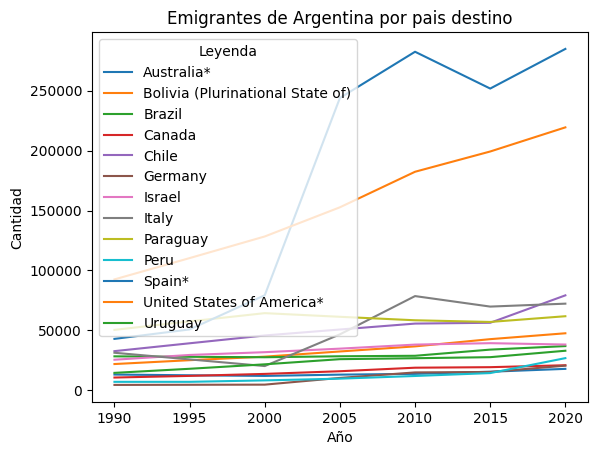

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir una paleta de colores personalizada
custom_palette = sns.color_palette("Paired", n_colors=len(final_emigrantes_columns))

# Tu código para graficar aquí
for i, column in enumerate(final_emigrantes_columns):
    sns.lineplot(x="Year", y=column, data=final_emigrantes_todos, palette=[custom_palette[i]], label=column)

# Añadir título y etiquetas de los ejes
plt.title("Emigrantes de Argentina por pais destino")
plt.xlabel("Año")
plt.ylabel("Cantidad")

# Agregar leyenda
plt.legend(title="Leyenda")

# Mostrar gráfico
plt.show()


In [45]:
final_emigrantes_mujeres = final_emigrantes[final_emigrantes['Genero_Migracion']=='Mujeres']

C:\Users\ACER\AppData\Local\Temp\ipykernel_2580\3501009853.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="Year", y=column, data=final_emigrantes_mujeres, palette=[custom_palette[i]], label=column)
C:\Users\ACER\AppData\Local\Temp\ipykernel_2580\3501009853.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="Year", y=column, data=final_emigrantes_mujeres, palette=[custom_palette[i]], label=column)
C:\Users\ACER\AppData\Local\Temp\ipykernel_2580\3501009853.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="Year", y=column, data=final_emigrantes_mujeres, palette=[custom_palette[i]], label=column)
C:\Users\ACER\AppData\Local\Temp\ipykernel_2580\3501009853.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="Year", y=column, data=final_emigrantes_mujeres, palette=[custom_palette[i]], label=colu

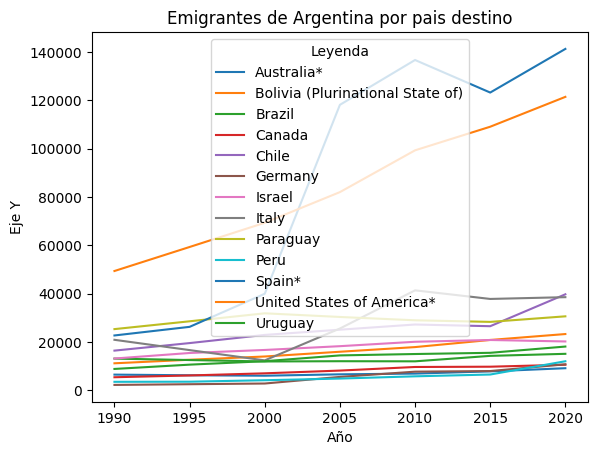

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir una paleta de colores personalizada
custom_palette = sns.color_palette("Paired", n_colors=len(final_emigrantes_columns))

# Tu código para graficar aquí
for i, column in enumerate(final_emigrantes_columns):
    sns.lineplot(x="Year", y=column, data=final_emigrantes_mujeres, palette=[custom_palette[i]], label=column)

# Añadir título y etiquetas de los ejes
plt.title("Emigrantes de Argentina por pais destino")
plt.xlabel("Año")
plt.ylabel("Eje Y")

# Agregar leyenda
plt.legend(title="Leyenda")

# Mostrar gráfico
plt.show()

#### 4.2 Inmigrantes

In [47]:
final_inmigrantes_todos = final_inmigrantes[final_inmigrantes['Genero_Migracion']=='Todos']

In [48]:
final_inmigrantes_columns=final_inmigrantes.columns.drop(['Year','Genero_Migracion'])

C:\Users\ACER\AppData\Local\Temp\ipykernel_2580\4250395960.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="Year", y=column, data=final_inmigrantes_todos, palette=[custom_palette[i]], label=column)
C:\Users\ACER\AppData\Local\Temp\ipykernel_2580\4250395960.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="Year", y=column, data=final_inmigrantes_todos, palette=[custom_palette[i]], label=column)
C:\Users\ACER\AppData\Local\Temp\ipykernel_2580\4250395960.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="Year", y=column, data=final_inmigrantes_todos, palette=[custom_palette[i]], label=column)
C:\Users\ACER\AppData\Local\Temp\ipykernel_2580\4250395960.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="Year", y=column, data=final_inmigrantes_todos, palette=[custom_palette[i]], label=column)


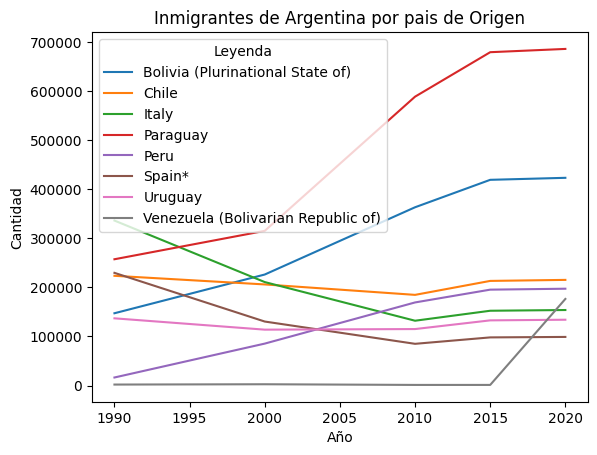

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir una paleta de colores personalizada
custom_palette = sns.color_palette("Paired", n_colors=len(final_emigrantes_columns))

# Tu código para graficar aquí
for i, column in enumerate(final_inmigrantes_columns):
    sns.lineplot(x="Year", y=column, data=final_inmigrantes_todos, palette=[custom_palette[i]], label=column)

# Añadir título y etiquetas de los ejes
plt.title("Inmigrantes de Argentina por pais de Origen")
plt.xlabel("Año")
plt.ylabel("Cantidad")

# Agregar leyenda
plt.legend(title="Leyenda")

# Mostrar gráfico
plt.show()

# **Indicadores** (Banco Mundial)
***

En esta sección se explorarán los datos de tasa de migracion y los indicadores seleccionados y descriptos en la sección de datos

### 1. Ingesta de datos

In [50]:
lista_archivos=[
"C:\\Users\\ACER\\Documents\\GitHub\\PF_DataScience_Migraciones\\Datasets\\Datasets Indicadores\\Banco_Mundia_ Ingresos_Per_Capita_segun_encuestas.xls",
"C:\\Users\\ACER\\Documents\\GitHub\\PF_DataScience_Migraciones\\Datasets\\Datasets Indicadores\\Banco_Mundial_Acceso_A_Electricidad.xls",
"C:\\Users\\ACER\\Documents\\GitHub\\PF_DataScience_Migraciones\\Datasets\\Datasets Indicadores\\Banco_Mundial_Contaminacion_Aire.xls",
"C:\\Users\\ACER\\Documents\\GitHub\\PF_DataScience_Migraciones\\Datasets\\Datasets Indicadores\\Banco_Mundial_Crecimiento_del_PBI__anual.xls",
"C:\\Users\\ACER\\Documents\\GitHub\\PF_DataScience_Migraciones\\Datasets\\Datasets Indicadores\\Banco_Mundial_Crecimiento_del_PBI_per_capita.xls",
"C:\\Users\\ACER\\Documents\\GitHub\\PF_DataScience_Migraciones\\Datasets\\Datasets Indicadores\\Banco_Mundial_Desempleo_Hombres.xls",
"C:\\Users\\ACER\\Documents\\GitHub\\PF_DataScience_Migraciones\\Datasets\\Datasets Indicadores\\Banco_Mundial_Desempleo_mujeres.xls",
"C:\\Users\\ACER\\Documents\\GitHub\\PF_DataScience_Migraciones\\Datasets\\Datasets Indicadores\\Banco_Mundial_Gasto___PBI.xls",
"C:\\Users\\ACER\\Documents\\GitHub\\PF_DataScience_Migraciones\\Datasets\\Datasets Indicadores\\Banco_Mundial_Importaciones_de_Mercaderia.xls",
"C:\\Users\\ACER\\Documents\\GitHub\\PF_DataScience_Migraciones\\Datasets\\Datasets Indicadores\\Banco_Mundial_Migration_Rate_Argentina.xls",
"C:\\Users\\ACER\\Documents\\GitHub\\PF_DataScience_Migraciones\\Datasets\\Datasets Indicadores\\Banco_Mundial_Personas_Desempleadas_Con_Educacion_Avanzada.xls",
"C:\\Users\\ACER\\Documents\\GitHub\\PF_DataScience_Migraciones\\Datasets\\Datasets Indicadores\\Banco_Mundial_Tasa_De_Cambio_Oficial.xls",
"C:\\Users\\ACER\\Documents\\GitHub\\PF_DataScience_Migraciones\\Datasets\\Datasets Indicadores\\Banco_Mundial_Tasa_De_Incidencia_De_La_Pobreza.xls",
"C:\\Users\\ACER\\Documents\\GitHub\\PF_DataScience_Migraciones\\Datasets\\Datasets Indicadores\\Banco_Mundial_Tasa_de_Mortalidad_en_un_año.xlsx",
"C:\\Users\\ACER\\Documents\\GitHub\\PF_DataScience_Migraciones\\Datasets\\Datasets Indicadores\\Banco_Mundial_Volumenes_internacionales_de_migrantes.xls"]
lista_nombres_df=['i_ingresos','i_electricidad','i_contaminacion','i_crecimiento_PBI','i_crecimiento_PBI_capita','i_desempleo_hombres','i_desempleo_mujeres','i_Gasto_PBI','i_importaciones','migration_rate','i_desempleados_educacion','i_tasa_de_cambio','i_tasa_pobreza','i_mortalidad']

In [51]:
dataframes = {}  # Diccionario para almacenar los dataframes

for file, df_name in zip(lista_archivos, lista_nombres_df):
    dataframes[df_name] = pd.read_excel(file,sheet_name='Data',skiprows= 3)  # Leyendo el archivo y guardándolo en el diccionario


In [52]:
i_crecimiento_PBI =dataframes['i_crecimiento_PBI']

In [53]:
i_crecimiento_PBI.head(2)

Country Name Country Code                 Indicator Name     Indicator Code   
0        Aruba          ABW  Crecimiento del PIB (% anual)  NY.GDP.MKTP.KD.ZG  \
1          NaN          AFE  Crecimiento del PIB (% anual)  NY.GDP.MKTP.KD.ZG   

   1960      1961      1962      1963      1964     1965      1966      1967   
0   NaN       NaN       NaN       NaN       NaN      NaN       NaN       NaN  \
1   NaN  0.254879  7.965825  5.148217  4.579328  5.34621  3.935912  5.260546   

       1968      1969      1970      1971      1972      1973   1974   
0       NaN       NaN       NaN       NaN       NaN       NaN    NaN  \
1  4.010708  5.279902  4.683212  5.400758  2.164868  4.439659  5.893   

       1975      1976      1977      1978      1979     1980      1981   
0       NaN       NaN       NaN       NaN       NaN      NaN       NaN  \
1  1.747772  2.858053  1.253909  1.070394  2.807225  5.39754  4.306544   

       1982      1983     1984      1985      1986       1987       1988   
0       NaN       NaN      NaN       NaN       NaN  16.078431  18.648649  \
1  0.520133  0.173314  3.02094 -0.429628  2.288518   4.237417   4.012920   

        1989      1990      1991      1992      1993      1994      1995   
0  12.129841  3.961402  7.962872  5.882354  7.307693  8.203901  2.547144  \
1   2.904292 -0.018534  0.136909 -1.979622 -0.365019  1.984762  4.335235   

       1996      1997      1998      1999      2000      2001      2002   
0  1.185789  7.046875  1.991984  1.238042  7.616589  4.195963 -0.957771  \
1  5.450146  4.433279  1.842345  2.653278  3.353760  3.627244  3.901576   

       2003      2004      2005      2006      2007      2008       2009   
0  1.120879  7.281026 -0.384927  1.138906  3.096722  1.833431 -11.683586  \
1  3.101958  5.507830  6.112155  6.558306  6.577086  4.312489   0.663961   

       2010      2011      2012      2013      2014      2015      2016   
0 -2.732596  3.366778 -1.035375  6.429817 -0.020479  3.543630  2.116716  \
1  5.158676  3.706906  0.845016  4.219599  3.994682  2.974101  2.224524   

       2017      2018      2019       2020       2021      2022  
0  5.482371  5.257855  0.635030 -18.589099  17.172509       NaN  
1  2.546973  2.513984  2.087765  -2.888681   4.334927  3.404852

In [54]:
titulos_nuevos = [
    "Ingresos",
    "Electricidad",
    "Contaminación",
    "Crecimiento PBI",
    "Crecimiento PBI per cápita",
    "Desempleo Hombre",
    "Desempleo mujeres",
    "Gasto PBI",
    "Importaciones",
    "Migracion neta",
    "Desempleados con educación avanzada",
    "Tasa de cambio",
    "Pobreza",
    "Mortalidad"
]
titulos_viejos = ['Consumo medio o ingresos per cápita según encuestas, población total (USD por día según la PPA de 2011)',
       'Acceso a la electricidad (% de población)',
       'Contaminación del aire por PM2,5, población expuesta a niveles que exceden el valor indicativo de la Organización Mundial de la Salud (OMS) (% del total)',
       'Crecimiento del PIB (% anual)',
       'Crecimiento del PIB per cápita (% anual)',
       'Desempleo, varones (% de participación masculina en la fuerza laboral) (estimación nacional)',
       'Desempleo, mujeres (% de la población activa femenina) (estimación modelado OIT)',
       'Gasto (% del PIB)',
       'Importaciones de mercaderías (US$ a precios actuales)',
       'Migración neta',
       'Personas desempleadas con educación avanzada (% del desempleo total)',
       'Tasa de cambio oficial (UMN por US$, promedio para un período)',
       'Tasa de incidencia de la pobreza, sobre la base de la línea de pobreza nacional (% de la población)',
       'Tasa de mortalidad en un año (por cada 1.000 personas)']

diccionario_titulos = dict(zip(titulos_viejos, titulos_nuevos))


Genero un diccionario melts_1 que guarda cada uno de los dataframes de indicadores cambiando la estructura, colocando los años en las filas

In [55]:
melts_1={}
for df_name, df in dataframes.items():
    # Derretir el DataFrame para transformar los años en filas
    df= df.drop(['Country Name'], axis=1)

    df_melted = df.melt(id_vars=['Indicator Name','Indicator Code','Country Code'], var_name='Year', value_name=df['Indicator Name'].max())
    df_melted=df_melted.drop(columns=['Indicator Name','Indicator Code'])
    melts_1[df_name] =  df_melted 

In [56]:
melts_1['i_crecimiento_PBI'].head(3)

Country Code  Year  Crecimiento del PIB (% anual)
0          ABW  1960                            NaN
1          AFE  1960                            NaN
2          AFG  1960                            NaN

Uno todo los dataframes  en el diccionario  melts_1 por la clave compuesta  ('country code' , 'Year') y los guardo en merged modelo.

In [57]:
from functools import reduce

# Asegúrate de que melts_1 contenga los DataFrames que quieres fusionar

# Define una función para fusionar dos DataFrames en función de las columnas 'Country Name' y 'Year'
def merge_dataframes(left, right):
    return pd.merge(left, right, on=['Country Code', 'Year'])

# Utiliza reduce para aplicar la función de fusión a todos los DataFrames en la lista
merged_df_modelo = reduce(merge_dataframes, melts_1.values())

# Imprime el DataFrame resultante

In [58]:
merged_df_modelo.head(100)

Country Code  Year   
0           ABW  1960  \
1           AFE  1960   
2           AFG  1960   
3           AFW  1960   
4           AGO  1960   
..          ...   ...   
95          HIC  1960   
96          HKG  1960   
97          HND  1960   
98          HPC  1960   
99          HRV  1960   

    Consumo medio o ingresos per cápita según encuestas, población total (USD por día según la PPA de 2011)   
0                                                 NaN                                                        \
1                                                 NaN                                                         
2                                                 NaN                                                         
3                                                 NaN                                                         
4                                                 NaN                                                         
..                                                ...                                                         
95                                                NaN                                                         
96                                                NaN                                                         
97                                                NaN                                                         
98                                                NaN                                                         
99                                                NaN                                                         

    Acceso a la electricidad (% de población)   
0                                         NaN  \
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   
..                                        ...   
95                                        NaN   
96                                        NaN   
97                                        NaN   
98                                        NaN   
99                                        NaN   

    Contaminación del aire por PM2,5, población expuesta a niveles que exceden el valor indicativo de la Organización Mundial de la Salud (OMS) (% del total)   
0                                                 NaN                                                                                                          \
1                                                 NaN                                                                                                           
2                                                 NaN                                                                                                           
3                                                 NaN                                                                                                           
4                                                 NaN                                                                                                           
..                                                ...                                                                                                           
95                                                NaN                                                                                                           
96                                                NaN                                                                                                           
97                                                NaN                                                                                                           
98                                                NaN                                                                                                           
99       

Cambio los nombres de los indicadores en las columnas por un valor mas reducido, utilizando diccionario titulos.

In [59]:
merged_df_modelo.rename( columns =diccionario_titulos, inplace=True)

In [60]:
merged_df_modelo.head(3)

Country Code  Year  Ingresos  Electricidad  Contaminación  Crecimiento PBI   
0          ABW  1960       NaN           NaN            NaN              NaN  \
1          AFE  1960       NaN           NaN            NaN              NaN   
2          AFG  1960       NaN           NaN            NaN              NaN   

   Crecimiento PBI per cápita  Desempleo Hombre  Desempleo mujeres  Gasto PBI   
0                         NaN               NaN                NaN        NaN  \
1                         NaN               NaN                NaN        NaN   
2                         NaN               NaN                NaN        NaN   

   Importaciones  Migracion neta  Desempleados con educación avanzada   
0            NaN             0.0                                  NaN  \
1   3.757511e+09        -90849.0                                  NaN   
2   8.700000e+07          2606.0                                  NaN   

   Tasa de cambio  Pobreza  Mortalidad  
0             NaN      NaN    6.594000  
1             NaN      NaN   20.918108  
2       17.196561      NaN   31.921000

Analizo cuantos valores nulos tengo por columna

In [61]:
merged_df_modelo.isnull().sum()

Country Code                               0
Year                                       0
Ingresos                               16514
Electricidad                            9410
Contaminación                          13854
Crecimiento PBI                         4027
Crecimiento PBI per cápita              4028
Desempleo Hombre                       11961
Desempleo mujeres                       9246
Gasto PBI                              12025
Importaciones                           2634
Migracion neta                           328
Desempleados con educación avanzada    14248
Tasa de cambio                          5252
Pobreza                                15746
Mortalidad                               739
dtype: int64

Cambio el tipo de datos de 'Year' a int

In [62]:
merged_df_modelo['Year']=merged_df_modelo['Year'].astype(int)

Guardo el dataset final en 'indicadores_modelo.csv'

In [63]:
merged_df_modelo.to_csv('indicadores_modelo.csv')

Filtro para argentina y observo los estadisticos de los indicadores 

In [64]:
Indicadores_argentina= merged_df_modelo[merged_df_modelo['Country Code']=='ARG']
Indicadores_argentina.describe()

Year  Ingresos  Electricidad  Contaminación  Crecimiento PBI   
count    63.000000   2.00000     32.000000      12.000000        62.000000  \
mean   1991.000000  26.45500     96.835889      98.308302         2.394950   
std      18.330303   2.38295      2.622902       2.078270         5.514967   
min    1960.000000  24.77000     92.154800      93.852825       -10.894485   
25%    1975.500000  25.61250     94.734255      98.241030        -2.013904   
50%    1991.000000  26.45500     96.844837      99.314596         2.815129   
75%    2006.500000  27.29750     99.386589      99.535303         6.738955   
max    2022.000000  28.14000    100.000000      99.606700        10.569433   

       Crecimiento PBI per cápita  Desempleo Hombre  Desempleo mujeres   
count                   62.000000         35.000000          32.000000  \
mean                     1.049743          9.165143          12.213250   
std                      5.469832          4.164406           4.154761   
min                    -11.845950          3.380000           5.748000   
25%                     -3.074939          6.190000           9.122500   
50%                      1.515220          7.890000          10.637500   
75%                      5.126273         11.770000          15.322500   
max                      9.844296         20.130000          22.212000   

       Gasto PBI  Importaciones  Migracion neta   
count  23.000000   6.300000e+01       62.000000  \
mean   18.423858   2.252089e+10     6361.419355   
std     4.899176   2.455059e+10    22476.143540   
min    10.325440   9.810000e+08   -22787.000000   
25%    15.056511   3.724500e+09   -14689.500000   
50%    16.876342   9.430000e+09     4584.000000   
75%    22.776706   3.646900e+10    30538.500000   
max    26.179916   8.152200e+10    43652.000000   

       Desempleados con educación avanzada  Tasa de cambio    Pobreza   
count                            17.000000    6.000000e+01   7.000000  \
mean                              4.838235    7.921445e+00  34.571429   
std                               3.087844    2.300177e+01   5.604675   
min                               2.920000    1.387167e-11  25.700000   
25%                               3.250000    6.987208e-09  31.150000   
50%                               3.770000    9.947937e-01  35.500000   
75%                               4.720000    3.107778e+00  38.250000   
max                              13.780000    1.306165e+02  42.000000   

       Mortalidad  
count   62.000000  
mean     8.221274  
std      0.689661  
min      7.369000  
25%      7.560500  
50%      7.953500  
75%      8.898750  
max      9.478000

## 2. Crear tabalas para análisis de indices de paises involucrados en migraciones Argentina

En esta sección se explorarán los datos de tasa de migracion y los indicadores seleccionados y descriptos en la sección de datos. El estudio estara acotado a todos los paises que participan en los flujos Migratorios de Argentina. 
De los datasets obtenidos en el apartado anterior, final_inmigrantes y final_emigrantes, se realiza una lista con los paises que estan involucrados en el flujo Migratorio de Argentina.

In [65]:
final_inmigrantes.columns

Index(['Year', 'Genero_Migracion', 'Bolivia (Plurinational State of)', 'Chile',
       'Italy', 'Paraguay', 'Peru', 'Spain*', 'Uruguay',
       'Venezuela (Bolivarian Republic of)'],
      dtype='object', name='Origin')

In [66]:
paises_origen=['Bolivia','Chile','Italia','Paraguay','Perú','España','Uruguay','Venezuela']
paises_destino=['Australia','Bolivia','Brasil','Canadá','Chile','Alemania','Israel','Italia','Paraguay','Perú','España','Estados Unidos','Uruguay']

La lista se realiza con los nombres en español y con el formato que aparecen en los datos del Banco Mundial.

In [67]:
lista_paises_corredor= ['Argentina','Bolivia', 'Chile','Italia', 'Paraguay', 'Perú', 'Uruguay','Venezuela','Australia','Brasil','Canadá','Alemania','Israel','Estados Unidos','España']

Me quedo solo con los paises que estan involucrados en el corredor migratorio de Argentina

In [68]:
resultados = {}
for nombre_df in dataframes:
    df_actual = dataframes[nombre_df]
    mascara = df_actual[df_actual['Country Name'].isin(lista_paises_corredor)]
    resultados[nombre_df] = mascara


Genero una lista de dataframes llamada melts, cada dataframe contiene el valor de un indicador, en las filas los años y  en las columnas los paises. 

In [69]:
melts={}
for df_name, df in resultados.items():
    # Derretir el DataFrame para transformar los años en filas
    df= df.drop(['Country Code'], axis=1)

    df_melted = df.melt(id_vars=['Country Name', 'Indicator Name','Indicator Code'], var_name='Year', value_name='Valor')
    
    # Reemplazar el DataFrame original con el DataFrame derretido en el diccionario
    df_pivoted = df_melted.pivot_table(index=['Year', 'Indicator Name'], columns='Country Name', values='Valor').reset_index()
    df_pivoted = df_pivoted.rename_axis(None, axis=1)  # Elimina el nombre del índice de las columnas
    df_pivoted.sort_values(by='Year',inplace=True)
    melts[df_name] = df_pivoted.reset_index(drop=True)  # Elimina el nombre del índice de las filas

Finalmente genero una lista de dataframes que contengan la evolucion en el tiempo de todos los indicadores seleccionados para cada país estudiado. 

In [70]:
ultimos_dfs = {}
# Iterar a través de los DataFrames
for pais in lista_paises_corredor:
    combined_dfs = pd.DataFrame()  # Inicializa el DataFrame en cada iteración de país
    for df_name, df in melts.items():
        if pais in df.columns:
            df_1 = df[['Year', pais]]  # Selecciona 'Year' y el país
            df_1.columns = ['Year', df['Indicator Name'].min()]
            if combined_dfs.empty:  # Si es el primer DataFrame, asigna directamente
                combined_dfs = df_1
            else:  # De lo contrario, únelo al DataFrame combinado
                combined_dfs = pd.merge(combined_dfs, df_1, on='Year',how='outer')
                combined_dfs['Pais']=pais
                combined_dfs.sort_values(by='Year',inplace=True)
    ultimos_dfs[pais] = combined_dfs
    combined_dfs.rename(columns=diccionario_titulos, inplace=True)
    for pais, df in ultimos_dfs.items():
        column_order = ['Year', 'Pais'] + [col for col in df if col not in ['Year', 'Pais']]
        ultimos_dfs[pais] = df[column_order]



In [71]:
ultimos_dfs.keys()

dict_keys(['Argentina', 'Bolivia', 'Chile', 'Italia', 'Paraguay', 'Perú', 'Uruguay', 'Venezuela', 'Australia', 'Brasil', 'Canadá', 'Alemania', 'Israel', 'Estados Unidos', 'España'])

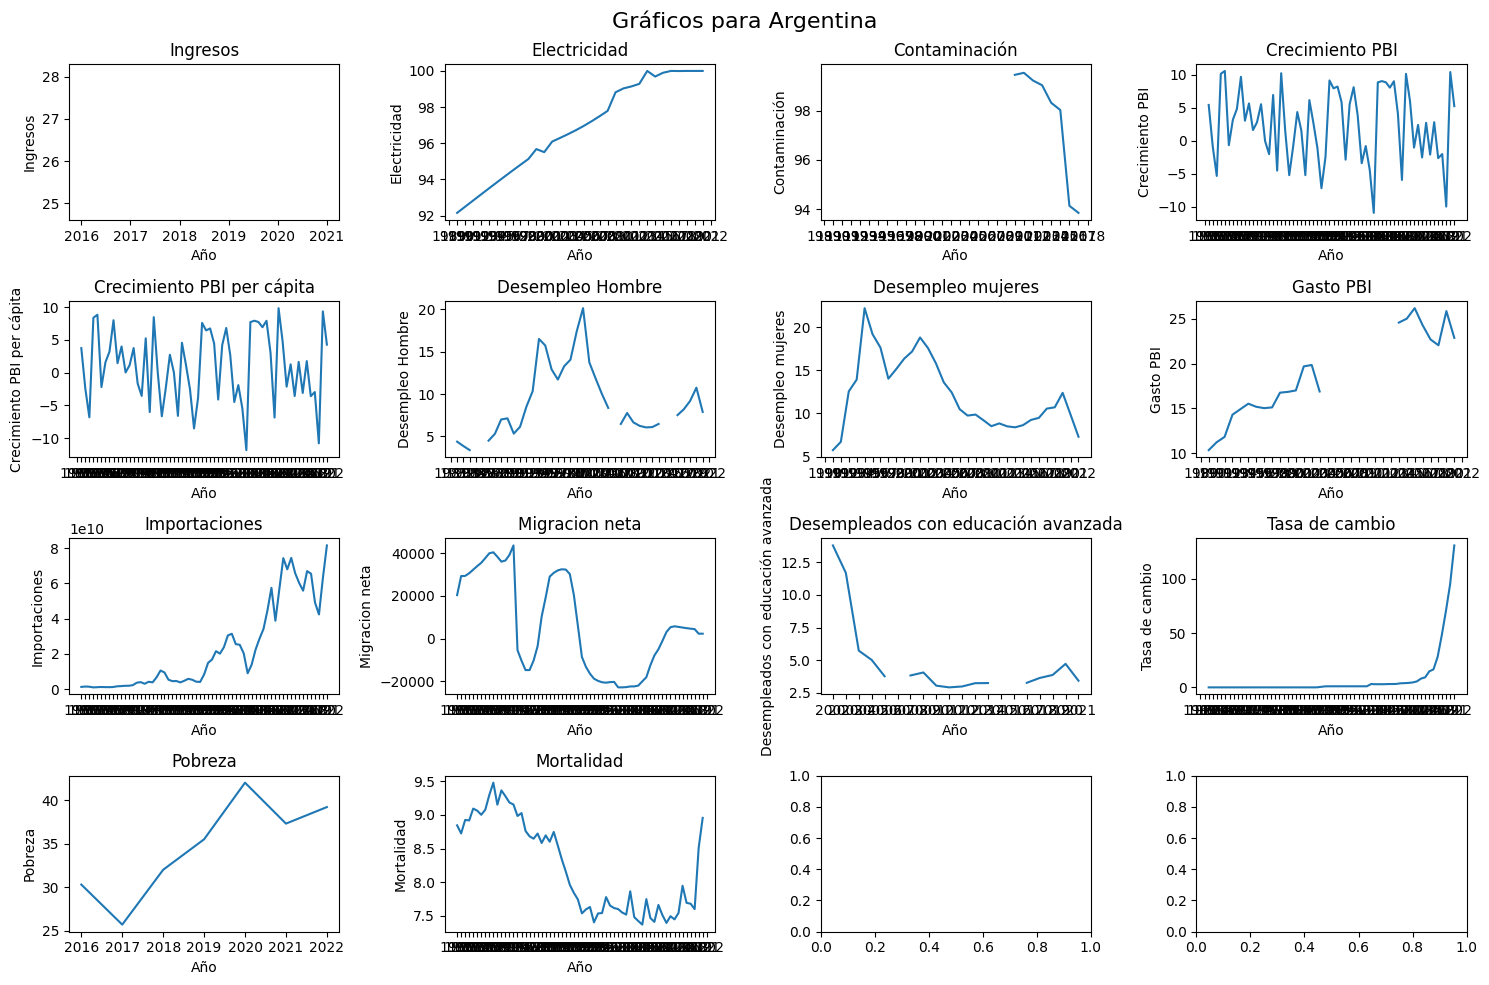

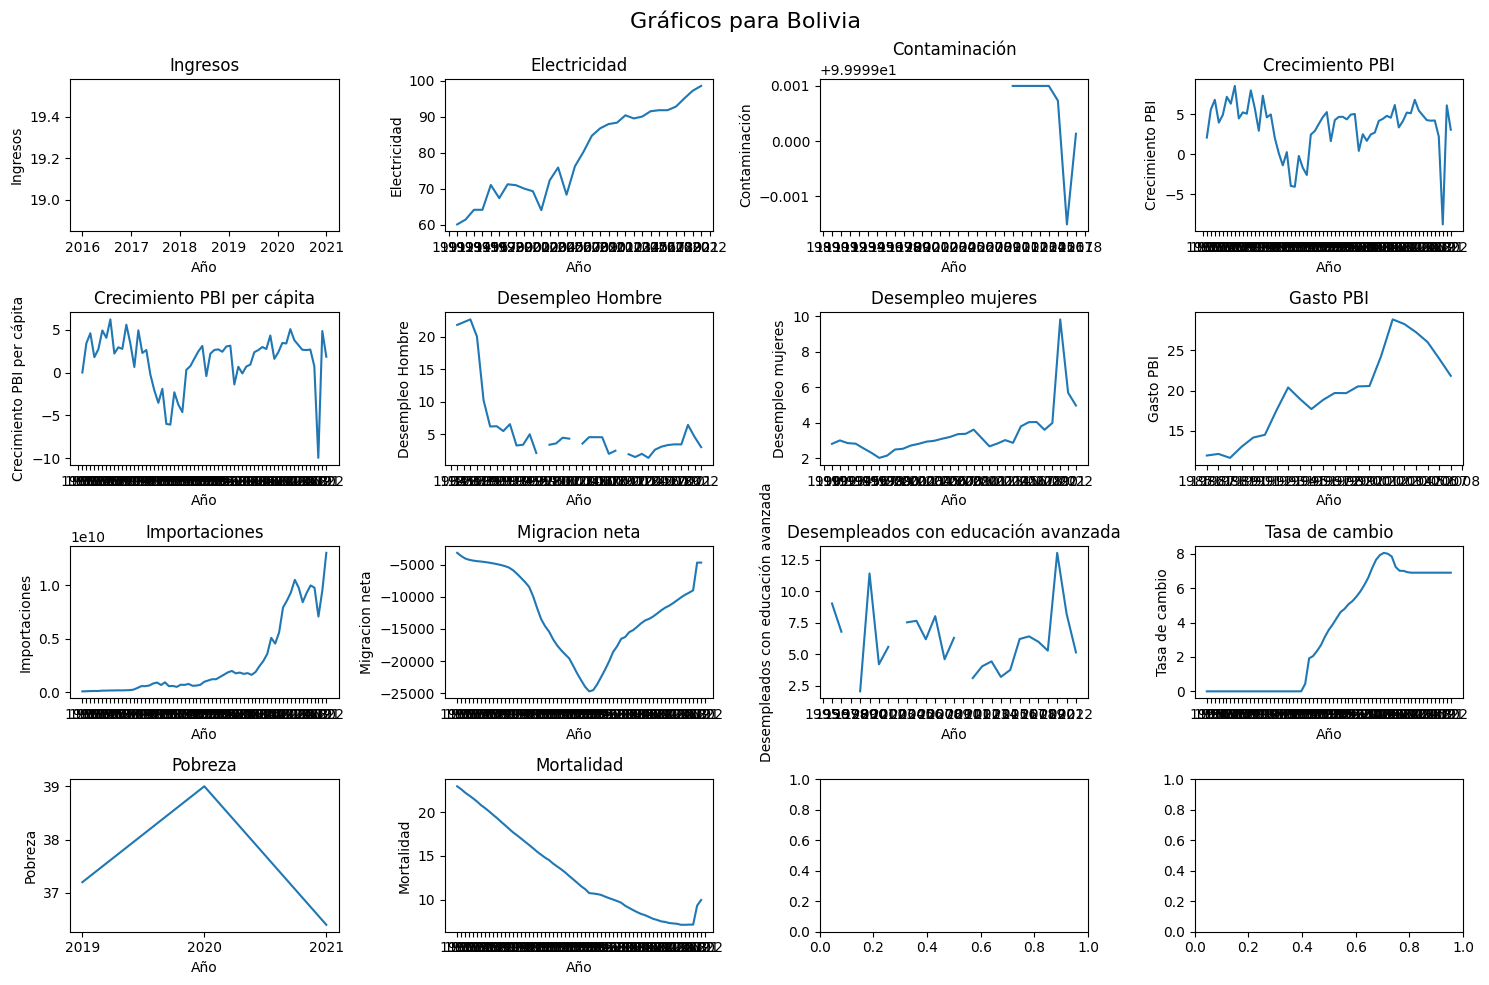

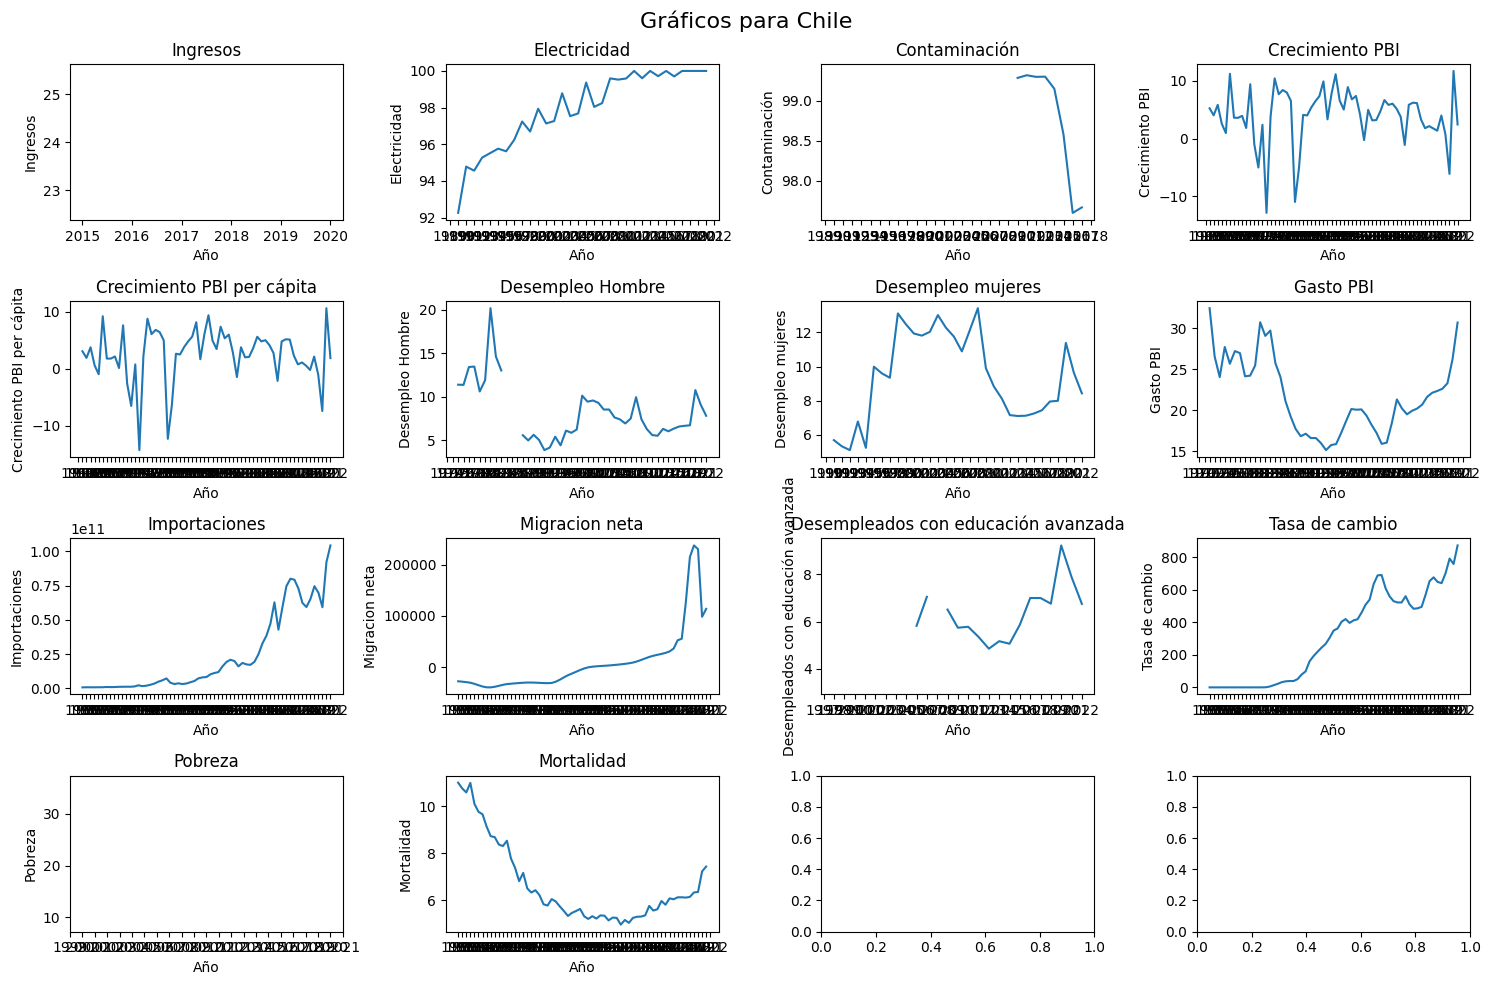

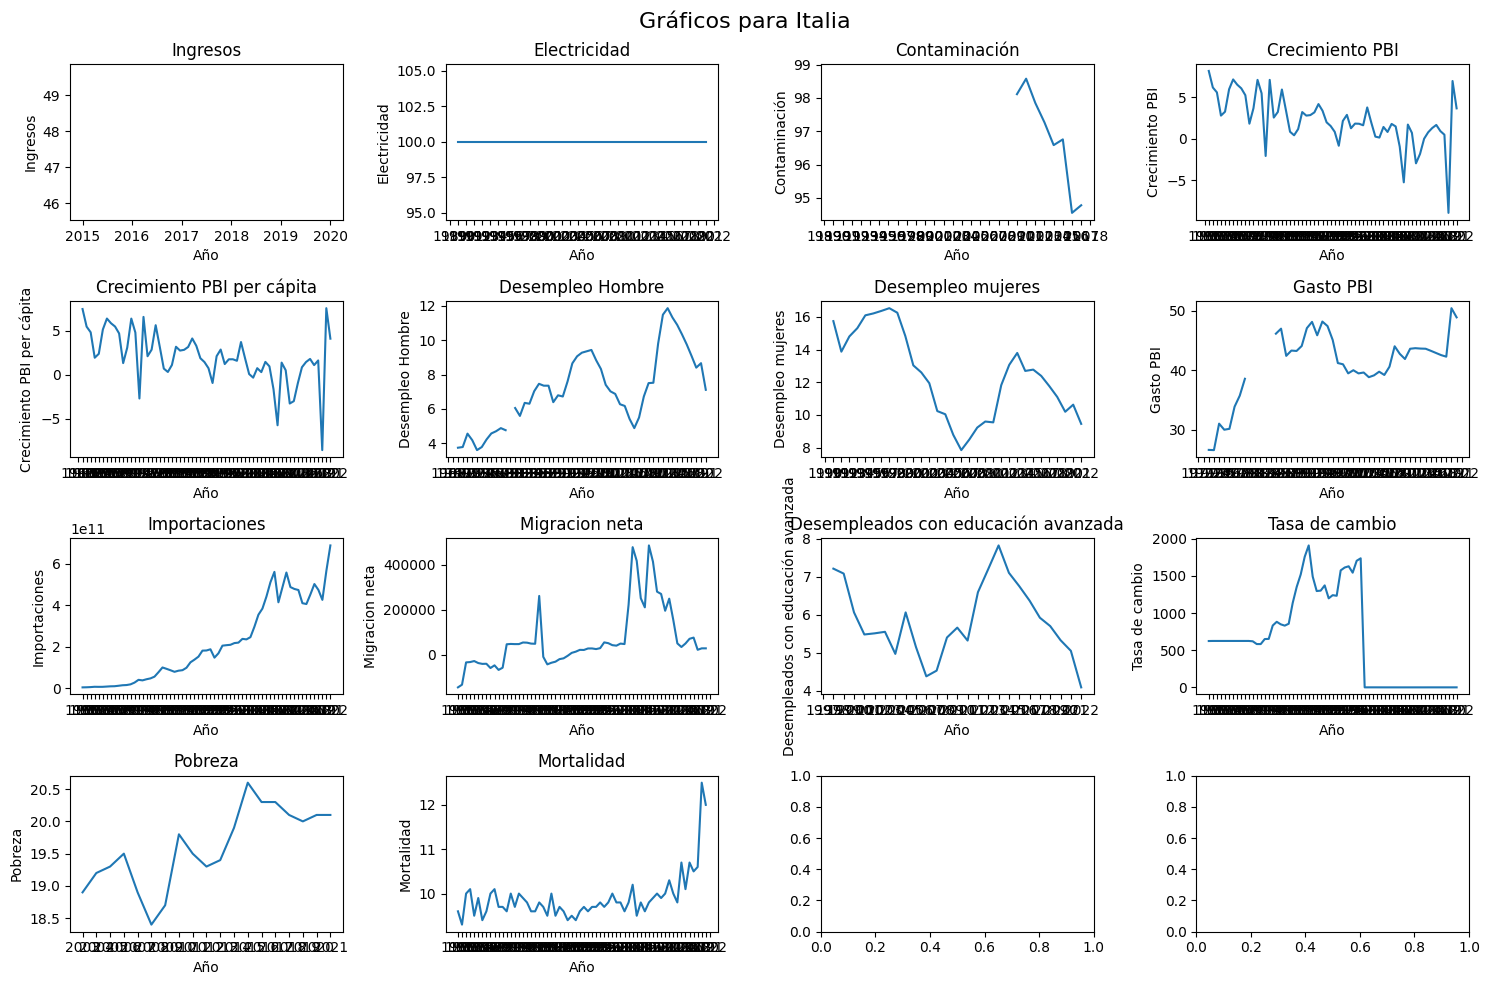

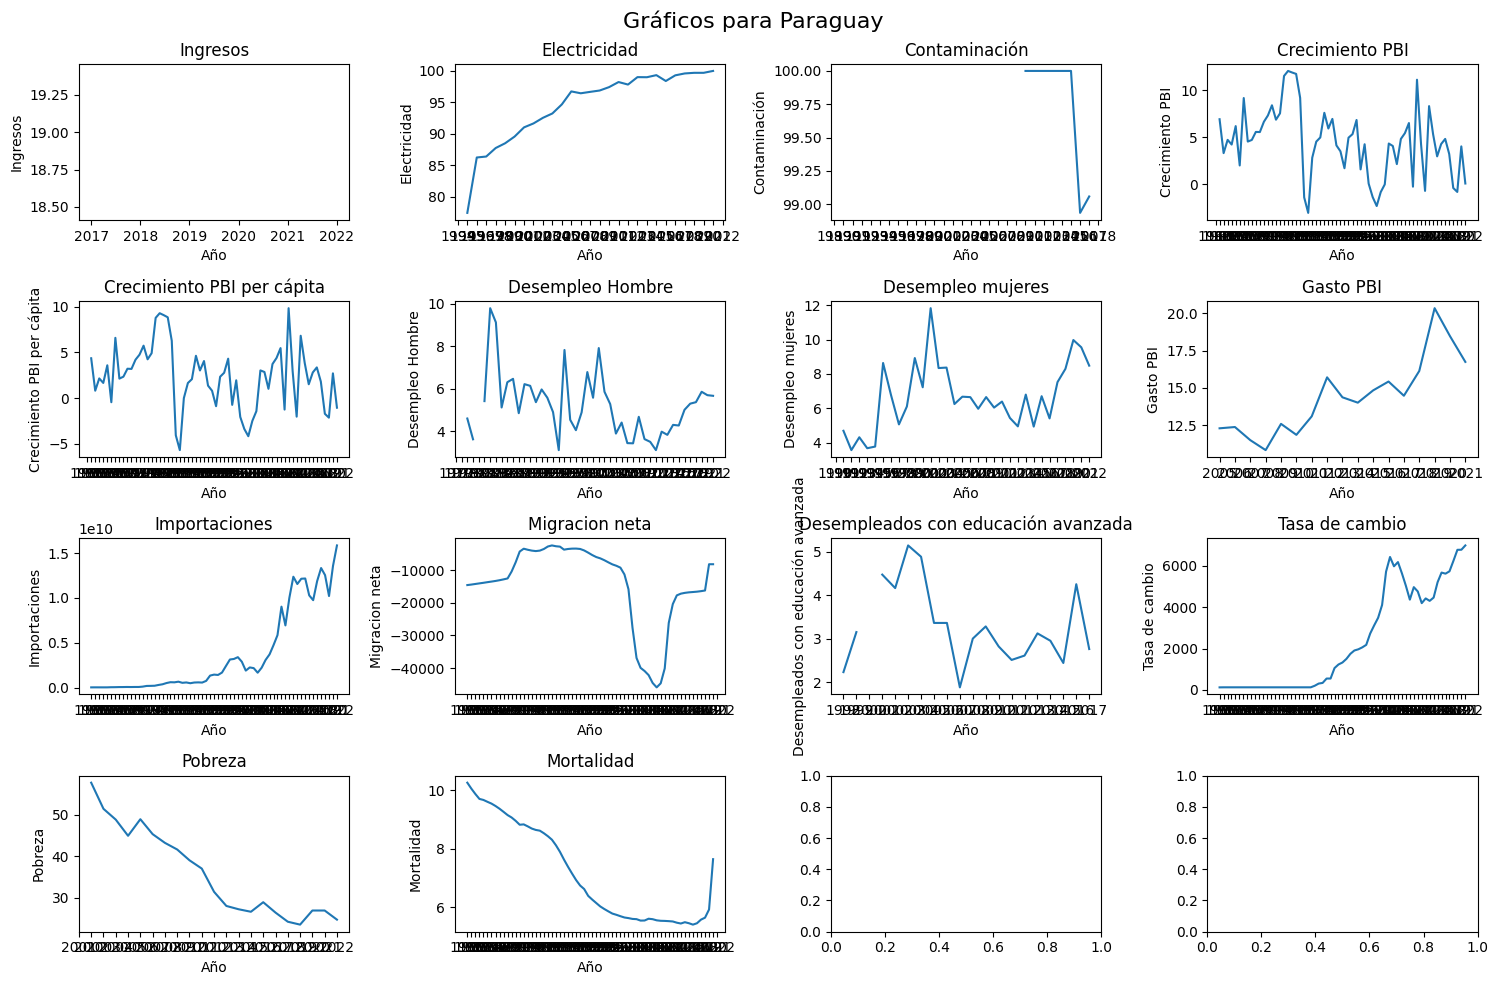

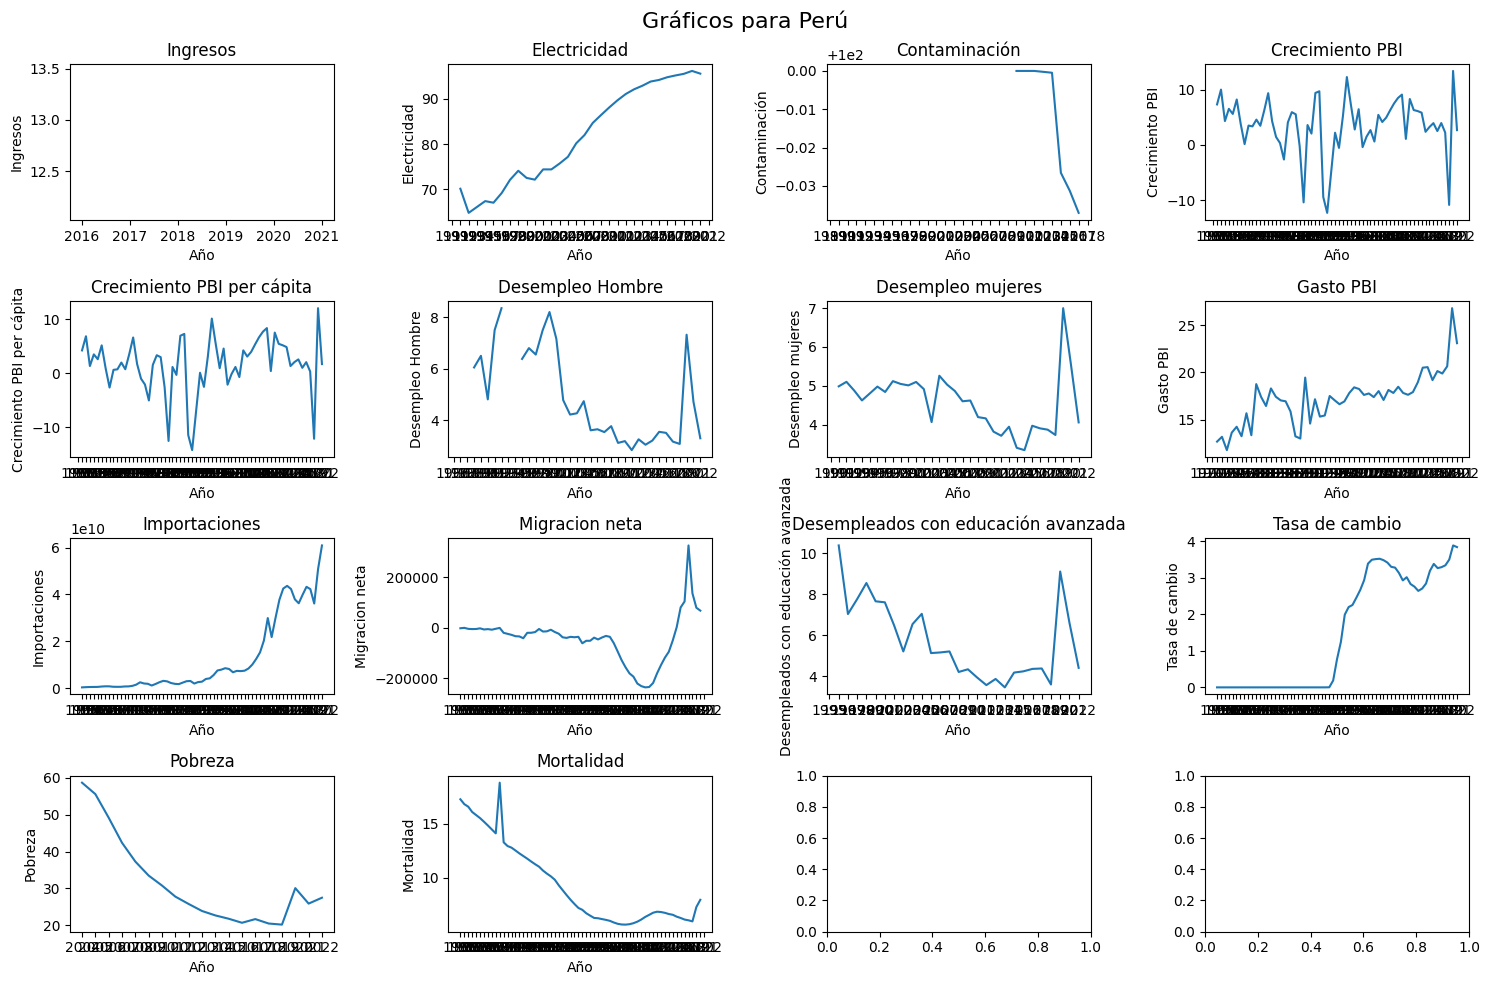

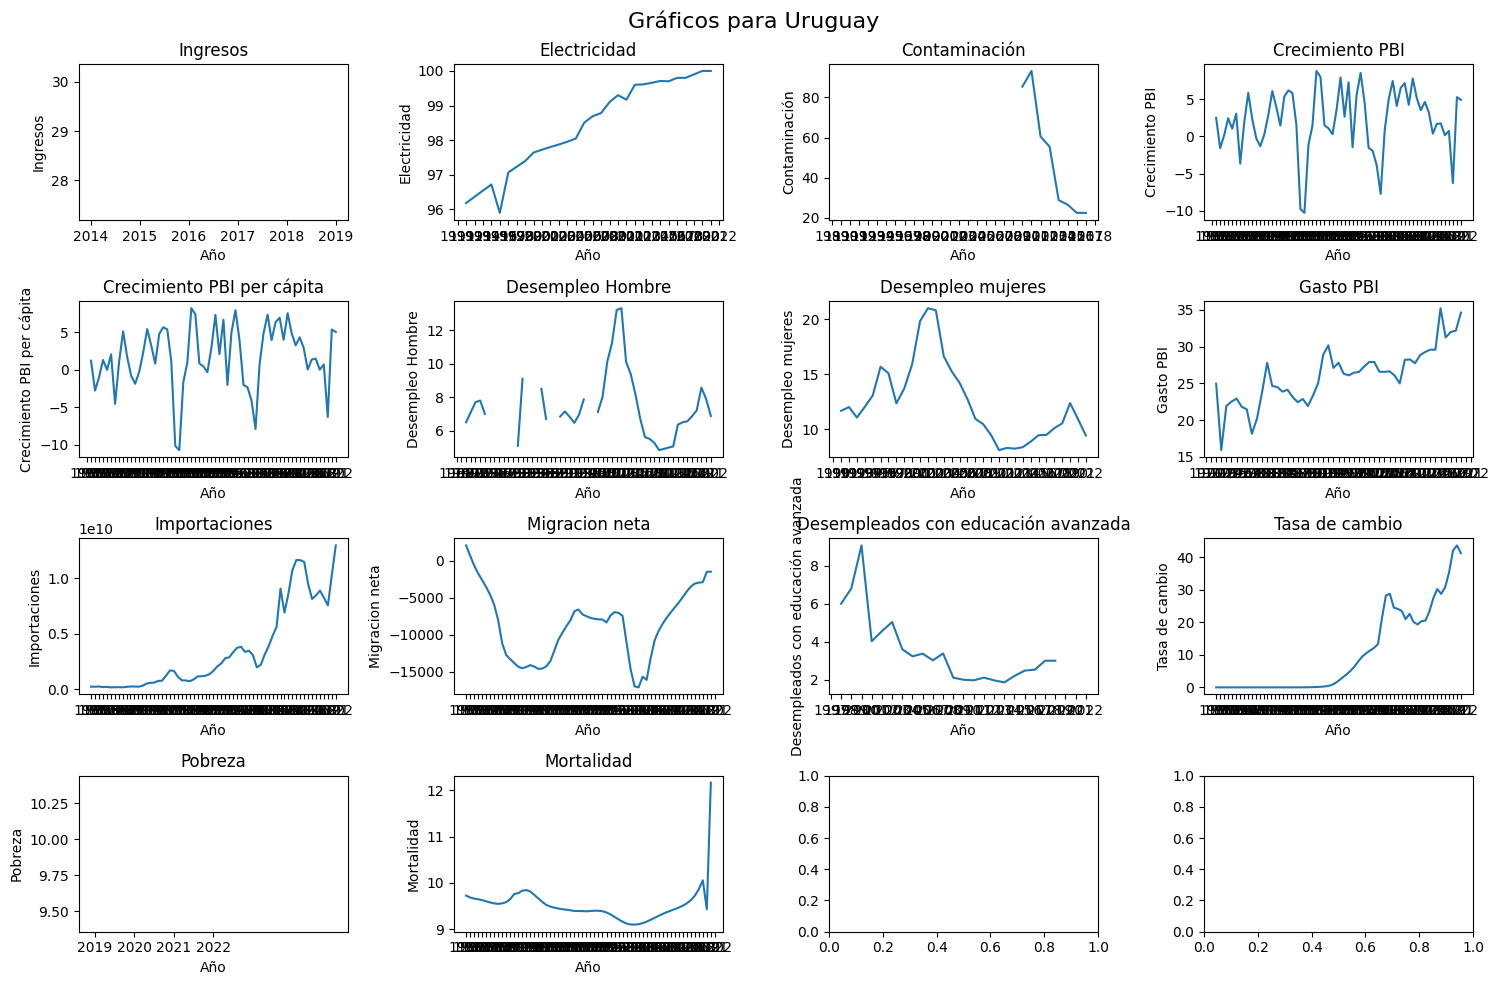

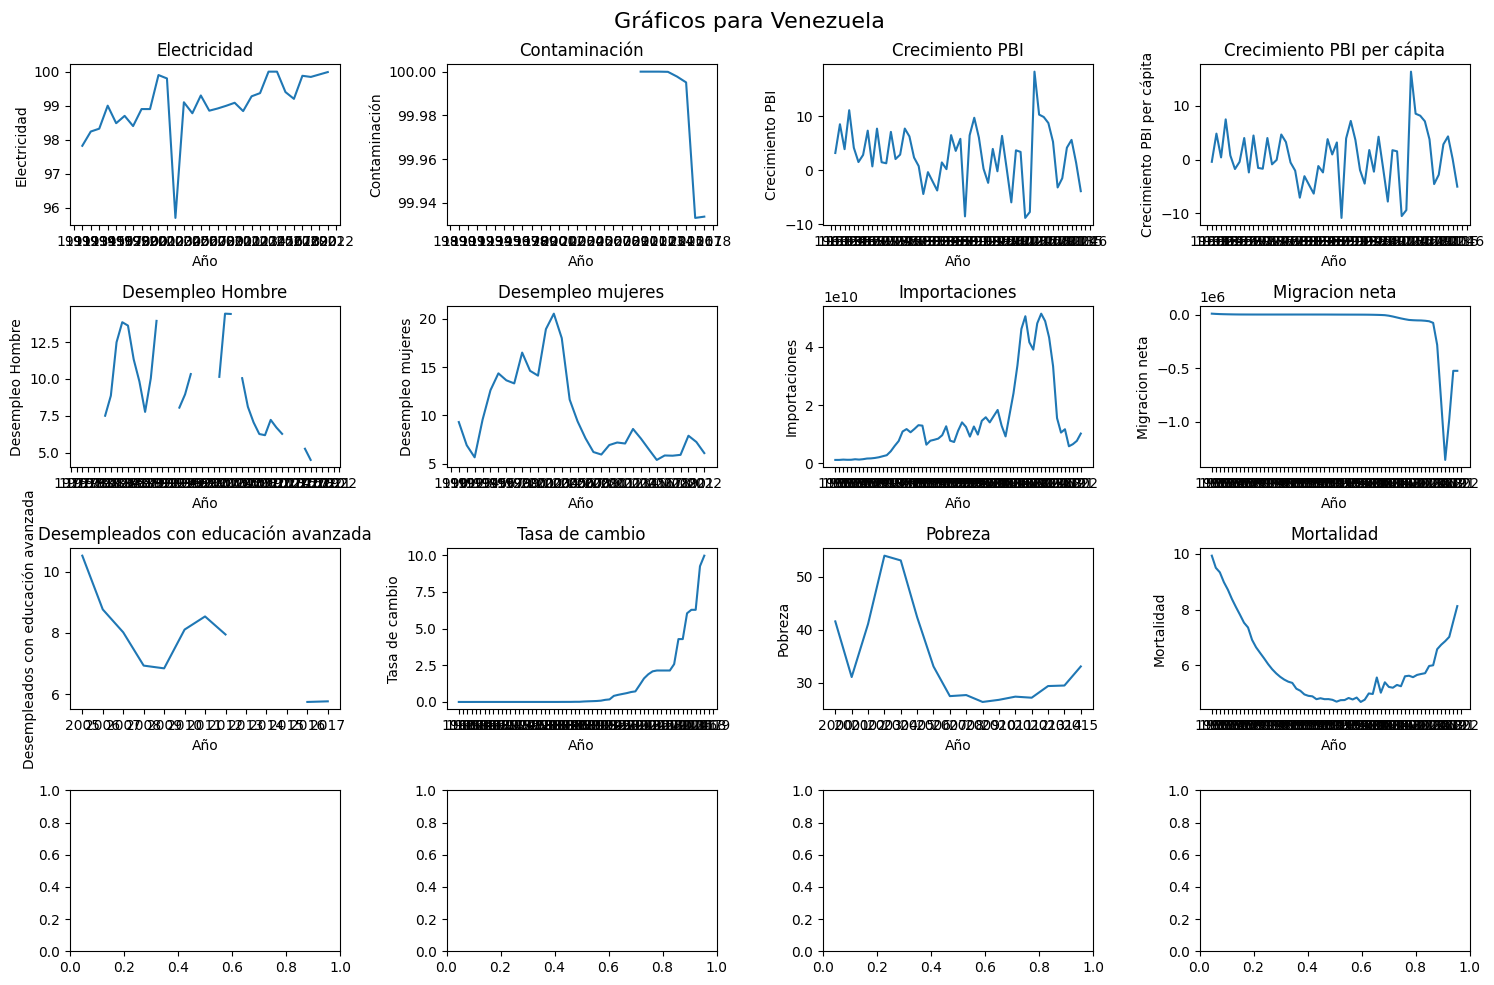

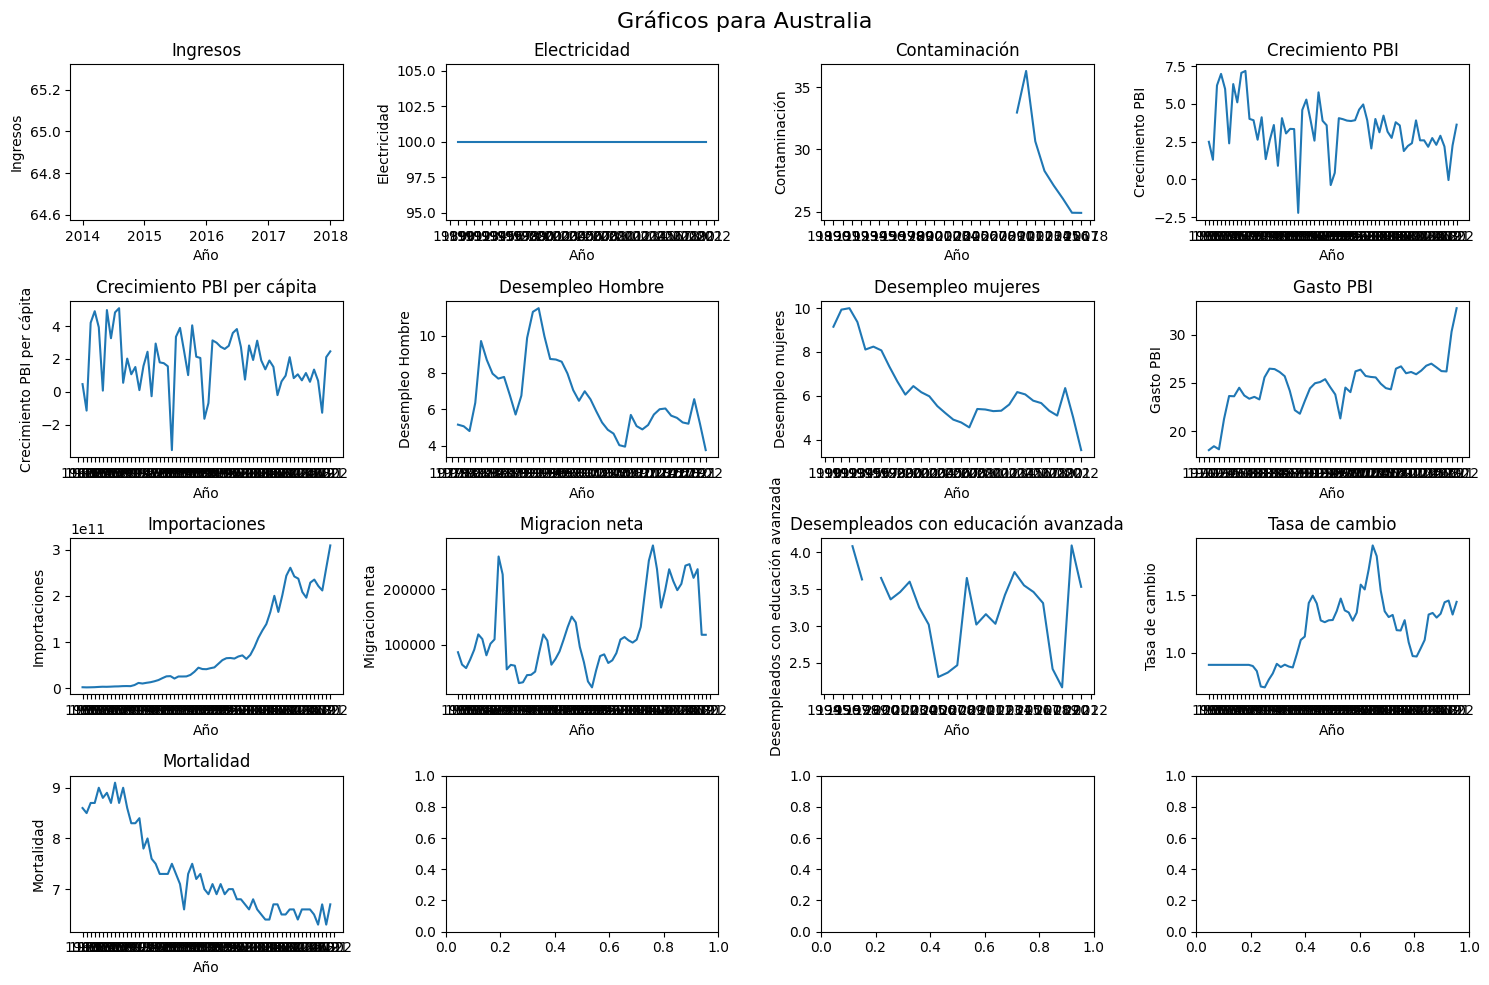

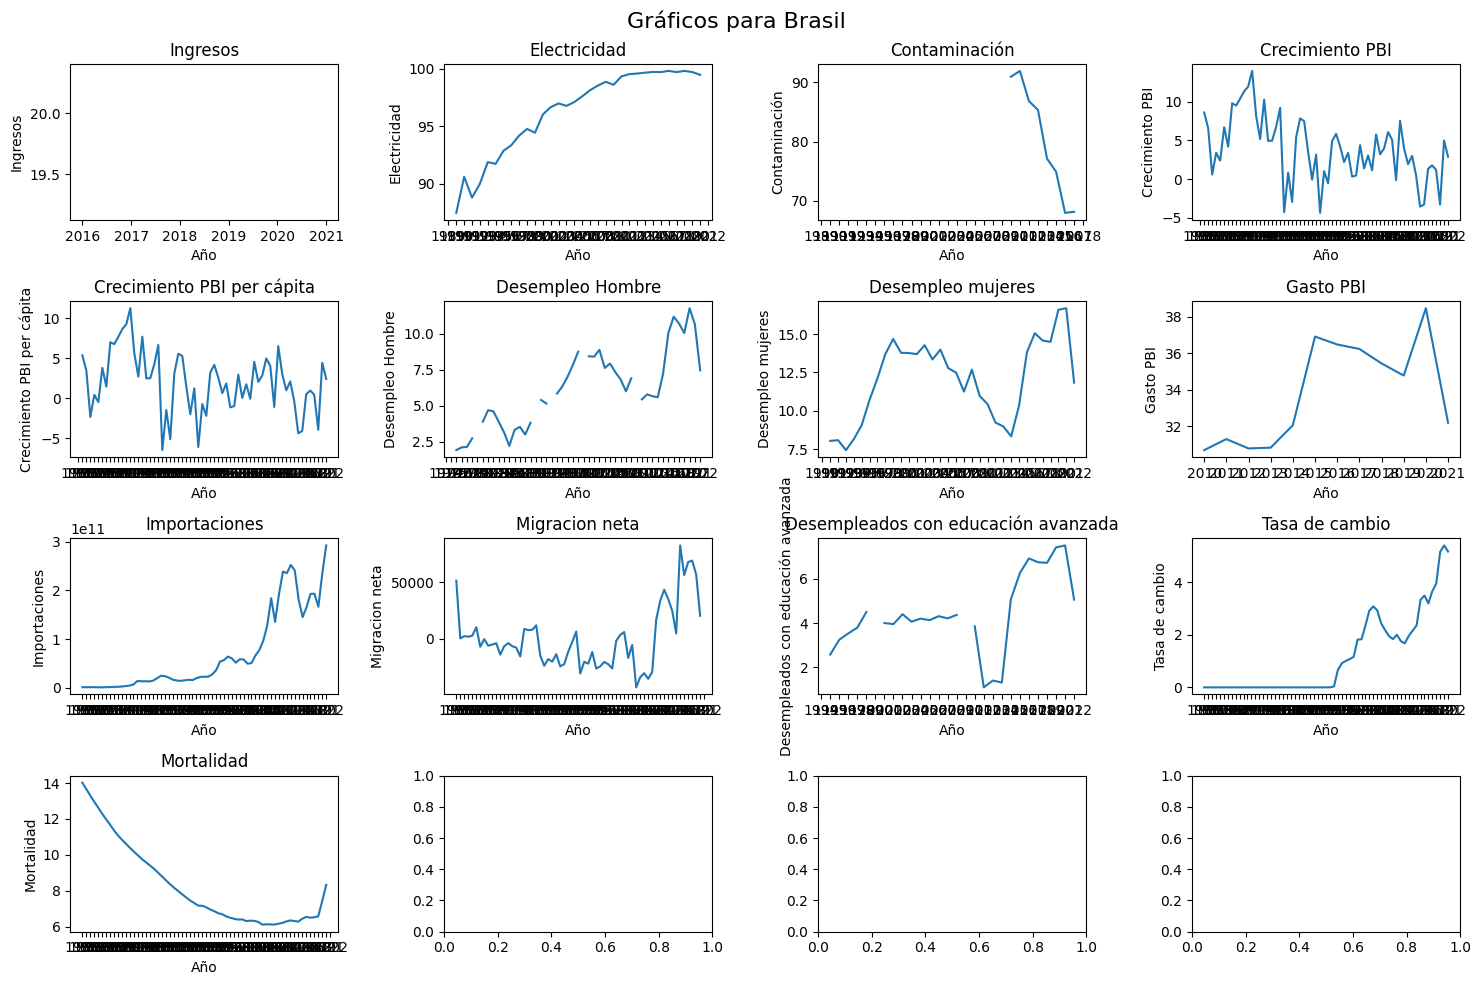

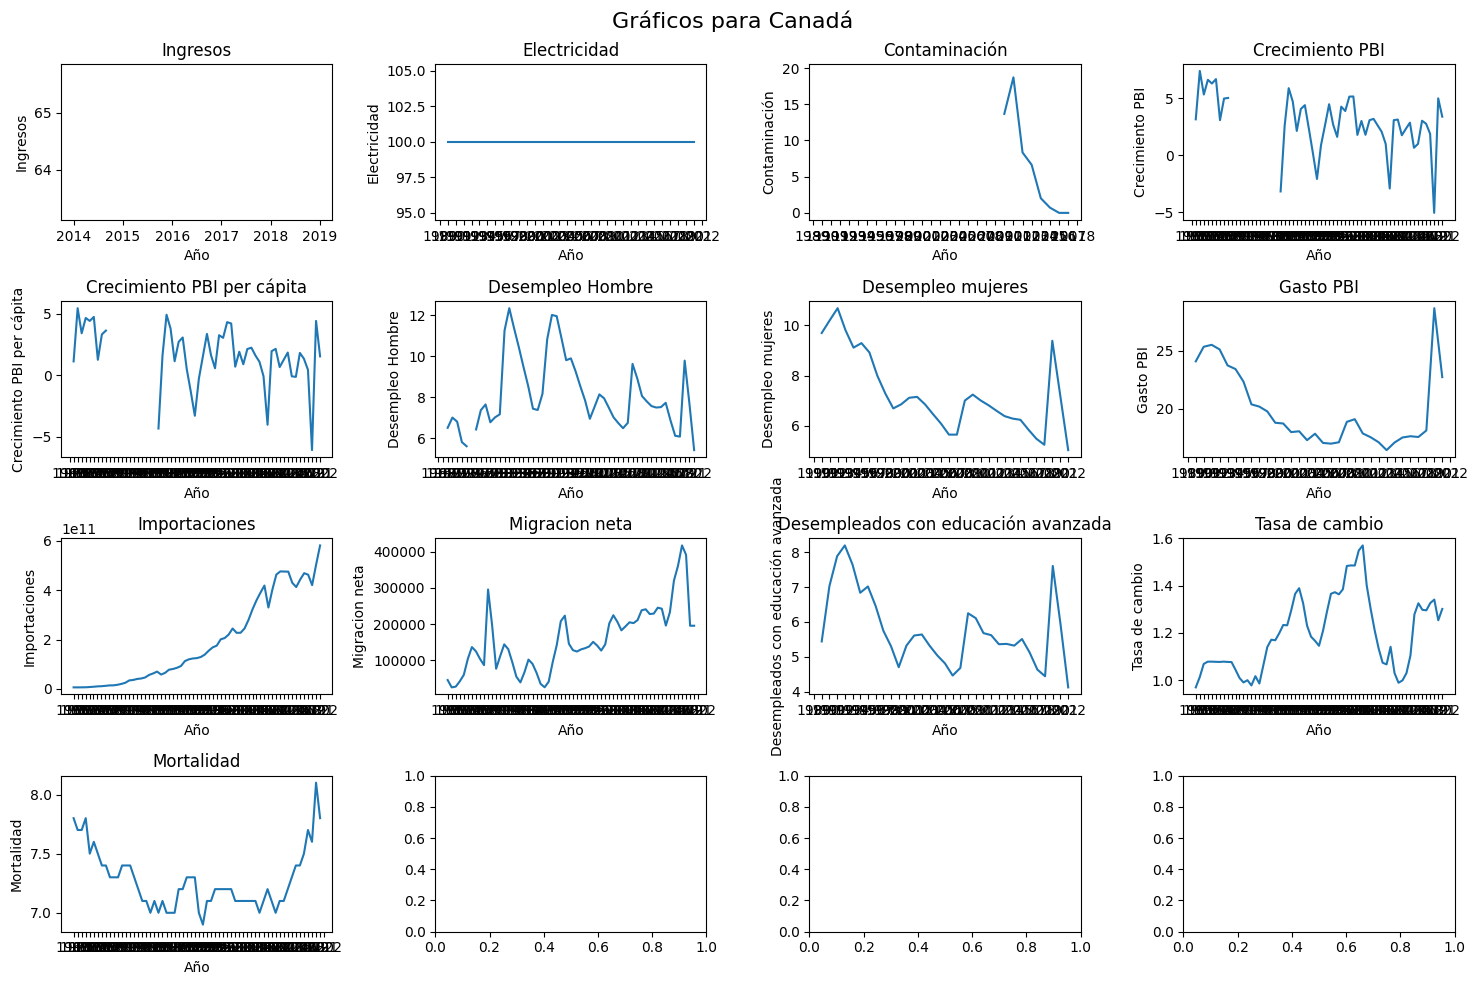

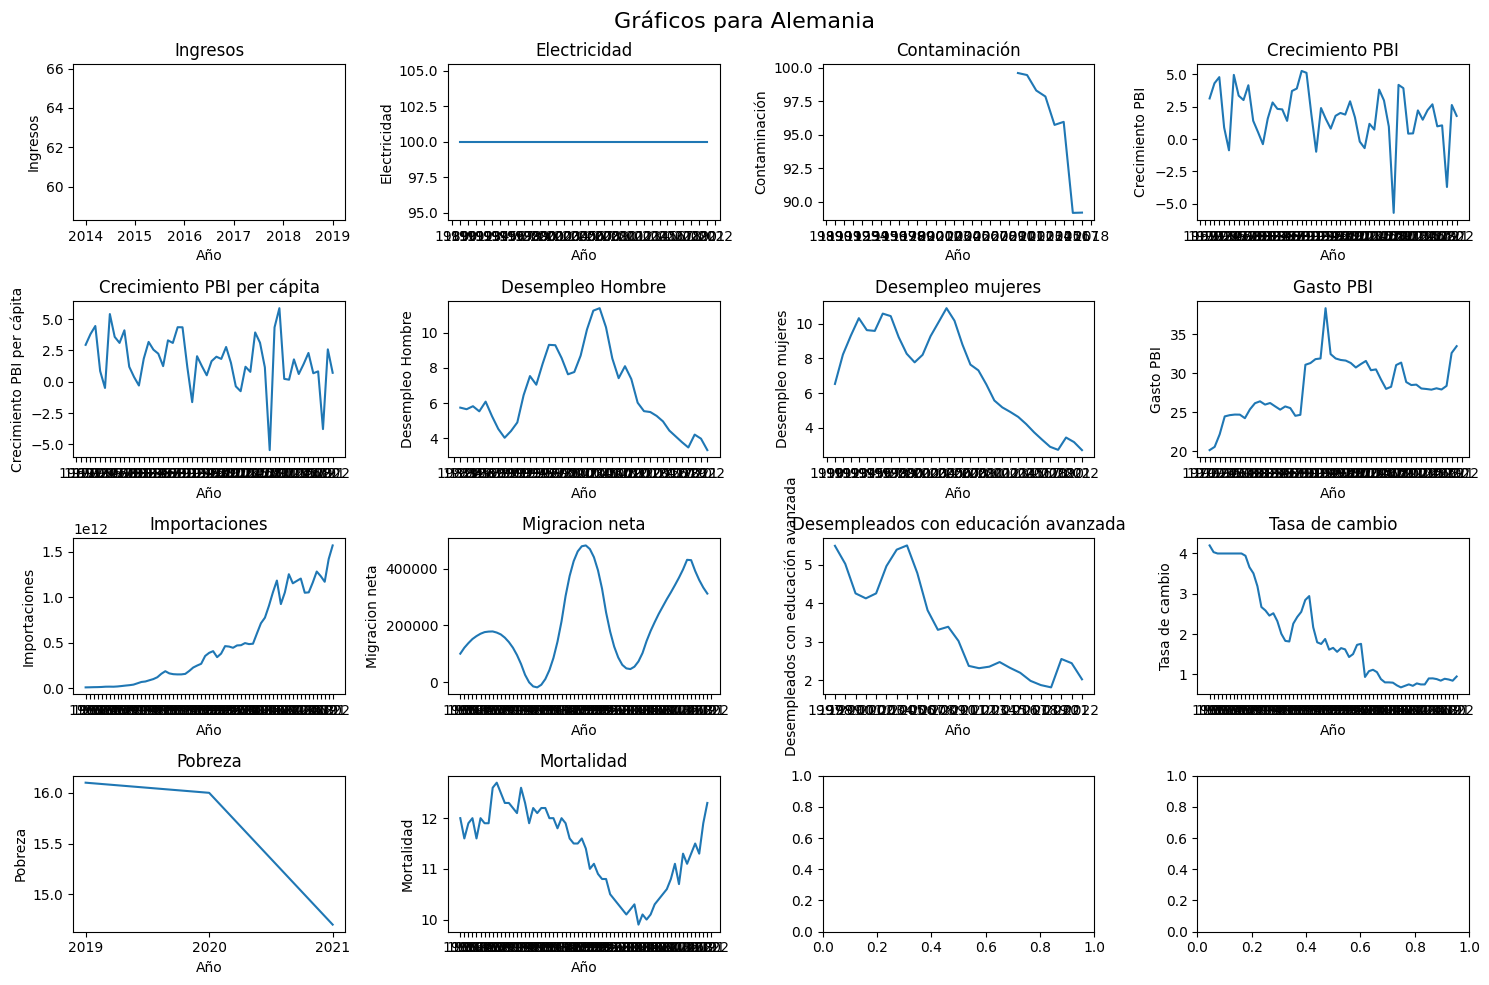

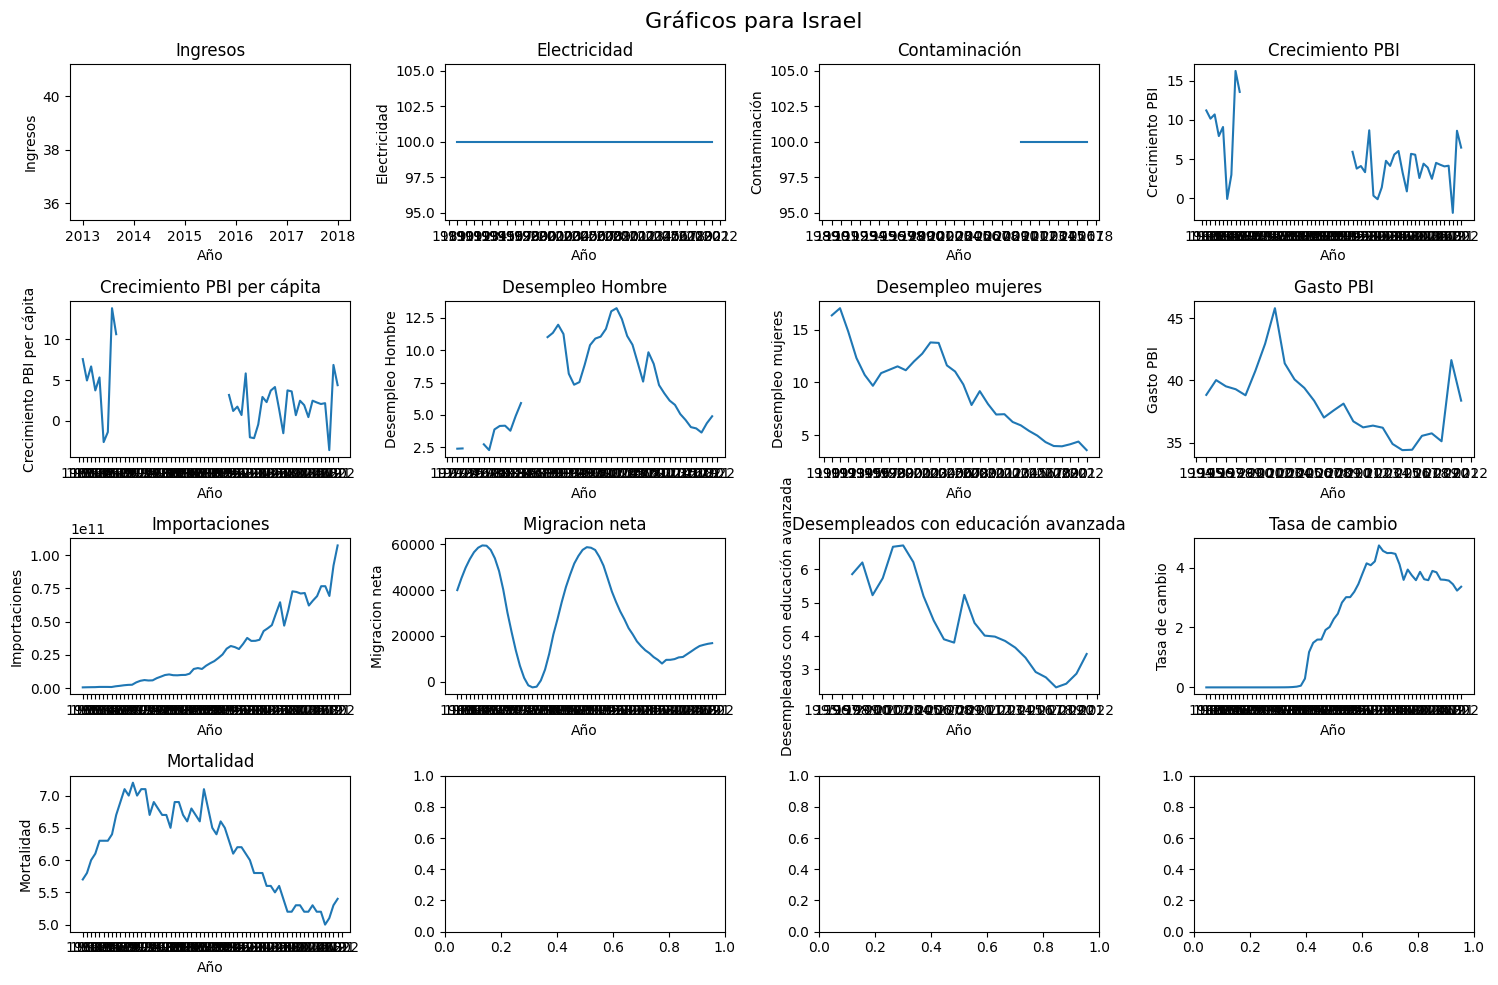

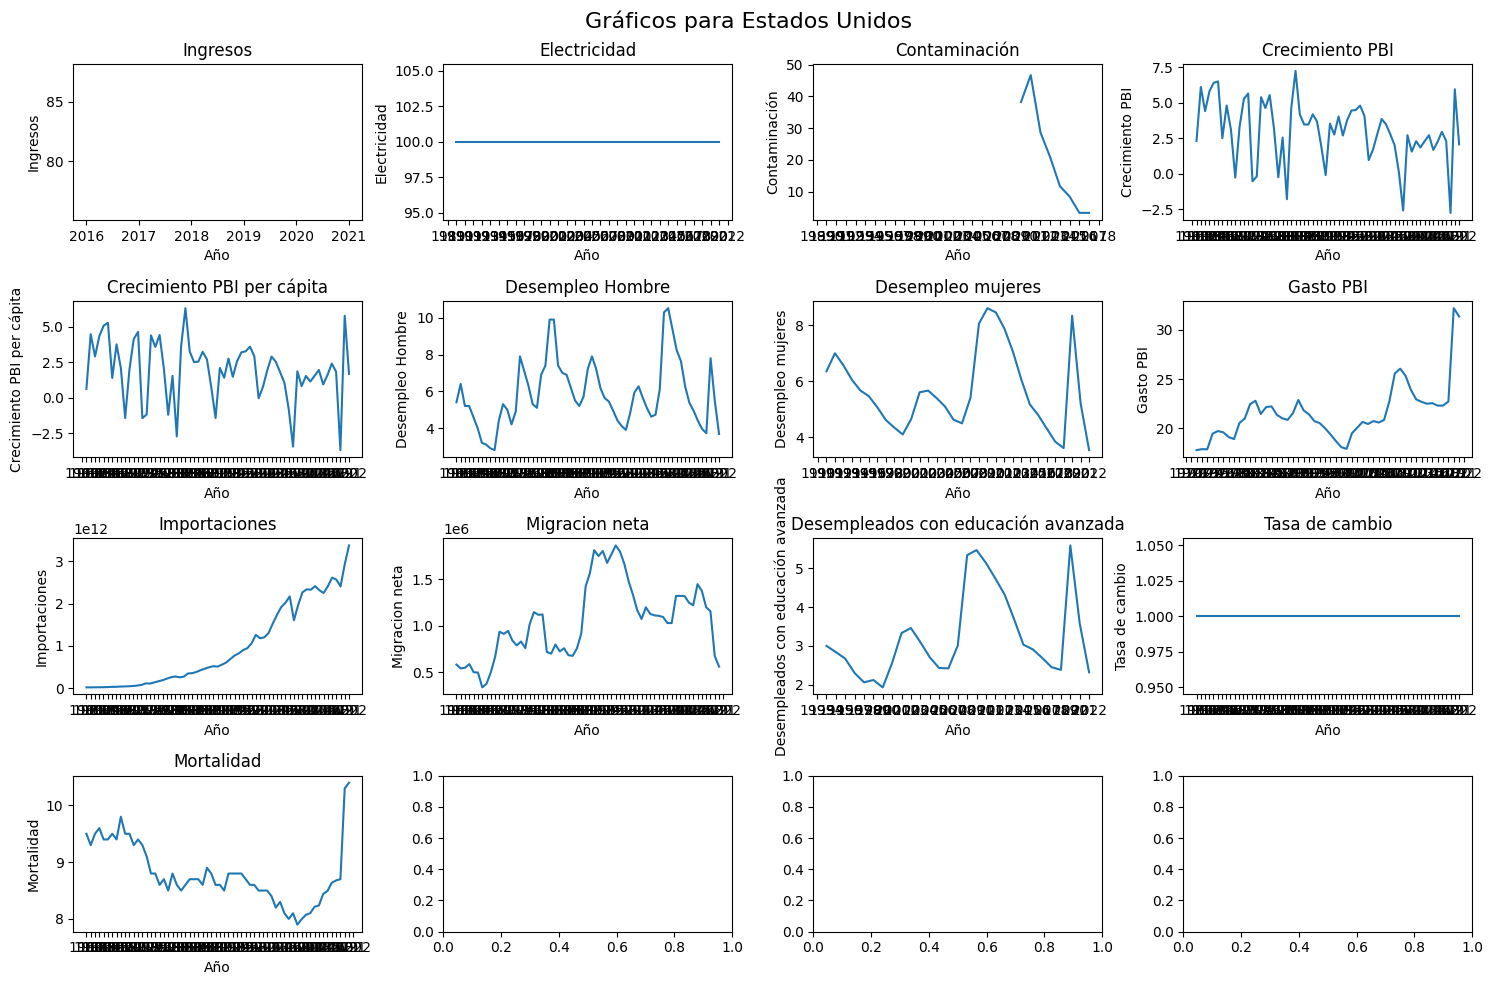

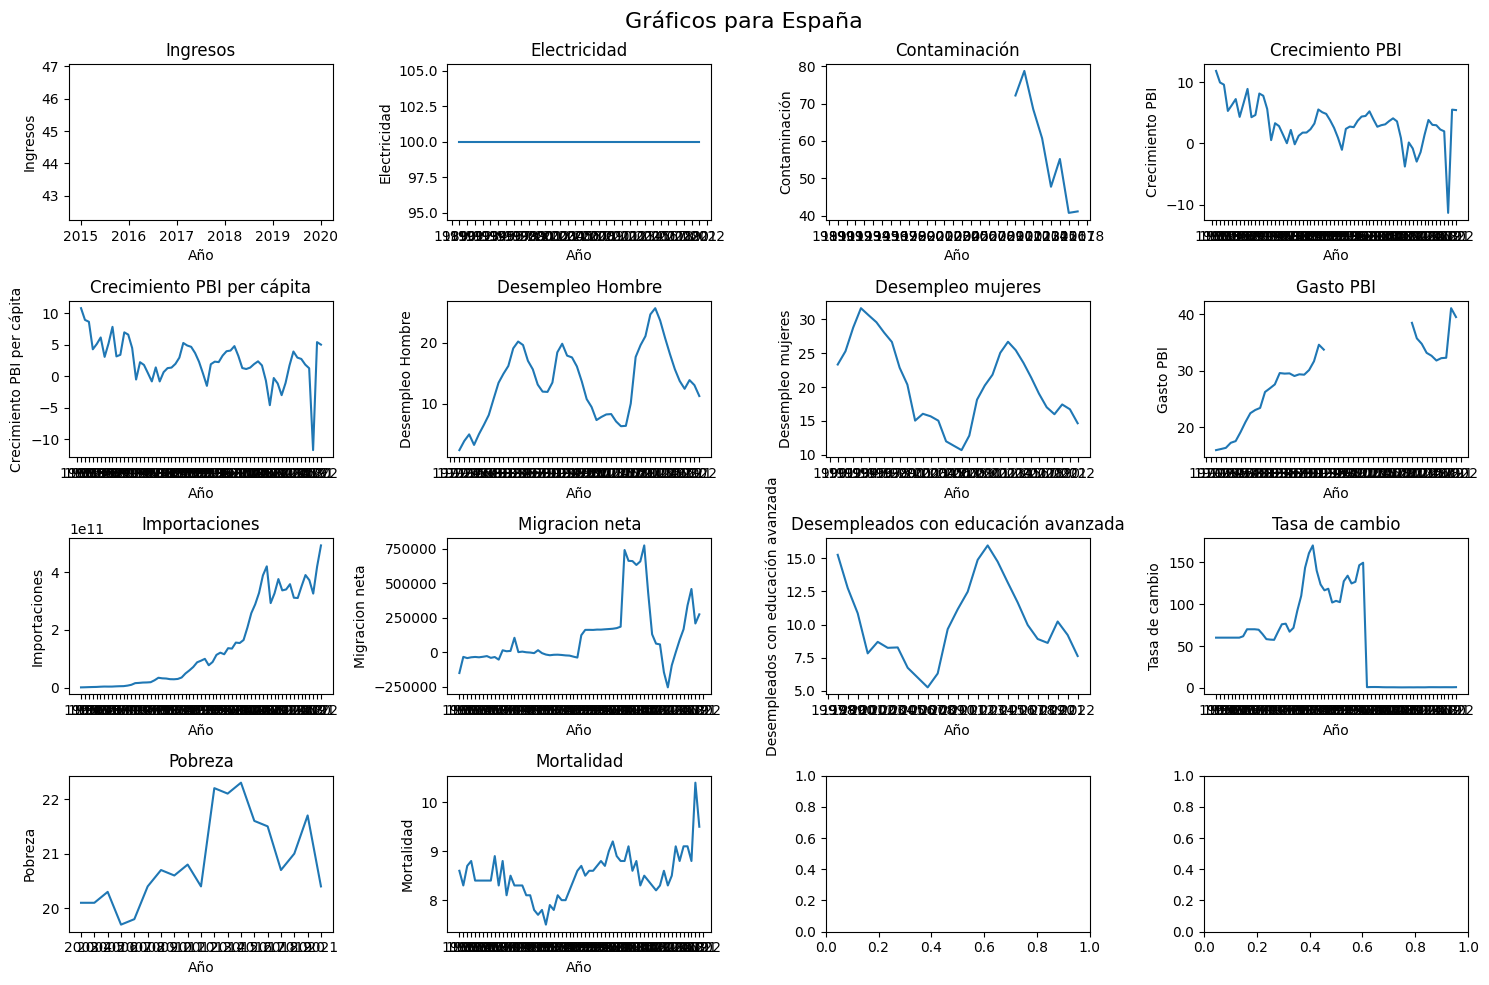

In [72]:
import matplotlib.pyplot as plt

# Suponiendo que ultimos_dfs es tu diccionario de DataFrames y cada DataFrame contiene datos de indicadores en el tiempo

# Iterar a través de cada DataFrame y crear un gráfico separado para cada columna
for key, df in ultimos_dfs.items():
    num_cols = 4
    num_rows = (len(df.columns) - 2) // num_cols + 1  # calcular el número de filas

    # Crear una figura y ejes para el gráfico
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
    fig.suptitle(f'Gráficos para {key}', fontsize=16)

    for i, column in enumerate(df.columns[2:]):
        row = i // num_cols
        col = i % num_cols

        # Graficar la columna actual contra la columna de años
        axes[row, col].plot(df['Year'], df[column])
        axes[row, col].set_title(column)
        axes[row, col].set_xlabel('Año')
        axes[row, col].set_ylabel(column)

    # Ajustar el espaciado entre subgráficos
    plt.tight_layout()
    plt.show()


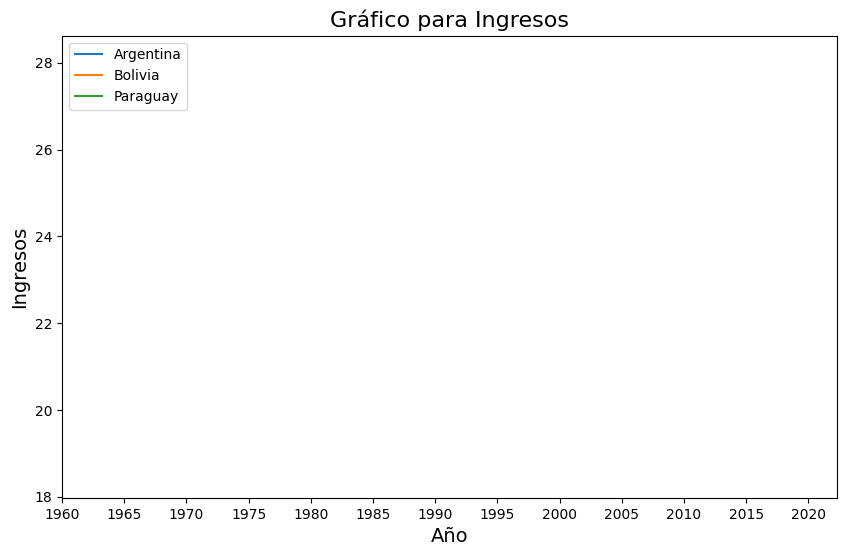

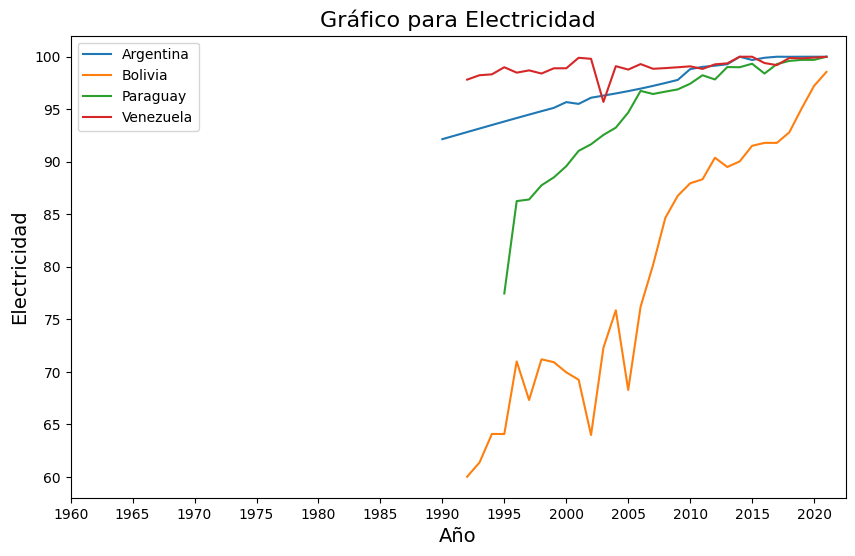

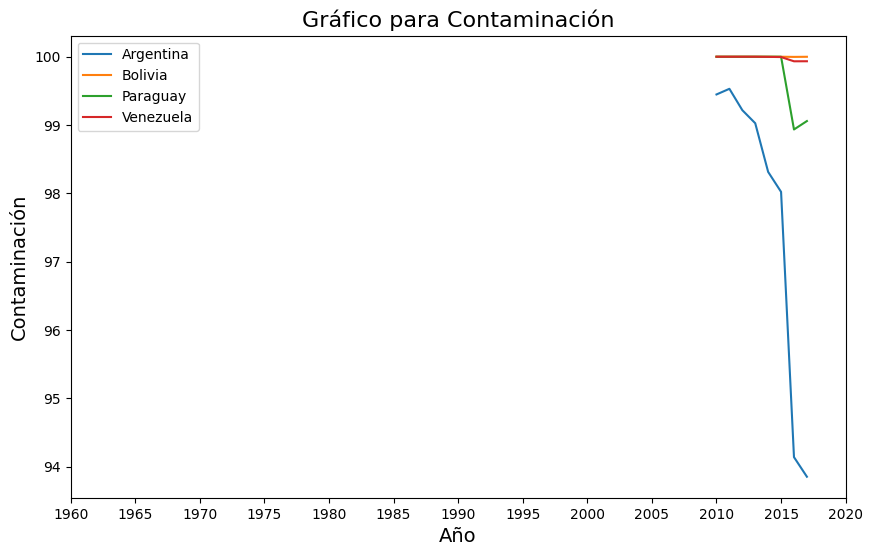

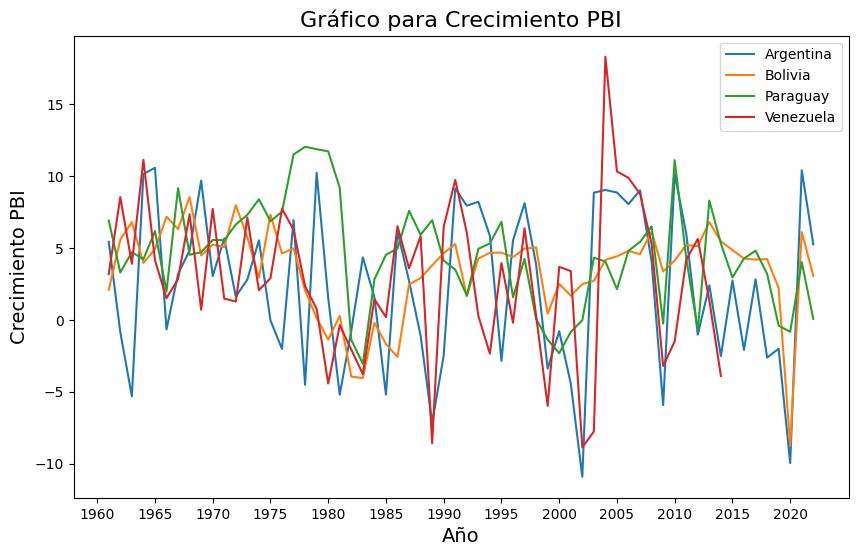

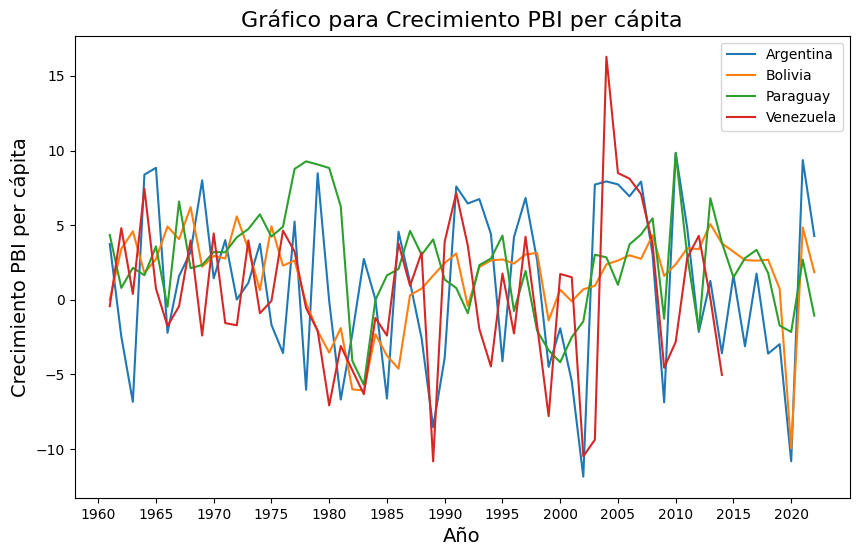

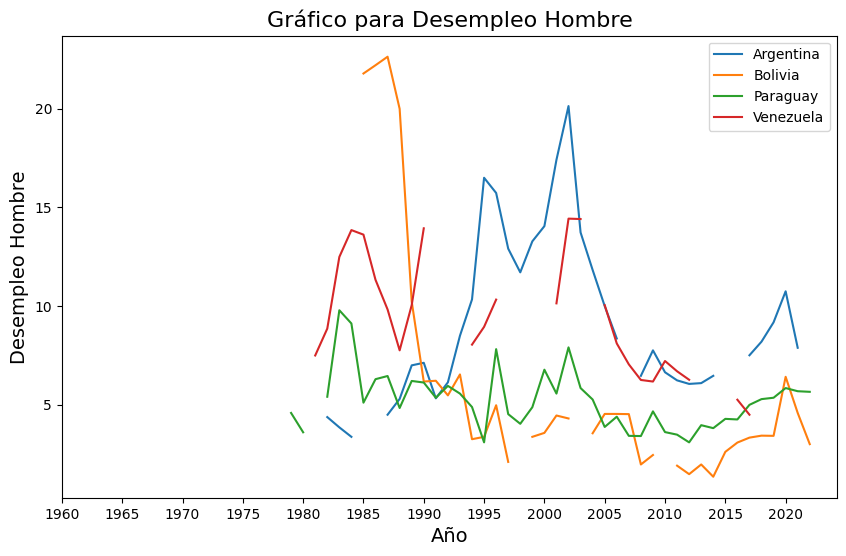

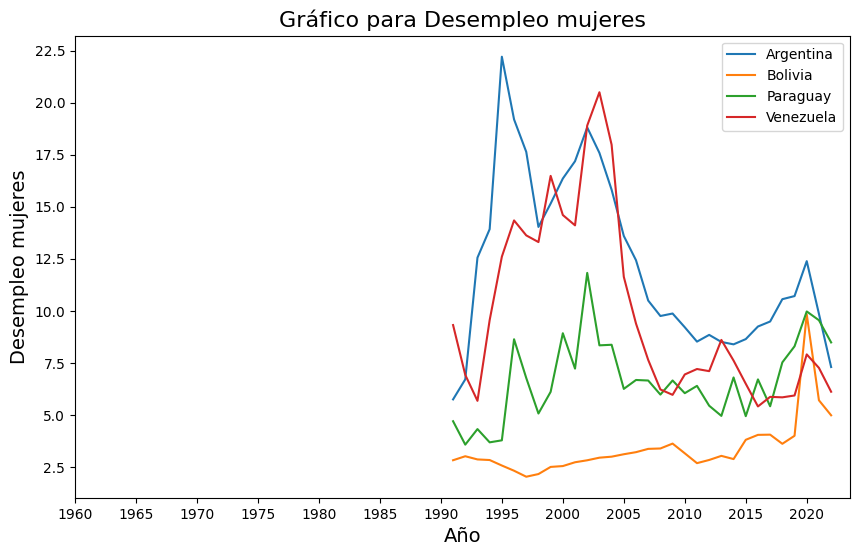

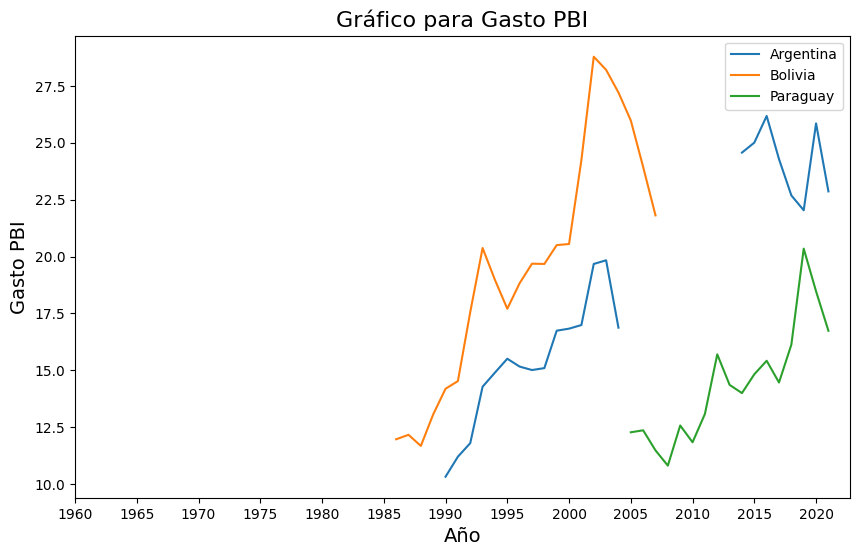

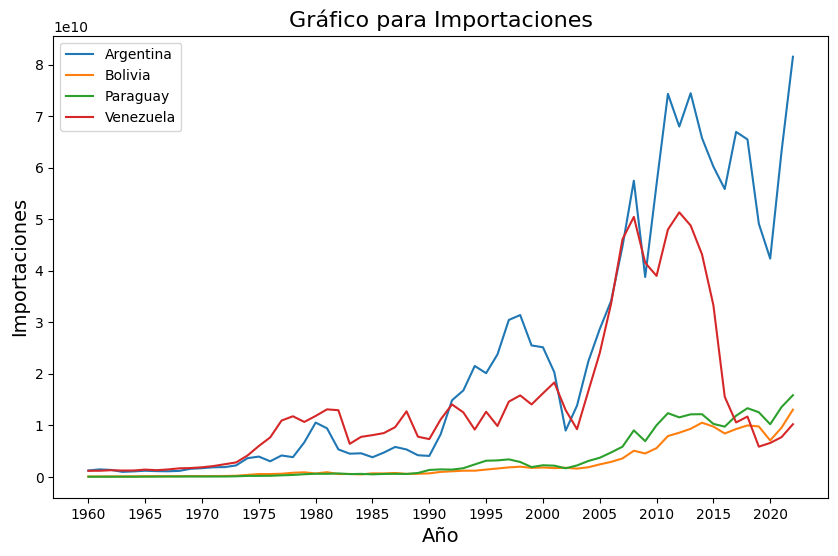

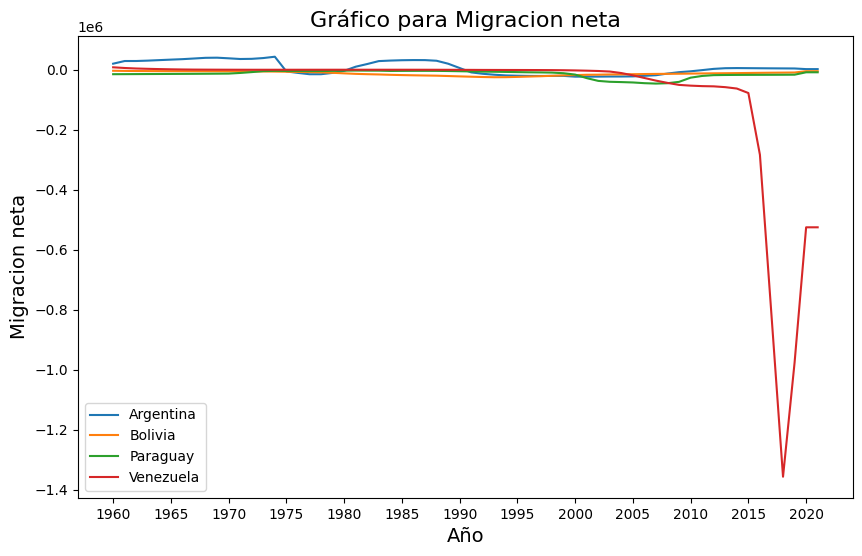

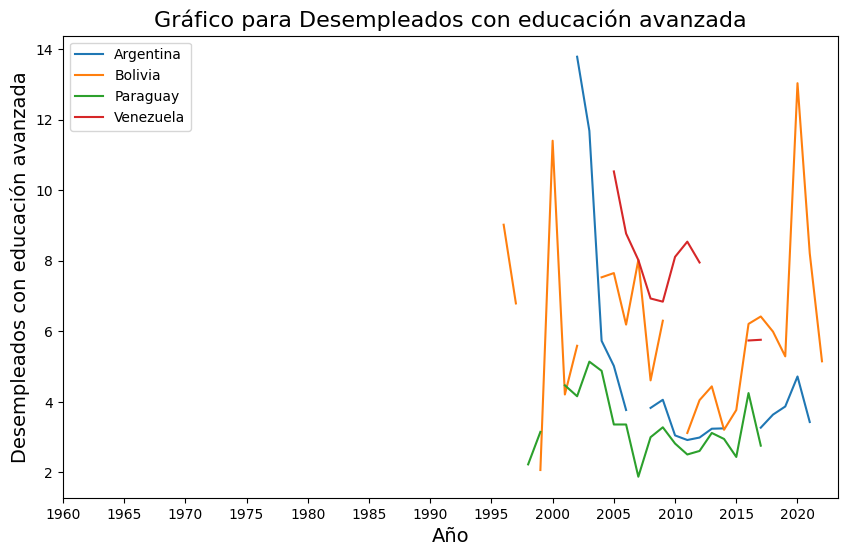

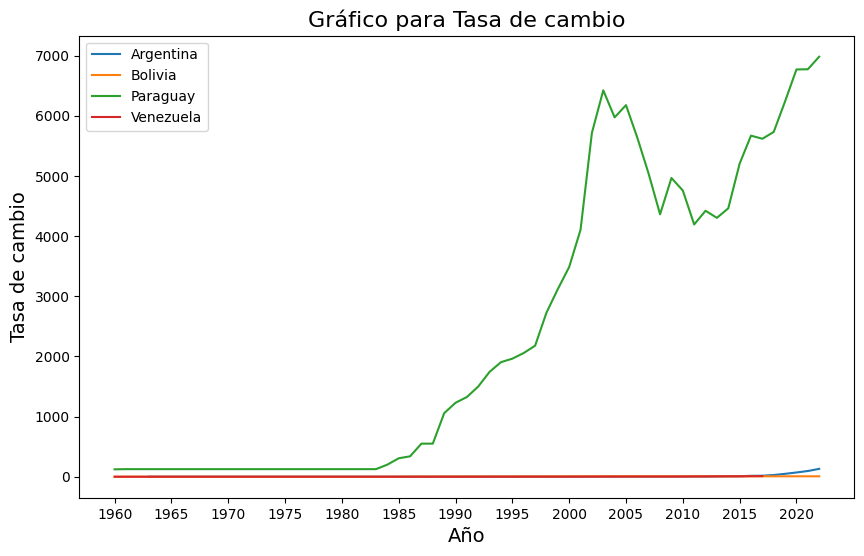

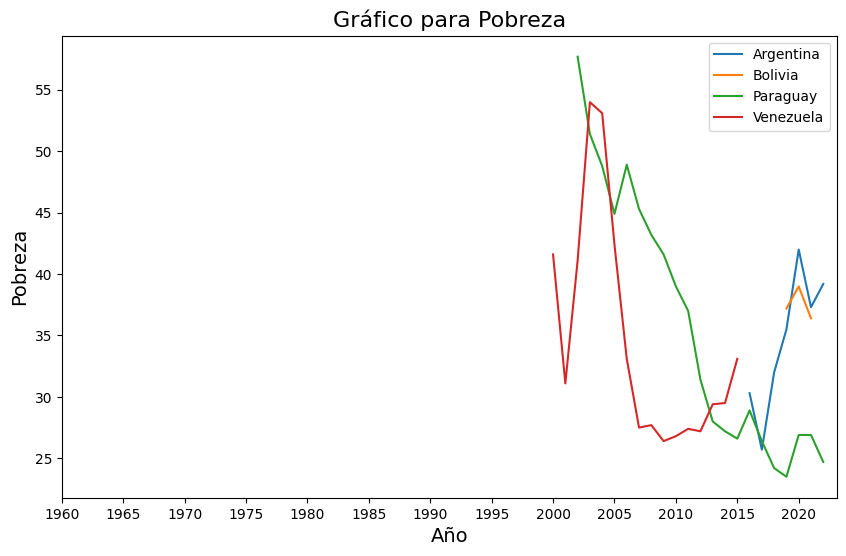

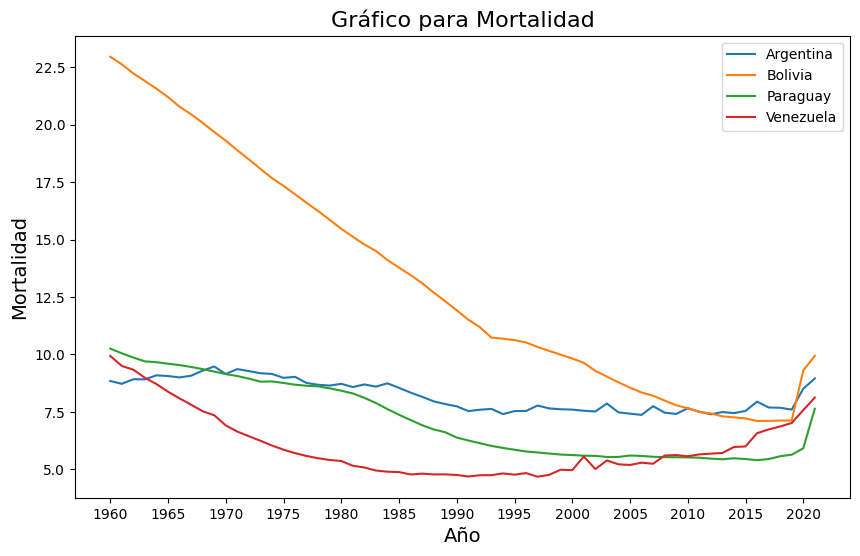

In [73]:
import matplotlib.pyplot as plt

# Lista de países de interés
paises_interes = ['Argentina', 'Paraguay', 'Bolivia', 'Venezuela']

# Seleccionar solo los dataframes correspondientes a los países de interés
dataframes_seleccionados = [df for pais, df in ultimos_dfs.items() if pais in paises_interes]

# Crear un gráfico para cada indicador
import numpy as np

import numpy as np

for columna in dataframes_seleccionados[0].columns[2:]:
    plt.figure(figsize=(10, 6))
    plt.title(f'Gráfico para {columna}', fontsize=16)
    for df in dataframes_seleccionados:
        if columna in df.columns:
            years = df['Year'].astype(int)
            plt.plot(years, df[columna], label=df['Pais'].iloc[0])
    plt.xlabel('Año', fontsize=14)
    plt.ylabel(columna, fontsize=14)
    plt.xticks(np.arange(min(years), max(years) + 1, 5))
    plt.legend()
    plt.show()






In [74]:
ultimos_dfs.keys()

dict_keys(['Argentina', 'Bolivia', 'Chile', 'Italia', 'Paraguay', 'Perú', 'Uruguay', 'Venezuela', 'Australia', 'Brasil', 'Canadá', 'Alemania', 'Israel', 'Estados Unidos', 'España'])

In [75]:
ultimos_dfs['Argentina'].Ingresos.isnull().sum()

61

### 2.1 Analisis de cantidad de nulos que poseen los indicadores seleccionadas para cada pais dentro del estudio. 

In [76]:

# Inicializar un diccionario para almacenar la cuenta de valores nulos por columna
null_counts = {}

# Iterar a través de cada DataFrame en ultimos_dfs y contar los valores nulos en cada columna
for key, df in ultimos_dfs.items():
    null_counts[key] = (df.isnull().sum()/63)*100
    #print(null_counts[key])
# Crear un DataFrame a partir del diccionario de conteos de valores nulos
null_counts_df = pd.DataFrame(null_counts)

# Transponer el DataFrame para que las filas sean las columnas de los DataFrames originales
null_counts_df = null_counts_df.T

# Imprimir el DataFrame resultante



In [77]:
dic_cambio_titulo = {
    "Electricidad": "%Nulos Electricidad",
    "Ingresos": "%Nulos Ingresos",
    "Contaminación": "%Nulos Contaminación",
    "Crecimiento PBI": "%Nulos Crecimiento PBI",
    "Crecimiento PBI per cápita": "%Nulos Crecimiento PBI per cápita",
    "Desempleo mujeres": "%Nulos Desempleo mujeres",
    "Desempleo Hombre": "%Nulos Desempleo hombres",
    "Gasto PBI": "%Nulos Gasto PBI",
    "Importaciones": "%Nulos Importaciones",
    "Migracion neta": "%Nulos Migracion neta",
    "Pais": "%Nulos Pais",
    "Desempleados con educación avanzada": "%Nulos Desempleados con educación avanzada",
    "Tasa de cambio": "%Nulos Tasa de cambio",
    "Pobreza": "%Nulos Pobreza",
    "Mortalidad": "%Nulos Mortalidad",
    "Año": "%Nulos Año"
}


In [78]:
null_counts_df = null_counts_df.rename(columns=dic_cambio_titulo)

#### Información de cantidad de nulos tiene cada indicador para los paises seleccionados en el periodo de 1960 a 2022: 

In [79]:
null_counts_df

%Nulos Contaminación  %Nulos Crecimiento PBI   
Argentina                  80.952381                1.587302  \
Bolivia                    80.952381                1.587302   
Chile                      80.952381                1.587302   
Italia                     80.952381                1.587302   
Paraguay                   80.952381                1.587302   
Perú                       80.952381                1.587302   
Uruguay                    80.952381                1.587302   
Venezuela                  80.952381               14.285714   
Australia                  80.952381                1.587302   
Brasil                     80.952381                1.587302   
Canadá                     80.952381               20.634921   
Alemania                   80.952381               17.460317   
Israel                     80.952381               42.857143   
Estados Unidos             80.952381                1.587302   
España                     80.952381                1.587302   

                %Nulos Crecimiento PBI per cápita   
Argentina                                1.587302  \
Bolivia                                  1.587302   
Chile                                    1.587302   
Italia                                   1.587302   
Paraguay                                 1.587302   
Perú                                     1.587302   
Uruguay                                  1.587302   
Venezuela                               14.285714   
Australia                                1.587302   
Brasil                                   1.587302   
Canadá                                  20.634921   
Alemania                                17.460317   
Israel                                  42.857143   
Estados Unidos                           1.587302   
España                                   1.587302   

                %Nulos Desempleados con educación avanzada   
Argentina                                        73.015873  \
Bolivia                                          61.904762   
Chile                                            69.841270   
Italia                                           60.317460   
Paraguay                                         69.841270   
Perú                                             57.142857   
Uruguay                                          63.492063   
Venezuela                                        84.126984   
Australia                                        60.317460   
Brasil                                           58.730159   
Canadá                                           47.619048   
Alemania                                         60.317460   
Israel                                           60.317460   
Estados Unidos                                   53.968254   
España                                           60.317460   

                %Nulos Desempleo hombres  %Nulos Desempleo mujeres   
Argentina                      44.444444                 49.206349  \
Bolivia                        44.444444                 49.206349   
Chile                          28.571429                 49.206349   
Italia                         17.460317                 49.206349   
Paraguay                       31.746032                 49.206349   
Perú                           47.619048                 49.206349   
Uruguay                        34.920635                 49.206349   
Venezuela                      53.968254                 49.206349   
Australia                      30.158730                 49.206349   
Brasil                         33.333333                 49.206349   
Canadá                         17.460317                 49.206349   
Alemania                       36.507937                 49.206349   
Israel                         31.746032                 49.206349   
Estados Unidos                  0.000000                 49.206349   
España                         20.634921                 49.206349   

                %Nulos Elect

Genero un diccionario para acortar los nombres de los indicadores en los gráficos

Se desarrolla un gráfico de barras para determinar como se distribuyen los nulos de acuerdo a cada indicador

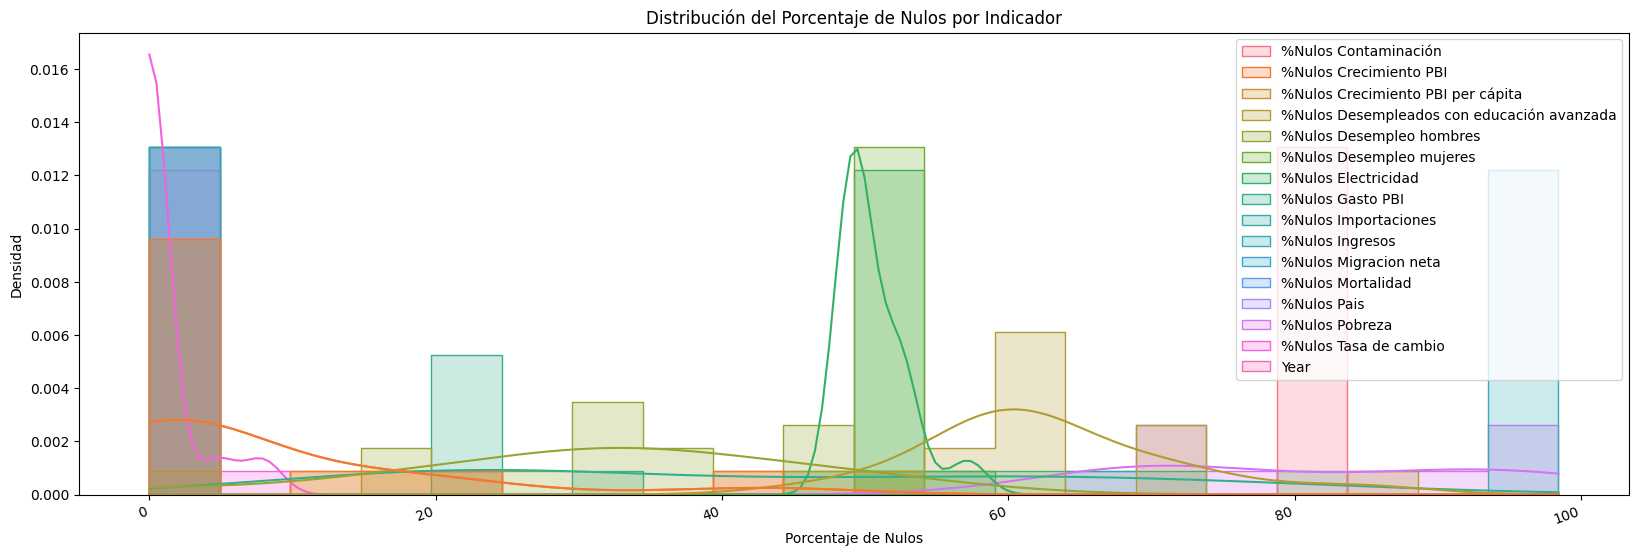

In [80]:
plt.figure(figsize=(20, 6))
sns.histplot(data=null_counts_df, bins=20, kde=True, element="step", stat="density")
plt.title('Distribución del Porcentaje de Nulos por Indicador')
plt.xlabel('Porcentaje de Nulos')
plt.ylabel('Densidad')
plt.xticks(rotation=20, ha='right')
plt.show()


## 5. Análisis de correlación entre indicadores y migracion neta

In [81]:
merged_df_modelo.columns

Index(['Country Code', 'Year', 'Ingresos', 'Electricidad', 'Contaminación',
       'Crecimiento PBI', 'Crecimiento PBI per cápita', 'Desempleo Hombre',
       'Desempleo mujeres', 'Gasto PBI', 'Importaciones', 'Migracion neta',
       'Desempleados con educación avanzada', 'Tasa de cambio', 'Pobreza',
       'Mortalidad'],
      dtype='object')

In [82]:
merged_df_modelo.head(5)

Country Code  Year  Ingresos  Electricidad  Contaminación  Crecimiento PBI   
0          ABW  1960       NaN           NaN            NaN              NaN  \
1          AFE  1960       NaN           NaN            NaN              NaN   
2          AFG  1960       NaN           NaN            NaN              NaN   
3          AFW  1960       NaN           NaN            NaN              NaN   
4          AGO  1960       NaN           NaN            NaN              NaN   

   Crecimiento PBI per cápita  Desempleo Hombre  Desempleo mujeres  Gasto PBI   
0                         NaN               NaN                NaN        NaN  \
1                         NaN               NaN                NaN        NaN   
2                         NaN               NaN                NaN        NaN   
3                         NaN               NaN                NaN        NaN   
4                         NaN               NaN                NaN        NaN   

   Importaciones  Migracion neta  Desempleados con educación avanzada   
0            NaN             0.0                                  NaN  \
1   3.757511e+09        -90849.0                                  NaN   
2   8.700000e+07          2606.0                                  NaN   
3   1.880000e+09          -847.0                                  NaN   
4   1.280000e+08        -43749.0                                  NaN   

   Tasa de cambio  Pobreza  Mortalidad  
0             NaN      NaN    6.594000  
1             NaN      NaN   20.918108  
2    1.719656e+01      NaN   31.921000  
3             NaN      NaN   26.363067  
4    2.866844e-08      NaN   26.659000

In [83]:
merged_df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16758 entries, 0 to 16757
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country Code                         16758 non-null  object 
 1   Year                                 16758 non-null  int32  
 2   Ingresos                             244 non-null    float64
 3   Electricidad                         7348 non-null   float64
 4   Contaminación                        2904 non-null   float64
 5   Crecimiento PBI                      12731 non-null  float64
 6   Crecimiento PBI per cápita           12730 non-null  float64
 7   Desempleo Hombre                     4797 non-null   float64
 8   Desempleo mujeres                    7512 non-null   float64
 9   Gasto PBI                            4733 non-null   float64
 10  Importaciones                        14124 non-null  float64
 11  Migracion neta              

In [84]:
merged_df_modelo['Country Code'] = pd.to_numeric(merged_df_modelo['Country Code'], errors='coerce').astype(float)

merged_df_modelo_corr = merged_df_modelo.corr()


<Axes: >

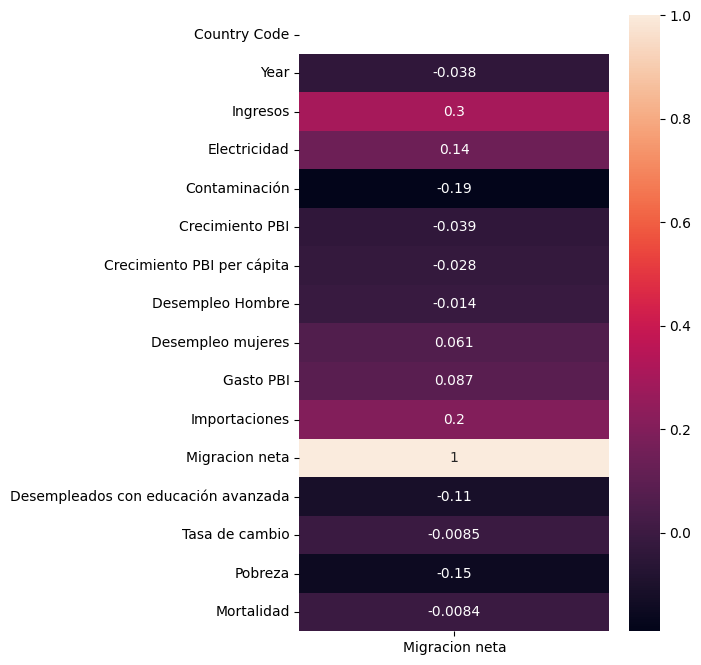

In [85]:
plt.figure(figsize=(5,8))
sns.heatmap(merged_df_modelo_corr[['Migracion neta']], annot=True)

In [86]:
años=[1990,1995,2000,2005,2010,2015,2020]

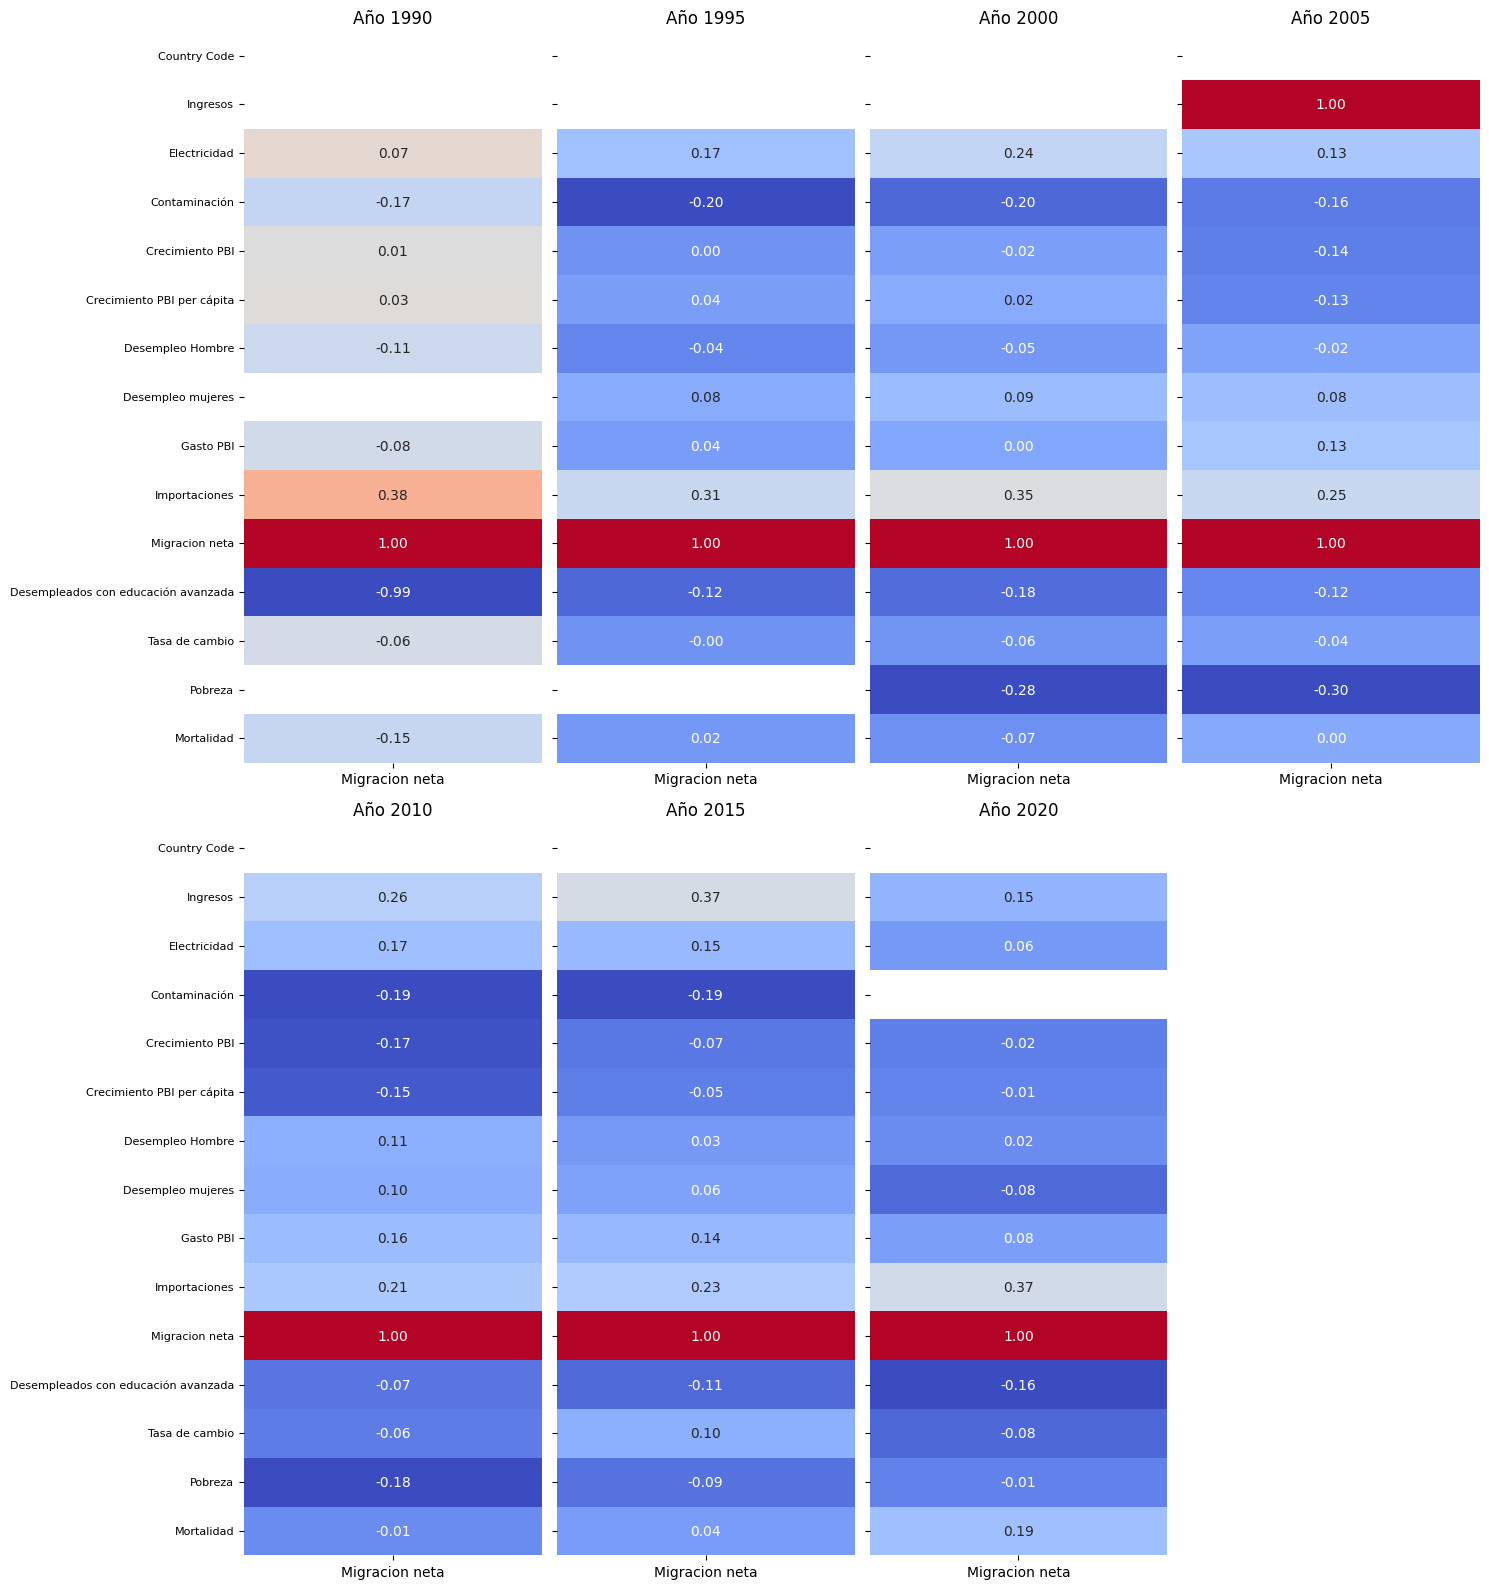

In [87]:
# Lista de años a filtrar
años = [1990, 1995, 2000, 2005, 2010, 2015, 2020]

# Calcular el número de filas y columnas para subplots
num_años = len(años)
columnas = 4  # Tres gráficos por fila
filas = -(-num_años // columnas)  # Redondeo hacia arriba de la división

# Crear subplots
fig, axs = plt.subplots(filas, columnas, figsize=(15, 8 * filas), sharey=True)

# Aplanar el array de subplots para facilitar el índice
axs = axs.flatten()

# Filtrar el DataFrame para cada año y crear un multiplot de heatmaps
for i, año in enumerate(años):
    df_año = merged_df_modelo[merged_df_modelo['Year'] == año]
    
    # Eliminar la columna 'Year' ya que estamos filtrando por año
    df_año = df_año.drop('Year', axis=1)
    
    # Calcular la matriz de correlación
    corr_matrix = df_año.corr()
    
    # Crear un heatmap y colocarlo en el subplot correspondiente
    sns.heatmap(corr_matrix[['Migracion neta']], annot=True, cmap='coolwarm', fmt='.2f', ax=axs[i], cbar=False)
    
    # Configuración del título
    axs[i].set_title(f'Año {año}')
    
    # Ajustar el tamaño de las etiquetas del eje Y para mostrar todas las variables
    axs[i].tick_params(axis='y', labelrotation=0, labelsize=8)

# Eliminar subplots no utilizados si hay menos de filas * columnas años
for j in range(num_años, filas * columnas):
    fig.delaxes(axs[j])

# Ajustar el diseño de los subplots
plt.tight_layout()
plt.show()




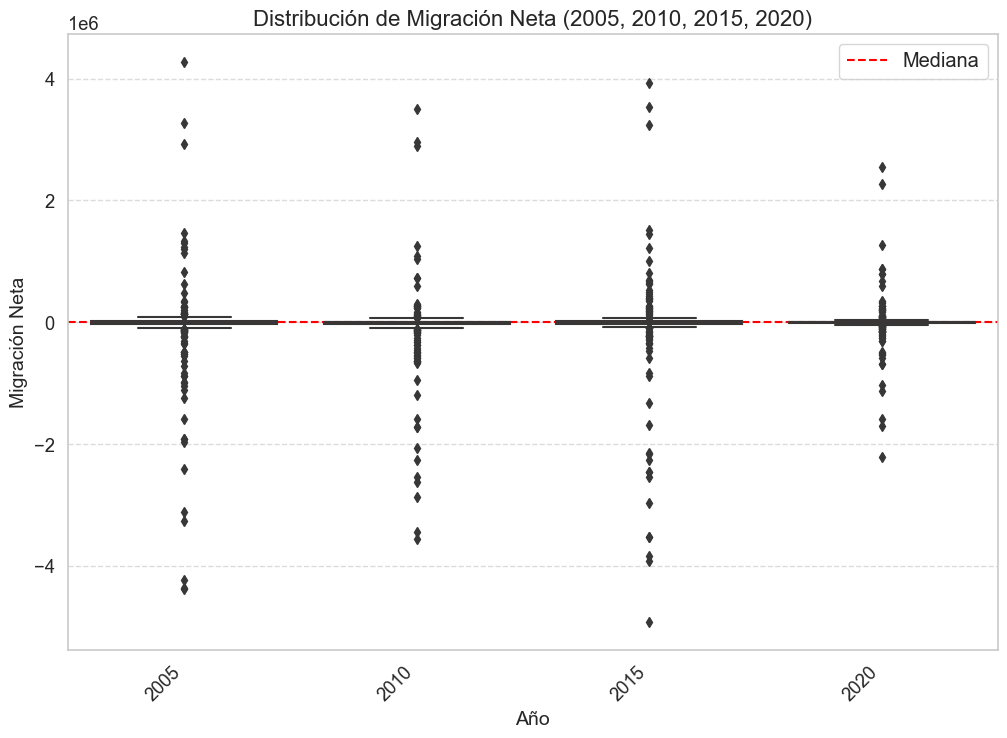

In [88]:
años_interes = [2005, 2010, 2015, 2020]
merged_df_modelo_filtrado = merged_df_modelo[merged_df_modelo['Year'].isin(años_interes)]

sns.set(style="whitegrid", font_scale=1.2)

plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='Migracion neta', data=merged_df_modelo_filtrado, palette='viridis')

plt.title('Distribución de Migración Neta (2005, 2010, 2015, 2020)', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Migración Neta', fontsize=14)

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45, ha='right')

# Añadir línea horizontal para destacar la mediana u otro punto de referencia
median_value = merged_df_modelo_filtrado['Migracion neta'].median()
plt.axhline(y=median_value, color='red', linestyle='--', label='Mediana')

plt.legend(loc='upper right', fontsize='medium')

# Añadir grid para mejorar la lectura del gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



## 6. Análisis de correlación y crecimiento del PBI con las diferentes variables y paises

ESTADÍSTICAS DESCRIPTIVAS

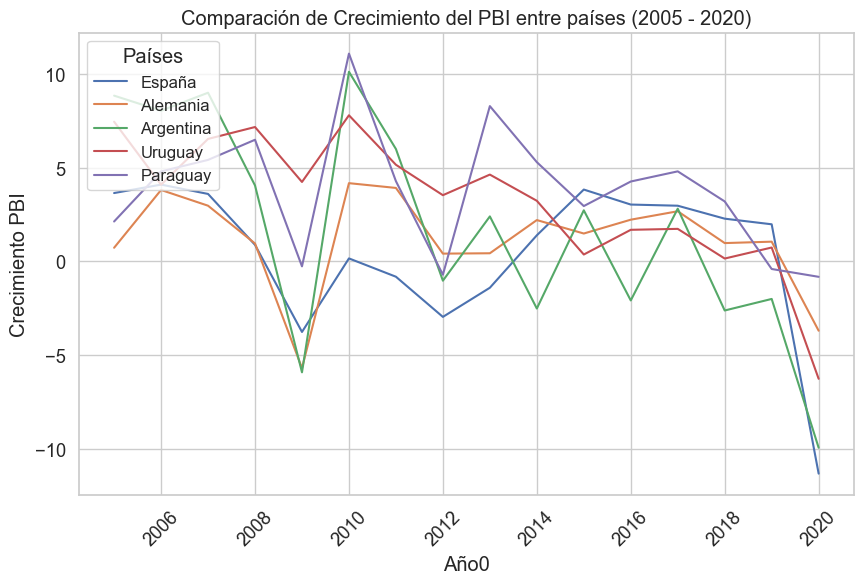

In [92]:
paises = ['España', 'Alemania', 'Argentina', 'Uruguay', 'Paraguay']
year_start = 2005
year_end = 2020

plt.figure(figsize=(10, 6))

for pais in paises:
    datos = ultimos_dfs[pais]
    datos['Year'] = datos['Year'].astype(int)
    datos_filtrados = datos[(datos['Year'] >= year_start) & (datos['Year'] <= year_end)]
    plt.plot(datos_filtrados['Year'], datos_filtrados['Crecimiento PBI'], label=pais)
    
plt.xlabel('Año0')
plt.ylabel('Crecimiento PBI')
plt.legend(loc= 'upper left', title= 'Países', fontsize= 'small')
plt.title('Comparación de Crecimiento del PBI entre países (2005 - 2020)')
plt.grid(True)

plt.xticks(rotation= 45)
plt.show()

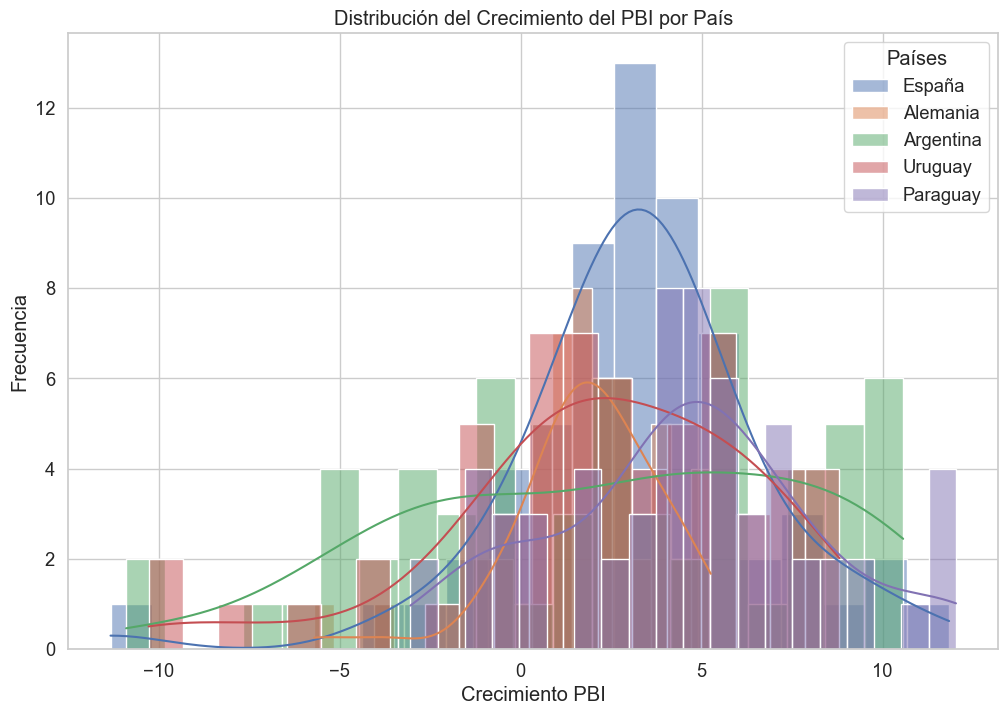

In [93]:
plt.figure(figsize=(12, 8))
for pais in paises:
    datos = ultimos_dfs[pais]
    sns.histplot(datos['Crecimiento PBI'], bins=20, kde=True, label=pais, alpha=0.5)

plt.xlabel('Crecimiento PBI')
plt.ylabel('Frecuencia')
plt.legend(title='Países')
plt.title('Distribución del Crecimiento del PBI por País')
plt.show()


In [94]:
for pais in paises:
    datos = ultimos_dfs[pais]
    crecimiento_stats = datos['Crecimiento PBI'].describe()
    print(f"Estadísticas para {pais}:\n{crecimiento_stats}\n")

Estadísticas para España:
count    62.000000
mean      3.224277
std       3.493130
min     -11.325438
25%       1.773759
50%       3.188028
75%       5.027501
max      11.838674
Name: Crecimiento PBI, dtype: float64

Estadísticas para Alemania:
count    52.000000
mean      1.865028
std       2.053185
min      -5.693836
25%       0.942427
50%       1.905169
75%       3.039545
max       5.255006
Name: Crecimiento PBI, dtype: float64

Estadísticas para Argentina:
count    62.000000
mean      2.394950
std       5.514967
min     -10.894485
25%      -2.013904
50%       2.815129
75%       6.738955
max      10.569433
Name: Crecimiento PBI, dtype: float64

Estadísticas para Uruguay:
count    62.000000
mean      2.226343
std       4.199888
min     -10.274399
25%       0.280737
50%       2.466779
75%       5.247952
max       8.809808
Name: Crecimiento PBI, dtype: float64

Estadísticas para Paraguay:
count    62.000000
mean      4.501683
std       3.614512
min      -3.042618
25%       2.304268
50%

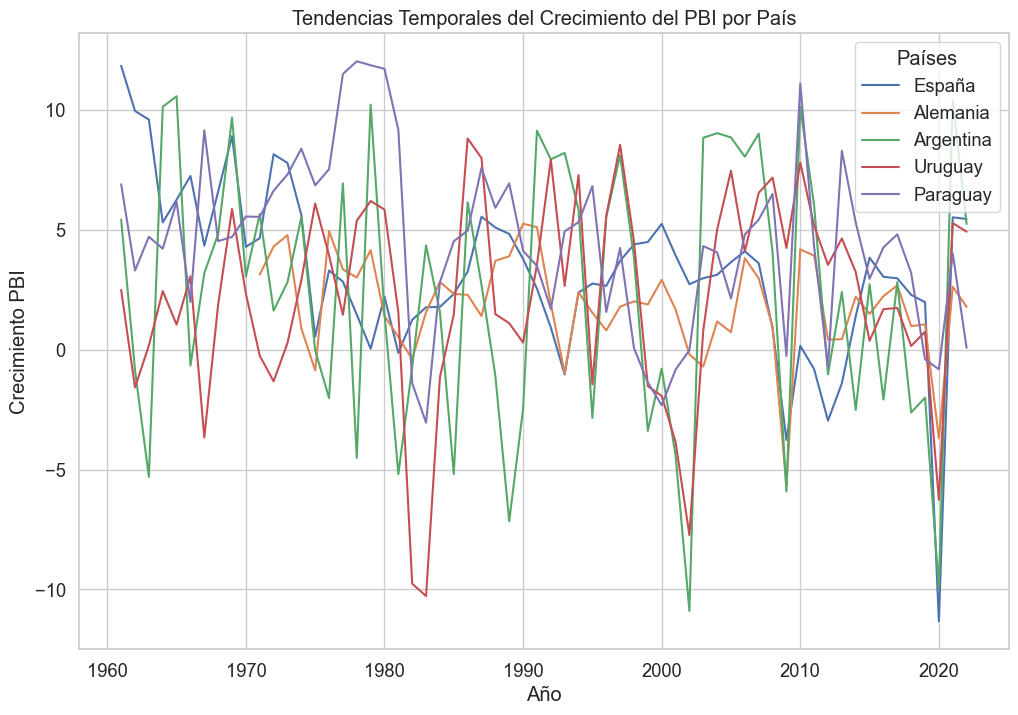

In [95]:
plt.figure(figsize=(12, 8))
for pais in paises:
    datos = ultimos_dfs[pais]
    plt.plot(datos['Year'], datos['Crecimiento PBI'], label=pais)

plt.xlabel('Año')
plt.ylabel('Crecimiento PBI')
plt.legend(title='Países')
plt.title('Tendencias Temporales del Crecimiento del PBI por País')
plt.show()


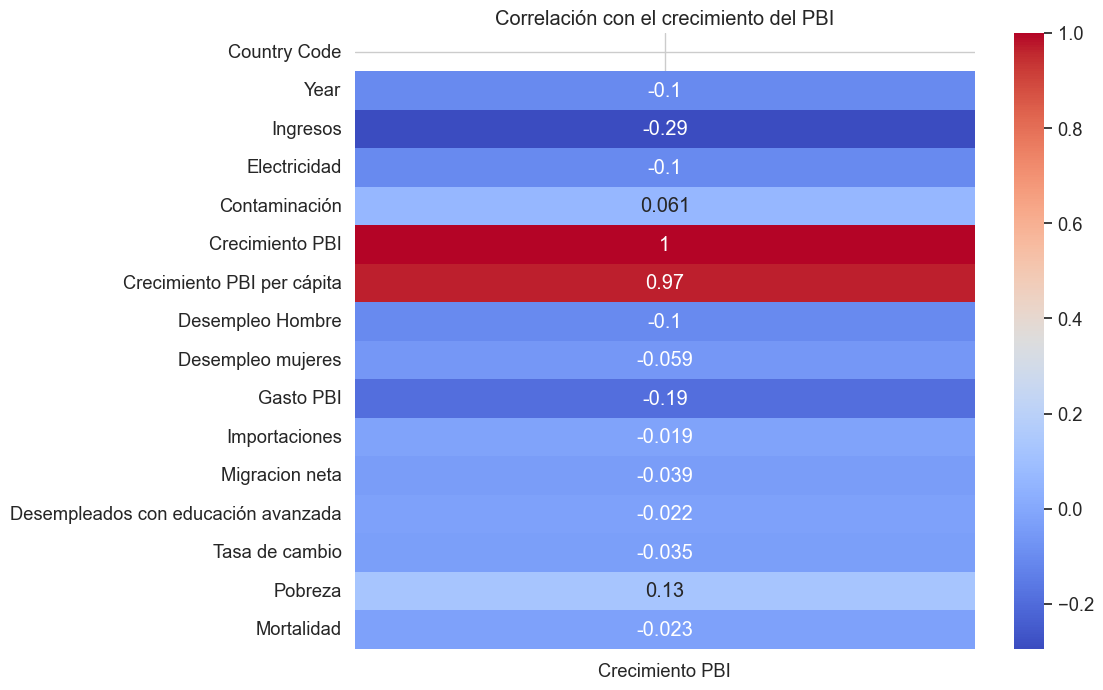

In [96]:
corr_matrix_pbi = merged_df_modelo_corr
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_pbi[['Crecimiento PBI']], annot=True, cmap='coolwarm')
plt.title('Correlación con el crecimiento del PBI')
plt.show()

## 7. Analisis de correlacion entre indicadores y stock migrantes (naciones unidas)

## uniones para conectar indicadores con stock de migrantes para el dataset por pais de origen y de destino

In [97]:
Stock_migrantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83657 entries, 0 to 83656
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Destination                   83657 non-null  object 
 1   Notes of destination          11256 non-null  float64
 2   Location code of destination  83657 non-null  object 
 3   ISO3_dest                     83657 non-null  object 
 4   Type of data of destination   83657 non-null  object 
 5   Origin                        83657 non-null  object 
 6   Location code of origin       83657 non-null  object 
 7   ISO3_origin                   83657 non-null  object 
 8   Year                          83657 non-null  object 
 9   Migrant stock                 83657 non-null  int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 6.4+ MB


In [98]:
merged_df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16758 entries, 0 to 16757
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country Code                         0 non-null      float64
 1   Year                                 16758 non-null  int32  
 2   Ingresos                             244 non-null    float64
 3   Electricidad                         7348 non-null   float64
 4   Contaminación                        2904 non-null   float64
 5   Crecimiento PBI                      12731 non-null  float64
 6   Crecimiento PBI per cápita           12730 non-null  float64
 7   Desempleo Hombre                     4797 non-null   float64
 8   Desempleo mujeres                    7512 non-null   float64
 9   Gasto PBI                            4733 non-null   float64
 10  Importaciones                        14124 non-null  float64
 11  Migracion neta              

In [99]:
Stock_migrantes['Year']=Stock_migrantes['Year'].astype(int)
Stock_migrantes['ISO3_dest']=Stock_migrantes['ISO3_dest'].astype(str)
Stock_migrantes['ISO3_origin']=Stock_migrantes['ISO3_origin'].astype(str)

In [100]:
merged_df_modelo['Year']=merged_df_modelo['Year'].astype(int)
merged_df_modelo['Country Code']=merged_df_modelo['Country Code'].astype(str)

In [101]:
# Primera unión con las claves (left Country Code rigth ISO3_origin, Year)
merged_df_modelo_stock1 = pd.merge(Stock_migrantes, merged_df_modelo, left_on=['ISO3_origin', 'Year'], right_on=['Country Code', 'Year'], how='left')

# Segunda unión con las claves (Year, left Country Code, rigth ISO3_dest)
final_merged_df = pd.merge(merged_df_modelo_stock1, merged_df_modelo, left_on=['Year', 'ISO3_dest'], right_on=['Year', 'Country Code'], suffixes=('_origin', '_dest'), how='left')


In [102]:
final_merged_df

Destination  Notes of destination   
0                         Burundi                   NaN  \
1                         Burundi                   NaN   
2                         Burundi                   NaN   
3                         Burundi                   NaN   
4                         Burundi                   NaN   
...                           ...                   ...   
83652  Wallis and Futuna Islands*                  41.0   
83653  Wallis and Futuna Islands*                  41.0   
83654  Wallis and Futuna Islands*                  41.0   
83655  Wallis and Futuna Islands*                  41.0   
83656  Wallis and Futuna Islands*                  41.0   

      Location code of destination ISO3_dest Type of data of destination   
0                              108       BDI                         B R  \
1                              108       BDI                         B R   
2                              108       BDI                         B R   
3                              108       BDI                         B R   
4                              108       BDI                         B R   
...                            ...       ...                         ...   
83652                          876       WLF                         B R   
83653                          876       WLF                         B R   
83654                          876       WLF                         B R   
83655                          876       WLF                         B R   
83656                          876       WLF                         B R   

                                 Origin Location code of origin ISO3_origin   
0                               Belgium                      56         BEL  \
1      Democratic Republic of the Congo                     180         COD   
2                               France*                     250         FRA   
3                                 Kenya                     404         KEN   
4                                Rwanda                     646         RWA   
...                                 ...                     ...         ...   
83652                           France*                     250         FRA   
83653                 French Polynesia*                     258         PYF   
83654                          Mayotte*                     175         MYT   
83655                    New Caledonia*                     540         NCL   
83656                           Vanuatu                     548         VUT   

       Year  Migrant stock Country Code_origin  Ingresos_origin   
0      1990            642                 NaN              NaN  \
1      1990          36654                 NaN              NaN   
2      1990            321                 NaN              NaN   
3      1990            186                 NaN              NaN   
4      1990         221943                 NaN              NaN   
...     ...            ...                 ...              ...   
83652  2020            889                 NaN              NaN   
83653  2020             10                 NaN              NaN   
83654  2020             27                 NaN              NaN   
83655  2020           1021                 NaN              NaN   
83656  2020             67                 NaN              NaN   

       Electricidad_origin  Contaminación_origin  Crecimiento PBI_origin   
0                      NaN                   NaN                     NaN  \
1                      NaN                   NaN                     NaN   
2                      NaN                   NaN                     NaN   
3                      NaN                   NaN                     NaN   
4                      NaN                   NaN                     NaN   
...                    ...                   ...                     ...   
83652                  NaN                   NaN                     NaN   
83653                  NaN            

In [103]:
final_merged_df.columns

Index(['Destination', 'Notes of destination', 'Location code of destination',
       'ISO3_dest', 'Type of data of destination', 'Origin',
       'Location code of origin', 'ISO3_origin', 'Year', 'Migrant stock',
       'Country Code_origin', 'Ingresos_origin', 'Electricidad_origin',
       'Contaminación_origin', 'Crecimiento PBI_origin',
       'Crecimiento PBI per cápita_origin', 'Desempleo Hombre_origin',
       'Desempleo mujeres_origin', 'Gasto PBI_origin', 'Importaciones_origin',
       'Migracion neta_origin', 'Desempleados con educación avanzada_origin',
       'Tasa de cambio_origin', 'Pobreza_origin', 'Mortalidad_origin',
       'Country Code_dest', 'Ingresos_dest', 'Electricidad_dest',
       'Contaminación_dest', 'Crecimiento PBI_dest',
       'Crecimiento PBI per cápita_dest', 'Desempleo Hombre_dest',
       'Desempleo mujeres_dest', 'Gasto PBI_dest', 'Importaciones_dest',
       'Migracion neta_dest', 'Desempleados con educación avanzada_dest',
       'Tasa de cambio_des

In [104]:
fina_modelo_stock=final_merged_df[['Destination',
       'ISO3_dest','Origin', 'ISO3_origin', 'Year', 'Migrant stock',
       'Ingresos_origin', 'Electricidad_origin',
       'Contaminación_origin', 'Crecimiento PBI_origin',
       'Crecimiento PBI per cápita_origin', 'Desempleo Hombre_origin',
       'Desempleo mujeres_origin', 'Gasto PBI_origin', 'Importaciones_origin',
       'Desempleados con educación avanzada_origin',
       'Tasa de cambio_origin', 'Pobreza_origin', 'Mortalidad_origin',
       'Ingresos_dest', 'Electricidad_dest',
       'Contaminación_dest', 'Crecimiento PBI_dest',
       'Crecimiento PBI per cápita_dest', 'Desempleo Hombre_dest',
       'Desempleo mujeres_dest', 'Gasto PBI_dest', 'Importaciones_dest',
       'Desempleados con educación avanzada_dest',
       'Tasa de cambio_dest', 'Pobreza_dest', 'Mortalidad_dest']]

In [105]:
fina_modelo_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83657 entries, 0 to 83656
Data columns (total 32 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Destination                                 83657 non-null  object 
 1   ISO3_dest                                   83657 non-null  object 
 2   Origin                                      83657 non-null  object 
 3   ISO3_origin                                 83657 non-null  object 
 4   Year                                        83657 non-null  int32  
 5   Migrant stock                               83657 non-null  int64  
 6   Ingresos_origin                             0 non-null      float64
 7   Electricidad_origin                         0 non-null      float64
 8   Contaminación_origin                        0 non-null      float64
 9   Crecimiento PBI_origin                      0 non-null      float64
 10  Crecimient

In [106]:
fina_modelo_stock

Destination ISO3_dest                            Origin   
0                         Burundi       BDI                           Belgium  \
1                         Burundi       BDI  Democratic Republic of the Congo   
2                         Burundi       BDI                           France*   
3                         Burundi       BDI                             Kenya   
4                         Burundi       BDI                            Rwanda   
...                           ...       ...                               ...   
83652  Wallis and Futuna Islands*       WLF                           France*   
83653  Wallis and Futuna Islands*       WLF                 French Polynesia*   
83654  Wallis and Futuna Islands*       WLF                          Mayotte*   
83655  Wallis and Futuna Islands*       WLF                    New Caledonia*   
83656  Wallis and Futuna Islands*       WLF                           Vanuatu   

      ISO3_origin  Year  Migrant stock  Ingresos_origin  Electricidad_origin   
0             BEL  1990            642              NaN                  NaN  \
1             COD  1990          36654              NaN                  NaN   
2             FRA  1990            321              NaN                  NaN   
3             KEN  1990            186              NaN                  NaN   
4             RWA  1990         221943              NaN                  NaN   
...           ...   ...            ...              ...                  ...   
83652         FRA  2020            889              NaN                  NaN   
83653         PYF  2020             10              NaN                  NaN   
83654         MYT  2020             27              NaN                  NaN   
83655         NCL  2020           1021              NaN                  NaN   
83656         VUT  2020             67              NaN                  NaN   

       Contaminación_origin  Crecimiento PBI_origin   
0                       NaN                     NaN  \
1                       NaN                     NaN   
2                       NaN                     NaN   
3                       NaN                     NaN   
4                       NaN                     NaN   
...                     ...                     ...   
83652                   NaN                     NaN   
83653                   NaN                     NaN   
83654                   NaN                     NaN   
83655                   NaN                     NaN   
83656                   NaN                     NaN   

       Crecimiento PBI per cápita_origin  Desempleo Hombre_origin   
0                                    NaN                      NaN  \
1                                    NaN                      NaN   
2                                    NaN                      NaN   
3                                    NaN                      NaN   
4                                    NaN                      NaN   
...                                  ...                      ...   
83652                                NaN                      NaN   
83653                                NaN                      NaN   
83654                                NaN                      NaN   
83655                                NaN                      NaN   
83656                                NaN                      NaN   

       Desempleo mujeres_origin  Gasto PBI_origin  Importaciones_origin   
0                           NaN               NaN                   NaN  \
1                           NaN               NaN                   NaN   
2                           NaN               NaN                   NaN   
3                           NaN               NaN                   NaN   
4                           NaN               NaN                   NaN   
...                         ...               ...                   ...   
83652                       NaN               NaN                   NaN  

In [107]:
fina_modelo_stock_corr = fina_modelo_stock.corr()

ValueError: could not convert string to float: 'Burundi'

In [ ]:
plt.figure(figsize=(5, 8))
sns.heatmap(fina_modelo_stock_corr[['Migrant stock']], annot=True, cmap='coolwarm')
plt.title('Correlación con Migrant stock')
plt.show()


NameError: name 'fina_modelo_stock_corr' is not defined

<Figure size 500x800 with 0 Axes>

## Armar un dataset que tenga la cantidad de inmigrantes por país

In [108]:
Stock_migrantes

Destination  Notes of destination   
0                         Burundi                   NaN  \
1                         Burundi                   NaN   
2                         Burundi                   NaN   
3                         Burundi                   NaN   
4                         Burundi                   NaN   
...                           ...                   ...   
83652  Wallis and Futuna Islands*                  41.0   
83653  Wallis and Futuna Islands*                  41.0   
83654  Wallis and Futuna Islands*                  41.0   
83655  Wallis and Futuna Islands*                  41.0   
83656  Wallis and Futuna Islands*                  41.0   

      Location code of destination ISO3_dest Type of data of destination   
0                              108       BDI                         B R  \
1                              108       BDI                         B R   
2                              108       BDI                         B R   
3                              108       BDI                         B R   
4                              108       BDI                         B R   
...                            ...       ...                         ...   
83652                          876       WLF                         B R   
83653                          876       WLF                         B R   
83654                          876       WLF                         B R   
83655                          876       WLF                         B R   
83656                          876       WLF                         B R   

                                 Origin Location code of origin ISO3_origin   
0                               Belgium                      56         BEL  \
1      Democratic Republic of the Congo                     180         COD   
2                               France*                     250         FRA   
3                                 Kenya                     404         KEN   
4                                Rwanda                     646         RWA   
...                                 ...                     ...         ...   
83652                           France*                     250         FRA   
83653                 French Polynesia*                     258         PYF   
83654                          Mayotte*                     175         MYT   
83655                    New Caledonia*                     540         NCL   
83656                           Vanuatu                     548         VUT   

       Year  Migrant stock  
0      1990            642  
1      1990          36654  
2      1990            321  
3      1990            186  
4      1990         221943  
...     ...            ...  
83652  2020            889  
83653  2020             10  
83654  2020             27  
83655  2020           1021  
83656  2020             67  

[83657 rows x 10 columns]

In [109]:

Stock_migrantes_agrupado = Stock_migrantes. groupby (['ISO3_dest','Year']).agg(ingreso_stock = ('Migrant stock','sum')). reset_index ()


In [110]:
Stock_migrantes_agrupado 

ISO3_dest  Year  ingreso_stock
0          ABW  1990          11099
1          ABW  1995          19002
2          ABW  2000          26897
3          ABW  2005          30144
4          ABW  2010          32812
...        ...   ...            ...
1605       ZWE  2000         361947
1606       ZWE  2005         319910
1607       ZWE  2010         286642
1608       ZWE  2015         288208
1609       ZWE  2020         299407

[1610 rows x 3 columns]

In [111]:
# Primera unión con las claves (left Country Code rigth ISO3_origin, Year)
Stock_migrantes_agrupado = pd.merge(Stock_migrantes_agrupado , merged_df_modelo, left_on=['ISO3_dest', 'Year'], right_on=['Country Code', 'Year'], how='left')


In [112]:
Stock_migrantes_agrupado.describe()

Year  ingreso_stock  Ingresos  Electricidad  Contaminación   
count  1610.000000   1.610000e+03       0.0           0.0            0.0  \
mean   2005.000000   8.475531e+05       NaN           NaN            NaN   
std      10.003107   2.896874e+06       NaN           NaN            NaN   
min    1990.000000   0.000000e+00       NaN           NaN            NaN   
25%    1995.000000   2.142900e+04       NaN           NaN            NaN   
50%    2005.000000   1.146415e+05       NaN           NaN            NaN   
75%    2015.000000   5.548455e+05       NaN           NaN            NaN   
max    2020.000000   4.658660e+07       NaN           NaN            NaN   

       Crecimiento PBI  Crecimiento PBI per cápita  Desempleo Hombre   
count              0.0                         0.0               0.0  \
mean               NaN                         NaN               NaN   
std                NaN                         NaN               NaN   
min                NaN                         NaN               NaN   
25%                NaN                         NaN               NaN   
50%                NaN                         NaN               NaN   
75%                NaN                         NaN               NaN   
max                NaN                         NaN               NaN   

       Desempleo mujeres  Gasto PBI  Importaciones  Migracion neta   
count                0.0        0.0            0.0             0.0  \
mean                 NaN        NaN            NaN             NaN   
std                  NaN        NaN            NaN             NaN   
min                  NaN        NaN            NaN             NaN   
25%                  NaN        NaN            NaN             NaN   
50%                  NaN        NaN            NaN             NaN   
75%                  NaN        NaN            NaN             NaN   
max                  NaN        NaN            NaN             NaN   

       Desempleados con educación avanzada  Tasa de cambio  Pobreza   
count                                  0.0             0.0      0.0  \
mean                                   NaN             NaN      NaN   
std                                    NaN             NaN      NaN   
min                                    NaN             NaN      NaN   
25%                                    NaN             NaN      NaN   
50%                                    NaN             NaN      NaN   
75%                                    NaN             NaN      NaN   
max                                    NaN             NaN      NaN   

       Mortalidad  
count         0.0  
mean          NaN  
std           NaN  
min           NaN  
25%           NaN  
50%           NaN  
75%           NaN  
max           NaN

In [113]:
Stock_migrantes_agrupado[Stock_migrantes_agrupado['ISO3_dest']=='ARG']

ISO3_dest  Year  ingreso_stock Country Code  Ingresos  Electricidad   
49       ARG  1990        1565392          NaN       NaN           NaN  \
50       ARG  1995        1512538          NaN       NaN           NaN   
51       ARG  2000        1459713          NaN       NaN           NaN   
52       ARG  2005        1614915          NaN       NaN           NaN   
53       ARG  2010        1767689          NaN       NaN           NaN   
54       ARG  2015        2042145          NaN       NaN           NaN   
55       ARG  2020        2237152          NaN       NaN           NaN   

    Contaminación  Crecimiento PBI  Crecimiento PBI per cápita   
49            NaN              NaN                         NaN  \
50            NaN              NaN                         NaN   
51            NaN              NaN                         NaN   
52            NaN              NaN                         NaN   
53            NaN              NaN                         NaN   
54            NaN              NaN                         NaN   
55            NaN              NaN                         NaN   

    Desempleo Hombre  Desempleo mujeres  Gasto PBI  Importaciones   
49               NaN                NaN        NaN            NaN  \
50               NaN                NaN        NaN            NaN   
51               NaN                NaN        NaN            NaN   
52               NaN                NaN        NaN            NaN   
53               NaN                NaN        NaN            NaN   
54               NaN                NaN        NaN            NaN   
55               NaN                NaN        NaN            NaN   

    Migracion neta  Desempleados con educación avanzada  Tasa de cambio   
49             NaN                                  NaN             NaN  \
50             NaN                                  NaN             NaN   
51             NaN                                  NaN             NaN   
52             NaN                                  NaN             NaN   
53             NaN                                  NaN             NaN   
54             NaN                                  NaN             NaN   
55             NaN                                  NaN             NaN   

    Pobreza  Mortalidad  
49      NaN         NaN  
50      NaN         NaN  
51      NaN         NaN  
52      NaN         NaN  
53      NaN         NaN  
54      NaN         NaN  
55      NaN         NaN

In [114]:
Stock_migrantes_agrupado.to_csv('Stock_migrantes_agrupado')

In [115]:
Stock_migrantes['ISO3_dest'].unique()

array(['BDI', 'COM', 'DJI', 'ERI', 'ETH', 'KEN', 'MDG', 'MWI', 'MUS',
       'MYT', 'MOZ', 'REU', 'RWA', 'SYC', 'SOM', 'SSD', 'UGA', 'TZA',
       'ZMB', 'ZWE', 'AGO', 'CMR', 'CAF', 'TCD', 'COG', 'COD', 'GNQ',
       'GAB', 'STP', 'DZA', 'EGY', 'LBY', 'MAR', 'SDN', 'TUN', 'ESH',
       'BWA', 'SWZ', 'LSO', 'NAM', 'ZAF', 'BEN', 'BFA', 'CPV', 'CIV',
       'GMB', 'GHA', 'GIN', 'GNB', 'LBR', 'MLI', 'MRT', 'NER', 'NGA',
       'SHN', 'SEN', 'SLE', 'TGO', 'KAZ', 'KGZ', 'TJK', 'TKM', 'UZB',
       'CHN', 'HKG', 'MAC', 'PRK', 'JPN', 'MNG', 'KOR', 'BRN', 'KHM',
       'IDN', 'LAO', 'MYS', 'MMR', 'PHL', 'SGP', 'THA', 'TLS', 'VNM',
       'AFG', 'BGD', 'BTN', 'IND', 'IRN', 'MDV', 'NPL', 'PAK', 'LKA',
       'ARM', 'AZE', 'BHR', 'CYP', 'GEO', 'IRQ', 'ISR', 'JOR', 'KWT',
       'LBN', 'OMN', 'QAT', 'SAU', 'PSE', 'SYR', 'TUR', 'ARE', 'YEM',
       'BLR', 'BGR', 'CZE', 'HUN', 'POL', 'MDA', 'ROU', 'RUS', 'SVK',
       'UKR', 'DNK', 'EST', 'FRO', 'FIN', 'ISL', 'IRL', 'IMN', 'LVA',
       'LTU', 'NOR',

In [116]:
Stock_migrantes_agrupado[Stock_migrantes_agrupado['ISO3_dest']=='ARG']

ISO3_dest  Year  ingreso_stock Country Code  Ingresos  Electricidad   
49       ARG  1990        1565392          NaN       NaN           NaN  \
50       ARG  1995        1512538          NaN       NaN           NaN   
51       ARG  2000        1459713          NaN       NaN           NaN   
52       ARG  2005        1614915          NaN       NaN           NaN   
53       ARG  2010        1767689          NaN       NaN           NaN   
54       ARG  2015        2042145          NaN       NaN           NaN   
55       ARG  2020        2237152          NaN       NaN           NaN   

    Contaminación  Crecimiento PBI  Crecimiento PBI per cápita   
49            NaN              NaN                         NaN  \
50            NaN              NaN                         NaN   
51            NaN              NaN                         NaN   
52            NaN              NaN                         NaN   
53            NaN              NaN                         NaN   
54            NaN              NaN                         NaN   
55            NaN              NaN                         NaN   

    Desempleo Hombre  Desempleo mujeres  Gasto PBI  Importaciones   
49               NaN                NaN        NaN            NaN  \
50               NaN                NaN        NaN            NaN   
51               NaN                NaN        NaN            NaN   
52               NaN                NaN        NaN            NaN   
53               NaN                NaN        NaN            NaN   
54               NaN                NaN        NaN            NaN   
55               NaN                NaN        NaN            NaN   

    Migracion neta  Desempleados con educación avanzada  Tasa de cambio   
49             NaN                                  NaN             NaN  \
50             NaN                                  NaN             NaN   
51             NaN                                  NaN             NaN   
52             NaN                                  NaN             NaN   
53             NaN                                  NaN             NaN   
54             NaN                                  NaN             NaN   
55             NaN                                  NaN             NaN   

    Pobreza  Mortalidad  
49      NaN         NaN  
50      NaN         NaN  
51      NaN         NaN  
52      NaN         NaN  
53      NaN         NaN  
54      NaN         NaN  
55      NaN         NaN

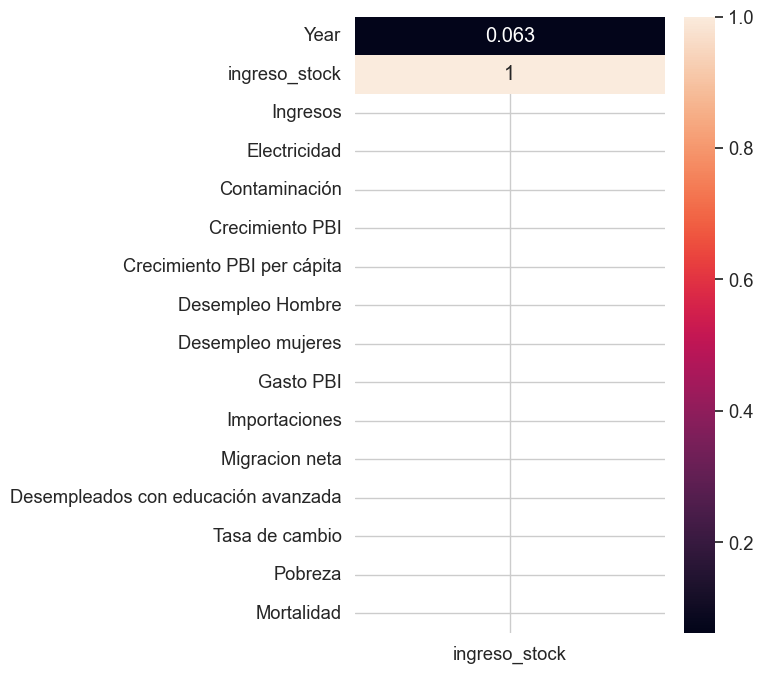

In [117]:
numeric_columns = Stock_migrantes_agrupado.select_dtypes(include=[np.number])
Stock_migrantes_agrupado_corr = numeric_columns.corr()
plt.figure(figsize=(5, 8))
sns.heatmap(Stock_migrantes_agrupado_corr[['ingreso_stock']], annot=True)
plt.show()

Histograma

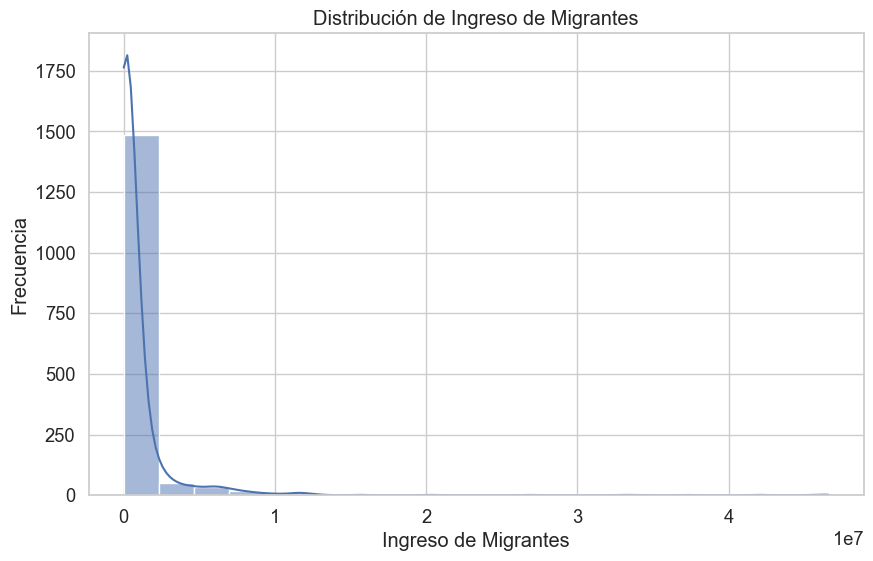

In [118]:
plt.figure(figsize=(10, 6))
sns.histplot(Stock_migrantes_agrupado['ingreso_stock'], bins=20, kde=True)
plt.title('Distribución de Ingreso de Migrantes')
plt.xlabel('Ingreso de Migrantes')
plt.ylabel('Frecuencia')
plt.show()


Comparación entre Grupos

In [119]:
top_regions = Stock_migrantes_agrupado['ISO3_dest'].value_counts().head(7).index

In [120]:
filtered_data = Stock_migrantes_agrupado[Stock_migrantes_agrupado['ISO3_dest'].isin(top_regions)]

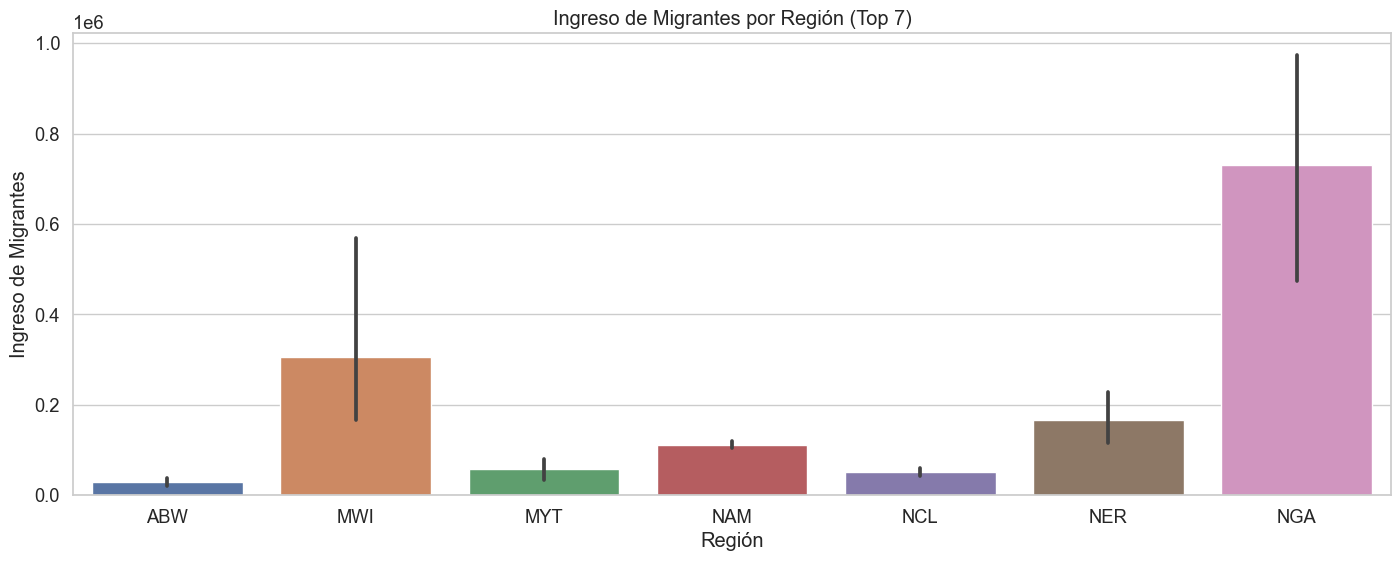

In [121]:
plt.figure(figsize=(17, 6))
sns.barplot(x='ISO3_dest', y='ingreso_stock', data=filtered_data)
plt.title('Ingreso de Migrantes por Región (Top 7)')
plt.xlabel('Región')
plt.ylabel('Ingreso de Migrantes')
plt.show()

Análisis temporal 

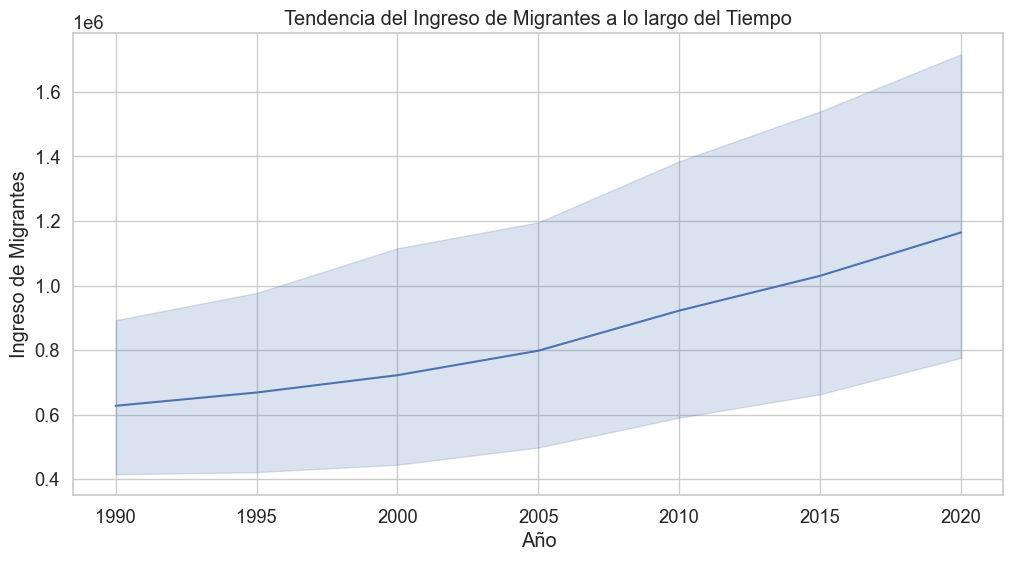

In [122]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='ingreso_stock', data=Stock_migrantes_agrupado)
plt.title('Tendencia del Ingreso de Migrantes a lo largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Ingreso de Migrantes')
plt.show()
